# Problem 1: Linear Regression


## You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

# Problem 2: Logistic Regression and LDA
## You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## Data Dictionary
- Carat: Carat weight of the cubic zirconia.
- Cut: Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
- Color: Colour of the cubic zirconia.With D being the best and J the worst.
- Clarity: Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
- Depth: The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
- Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
- Price: the Price of the cubic zirconia.
- X: Length of the cubic zirconia in mm.
- Y: Width of the cubic zirconia in mm.
- Z: Height of the cubic zirconia in mm.


In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [213]:
df = pd.read_csv('cubic_zirconia.csv')

### Checking the first 5 rows of the data (Sample of the data)

In [214]:
sample_data = df.head()
sample_data

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [215]:
dfi.export(sample_data, 'sample_data.png')

### Dropping the column 'Unnamed: 0'
-  the first column is an index column which contains only serial number and thus we are removing it

In [216]:
df = df.drop('Unnamed: 0', axis = 1)

In [217]:
sample_data_new = df.head()
sample_data_new

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [218]:
dfi.export(sample_data_new,'sample_data_new.png')

### Checking the shape of the data 

In [219]:
df.shape

(26967, 10)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


### Describing the data

In [221]:
df_desc = df.describe().T
df_desc

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [222]:
dfi.export(df_desc, 'df_desc.png')

### The minimum value of the column x, y and z is 0. Since x, y and z are length, width and height of the cubic zirconia respectively we can say that 0 is a faulty value and thus should be removed from the dataset.

In [223]:
df = df.drop(df[df['x'] == 0].index)

In [224]:
df = df.drop(df[df['y'] == 0].index)

In [225]:
df = df.drop(df[df['z'] == 0].index)

In [226]:
df.shape

(26958, 10)

### Checking for duplicate values

In [227]:
df.duplicated().sum()

33

### Dropping the duplicate records from the dataset

In [228]:
df.drop_duplicates(inplace = True)

In [229]:
df.duplicated().sum()

0

In [230]:
df.shape

(26925, 10)

### Univariate and Bivariate Analysis

In [231]:
plt.style.use('seaborn-whitegrid')

In [232]:
df['carat'].dtype

dtype('float64')

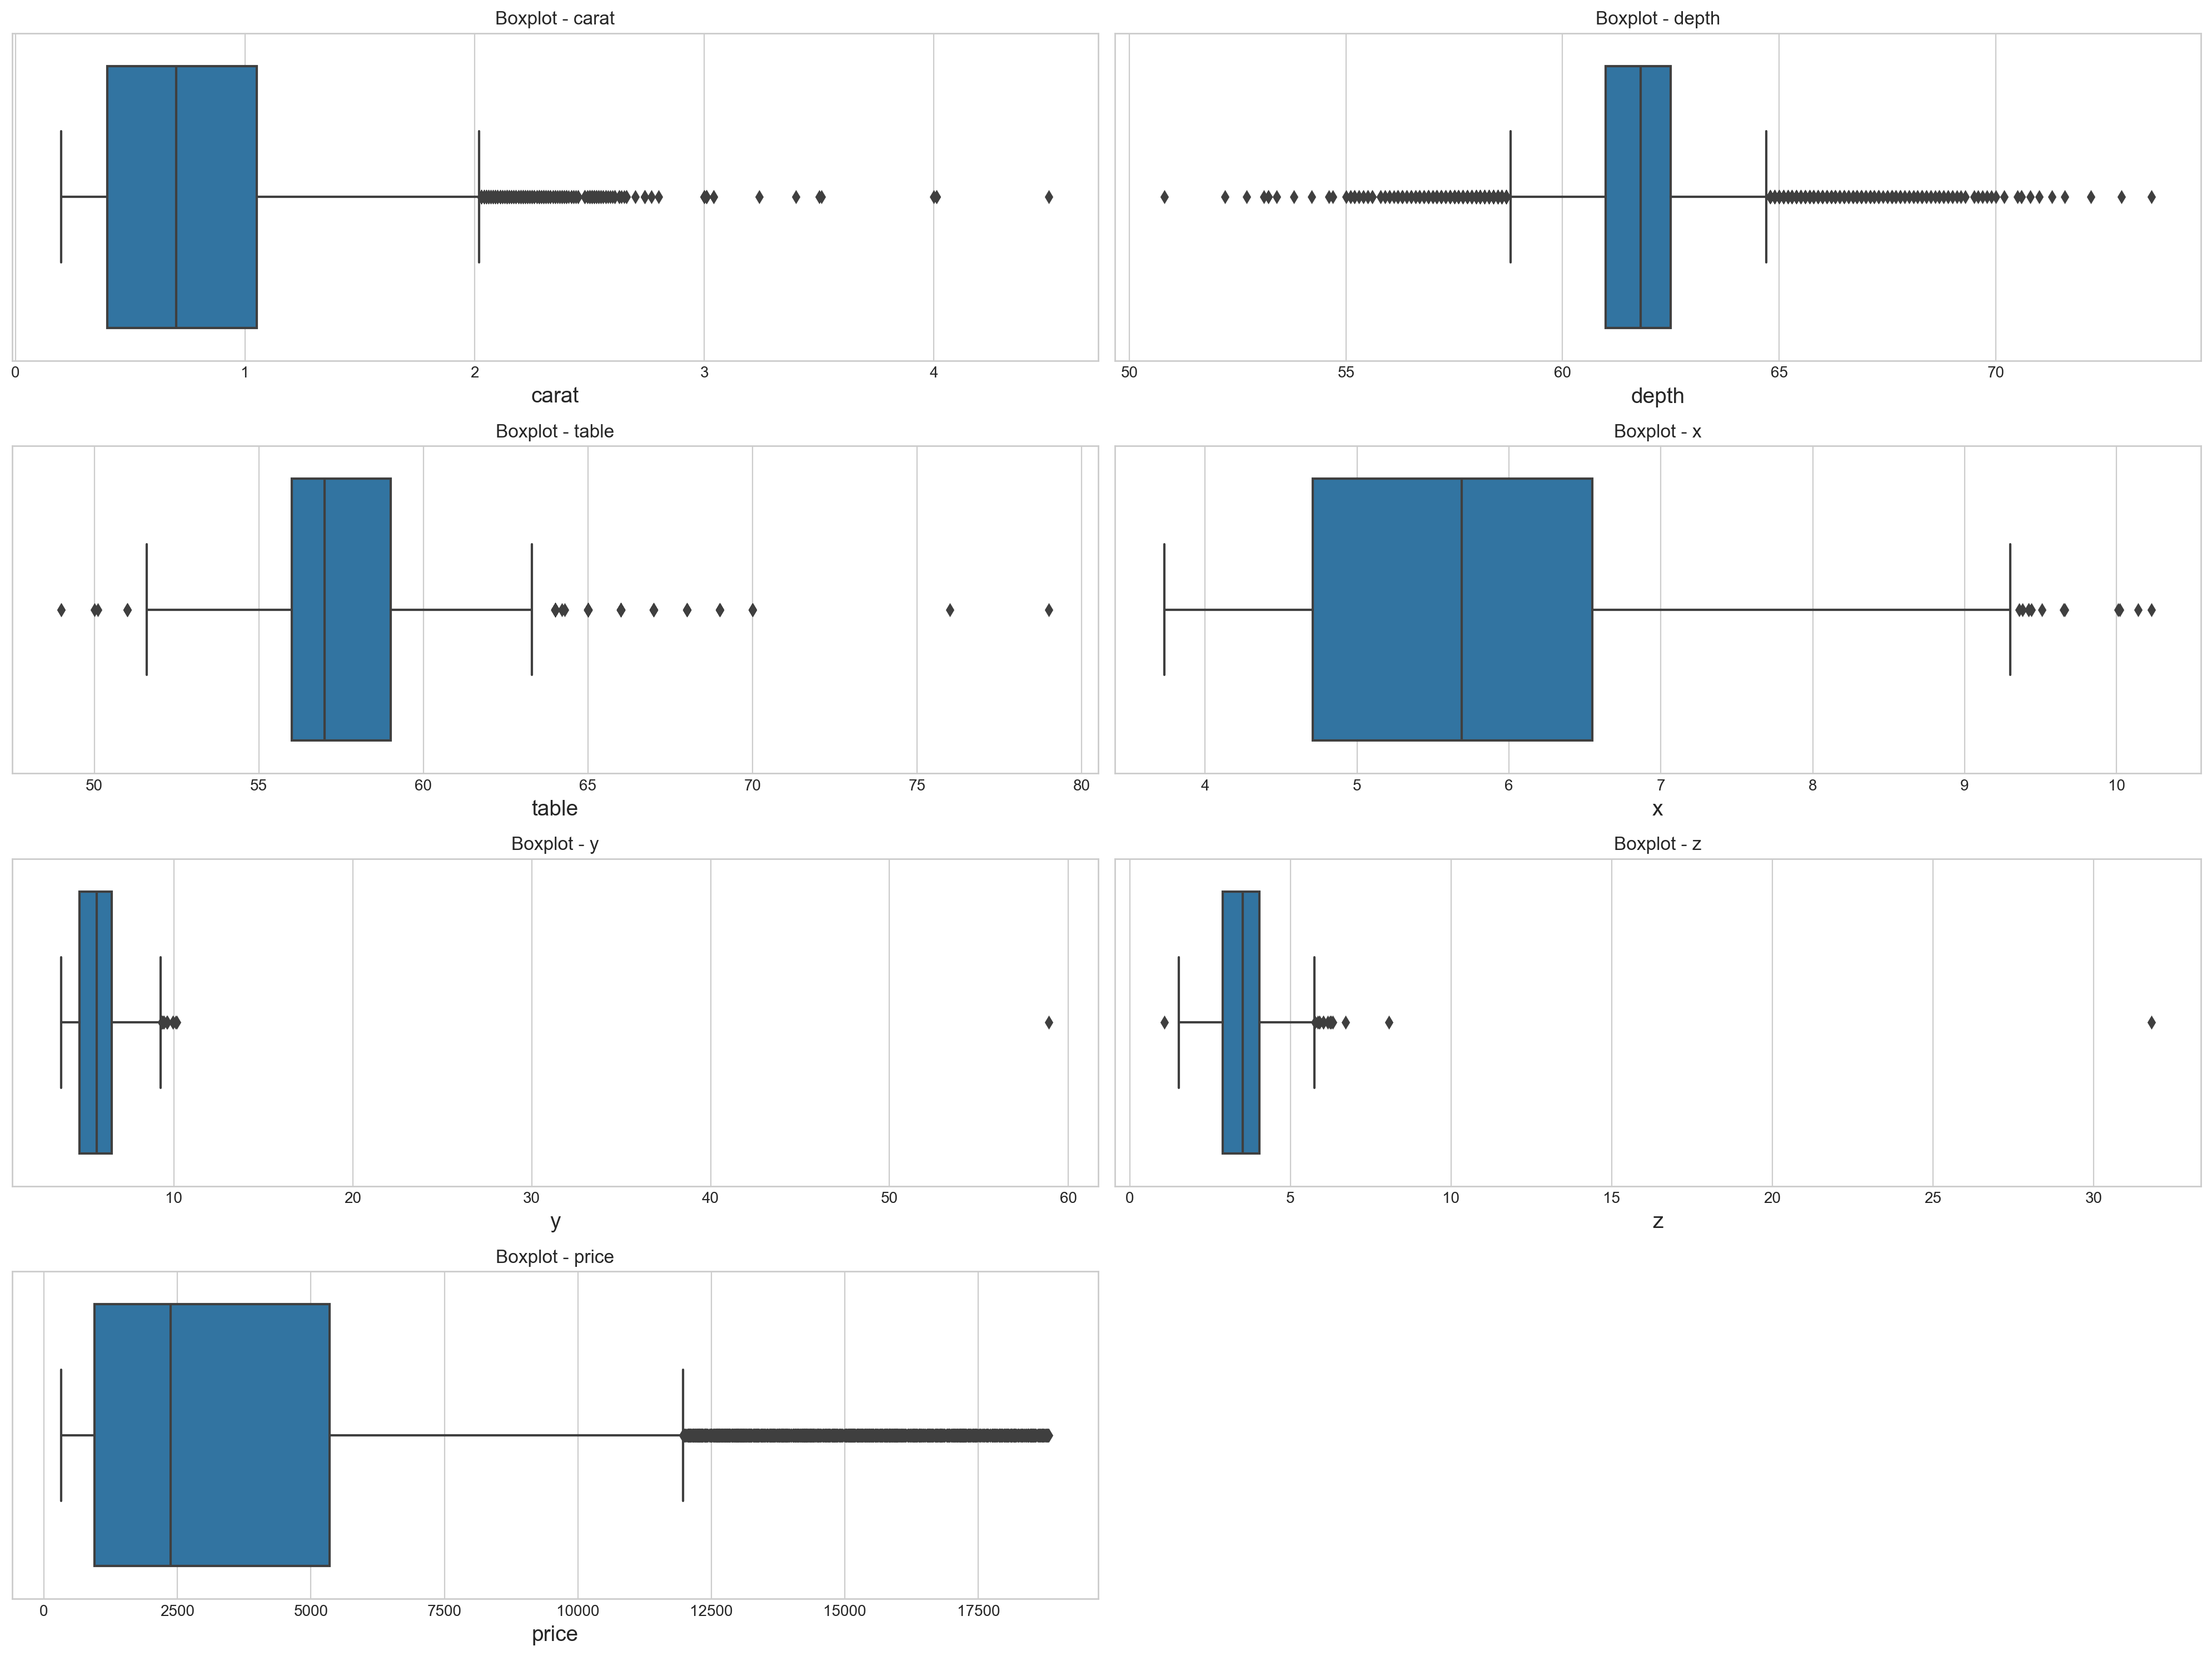

In [233]:
plt.figure(figsize = (20, 15), dpi = 200)
columns = ['carat','depth','table','x','y','z','price']
for i in range(len(columns)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data = df, x = df[columns[i]], orient= 'h')
    plt.title(f'Boxplot - {columns[i]}')
    plt.xlabel(columns[i],fontsize = 14)
    plt.tight_layout()
    plt.savefig('Uni_Boxplot.png', bbox_inches = 'tight')

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

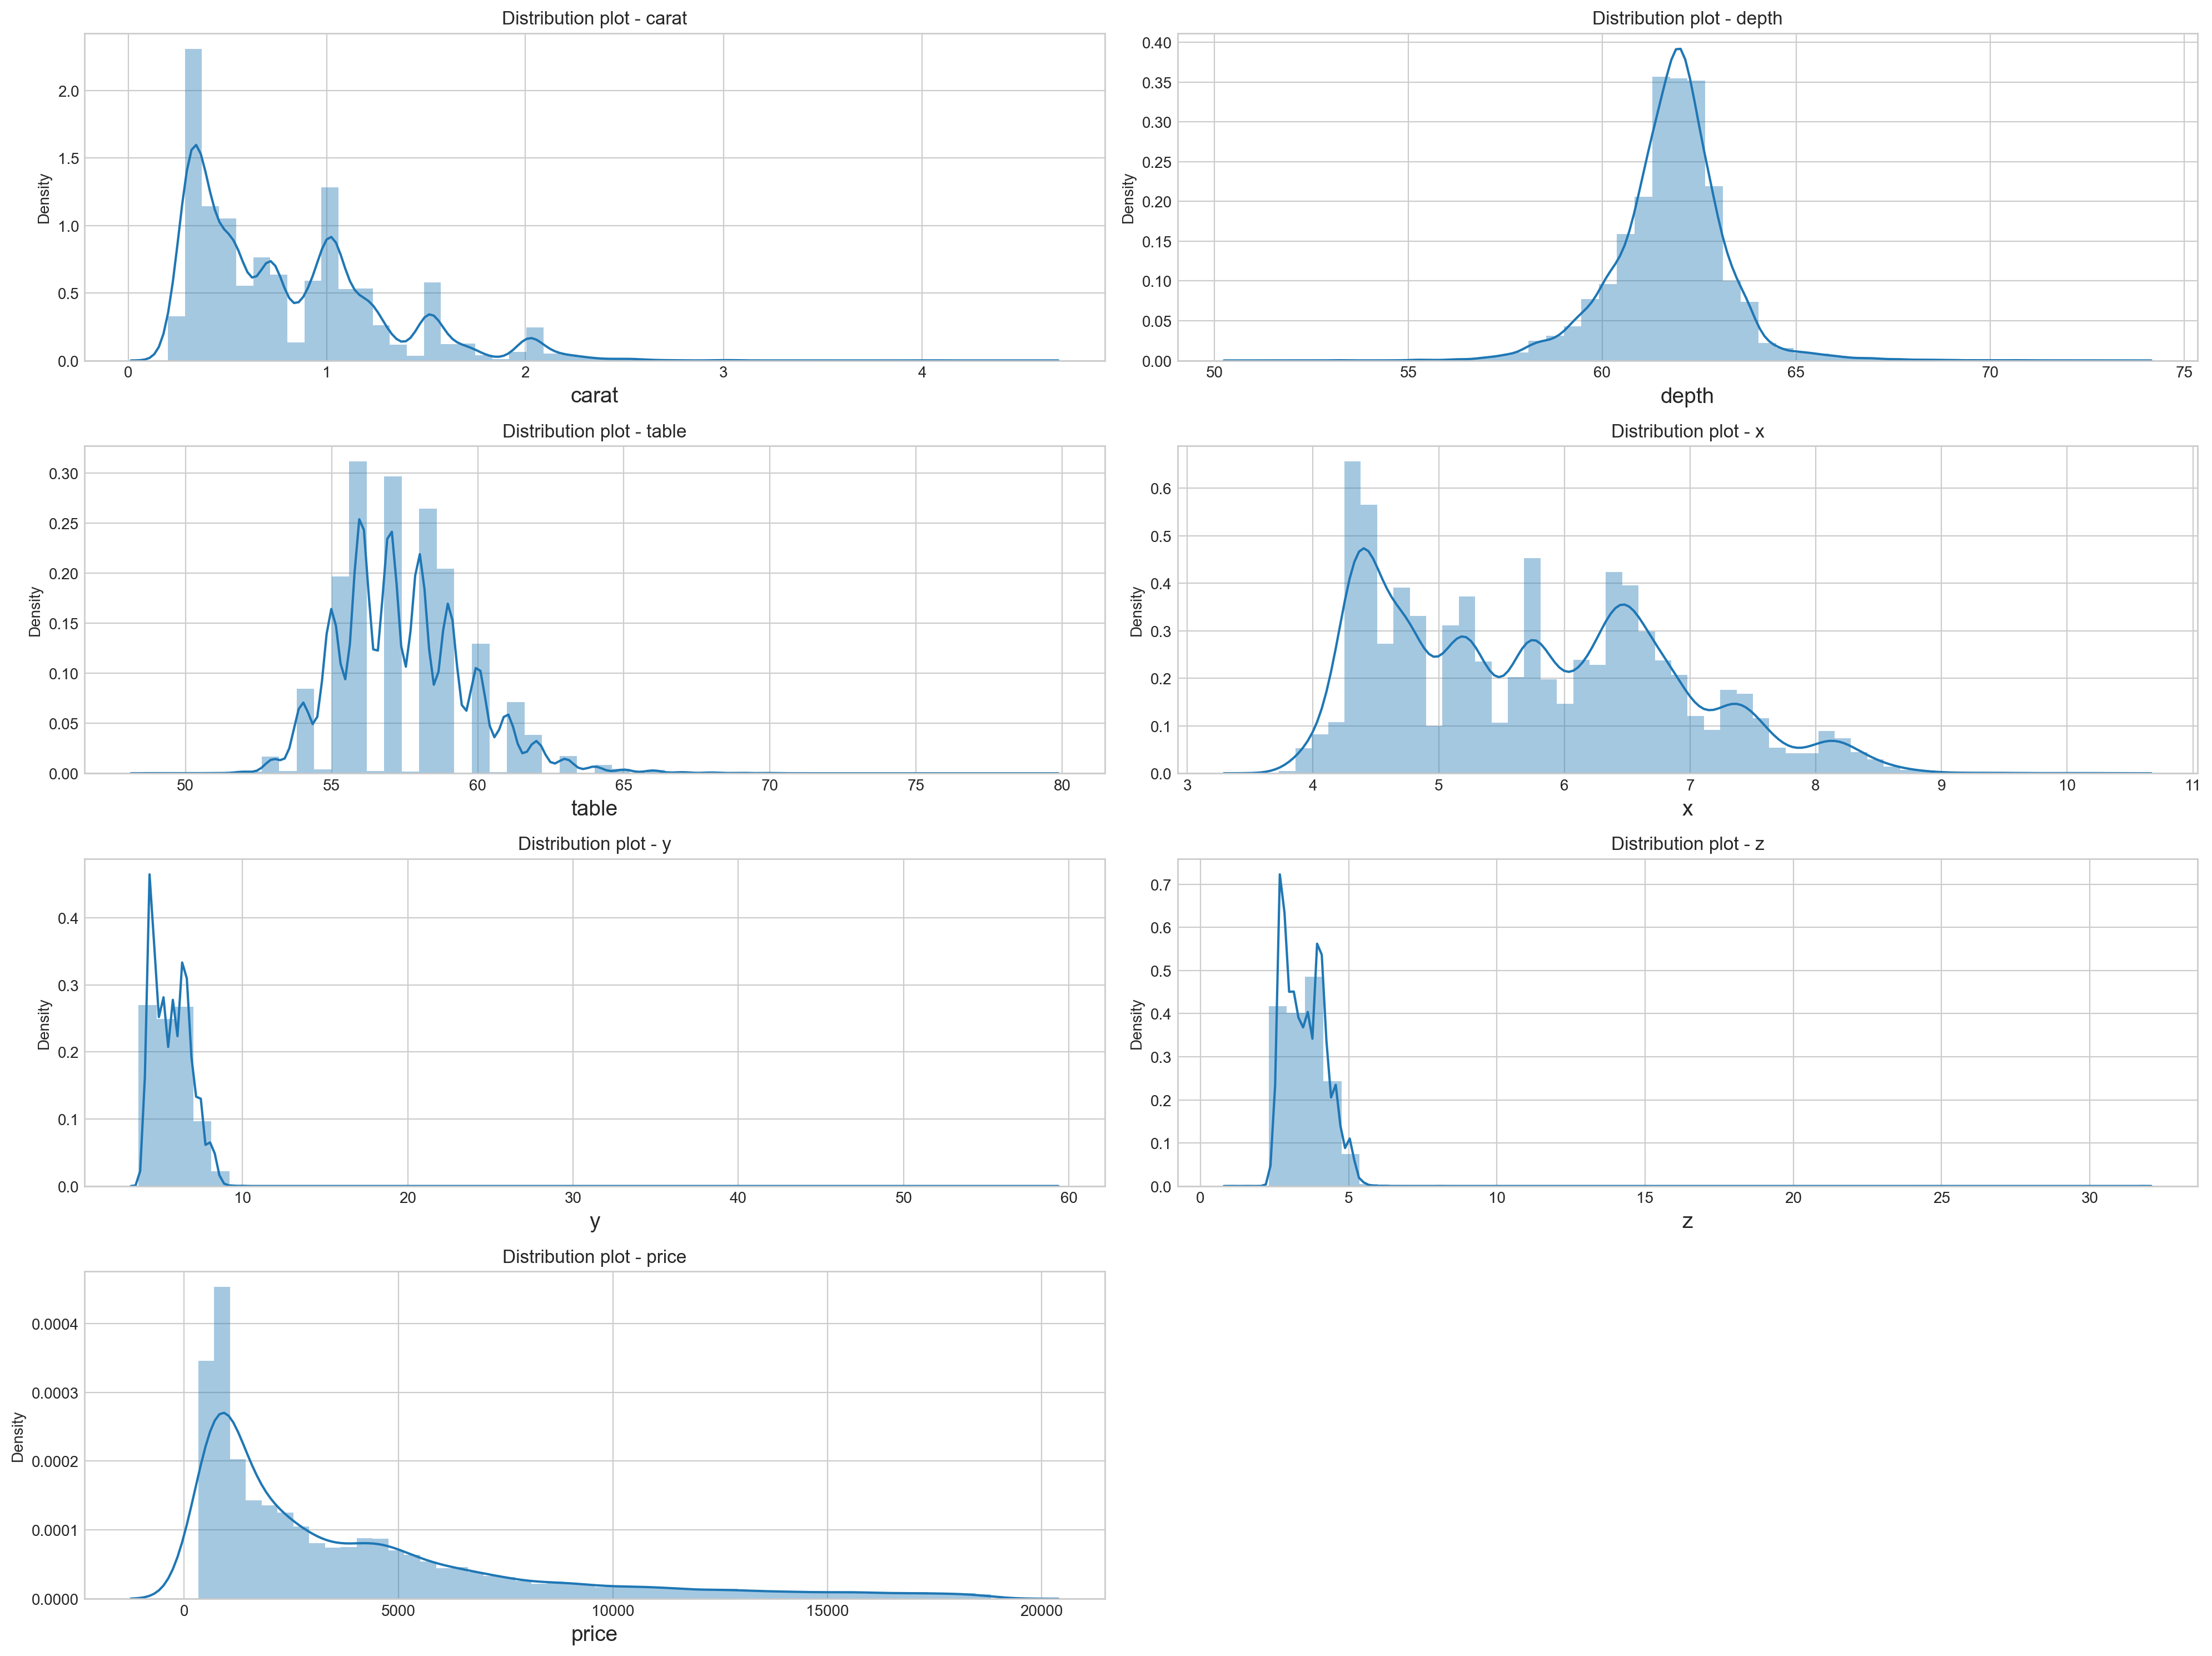

In [234]:
plt.figure(figsize = (20, 15), dpi = 200)
columns = ['carat','depth','table','x','y','z','price']
for i in range(len(columns)):
    plt.subplot(4, 2, i+1)
    sns.distplot(x = df[columns[i]])
    plt.title(f'Distribution plot - {columns[i]}')
    plt.xlabel(columns[i],fontsize = 14)
    plt.tight_layout()
    plt.savefig('Uni_dist.png', bbox_inches = 'tight')

<Figure size 2400x1600 with 0 Axes>

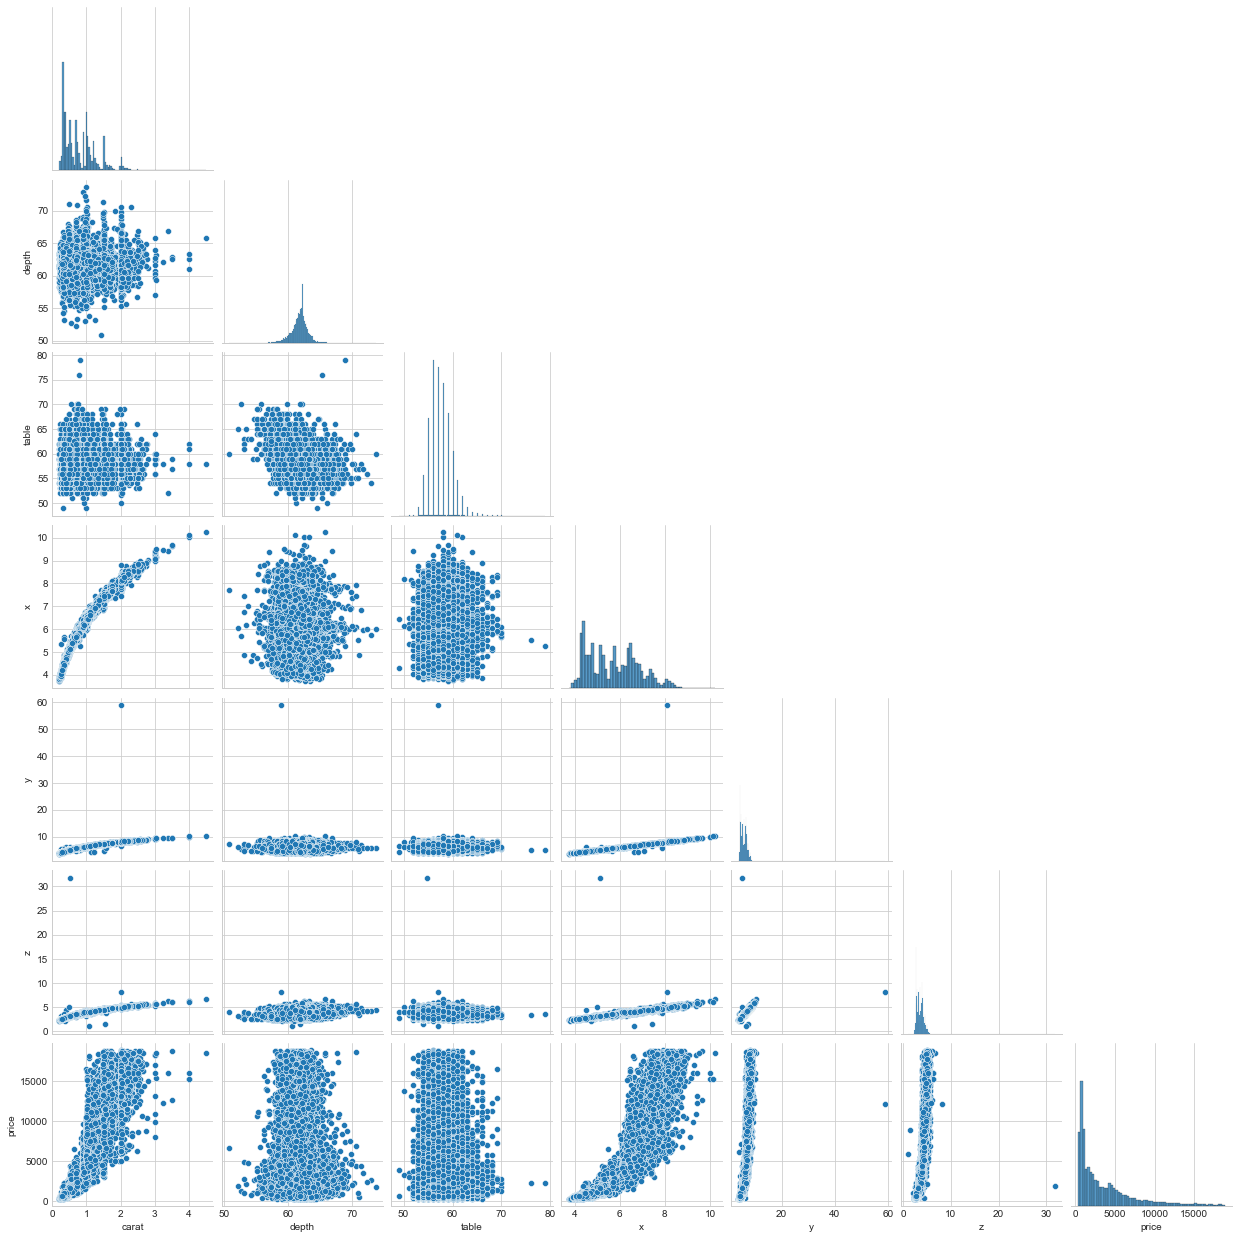

In [235]:
plt.figure(figsize=(12, 8), dpi = 200)
sns.pairplot(data = df, corner = True);
plt.savefig('Bi_Pair_plot.png')

In [236]:
corr = df.corr()
corr

,carat,depth,table,x,y,z,price
carat,1.000000,0.035575,0.181511,0.977908,0.942378,0.946774,0.922400
depth,0.035575,1.000000,-0.297411,-0.018465,-0.024532,0.101382,-0.002736
table,0.181511,-0.297411,1.000000,0.197517,0.183545,0.151034,0.126967
x,0.977908,-0.018465,0.197517,1.000000,0.962510,0.961010,0.887467
y,0.942378,-0.024532,0.183545,0.962510,1.000000,0.932974,0.857255
z,0.946774,0.101382,0.151034,0.961010,0.932974,1.000000,0.855775
price,0.922400,-0.002736,0.126967,0.887467,0.857255,0.855775,1.000000


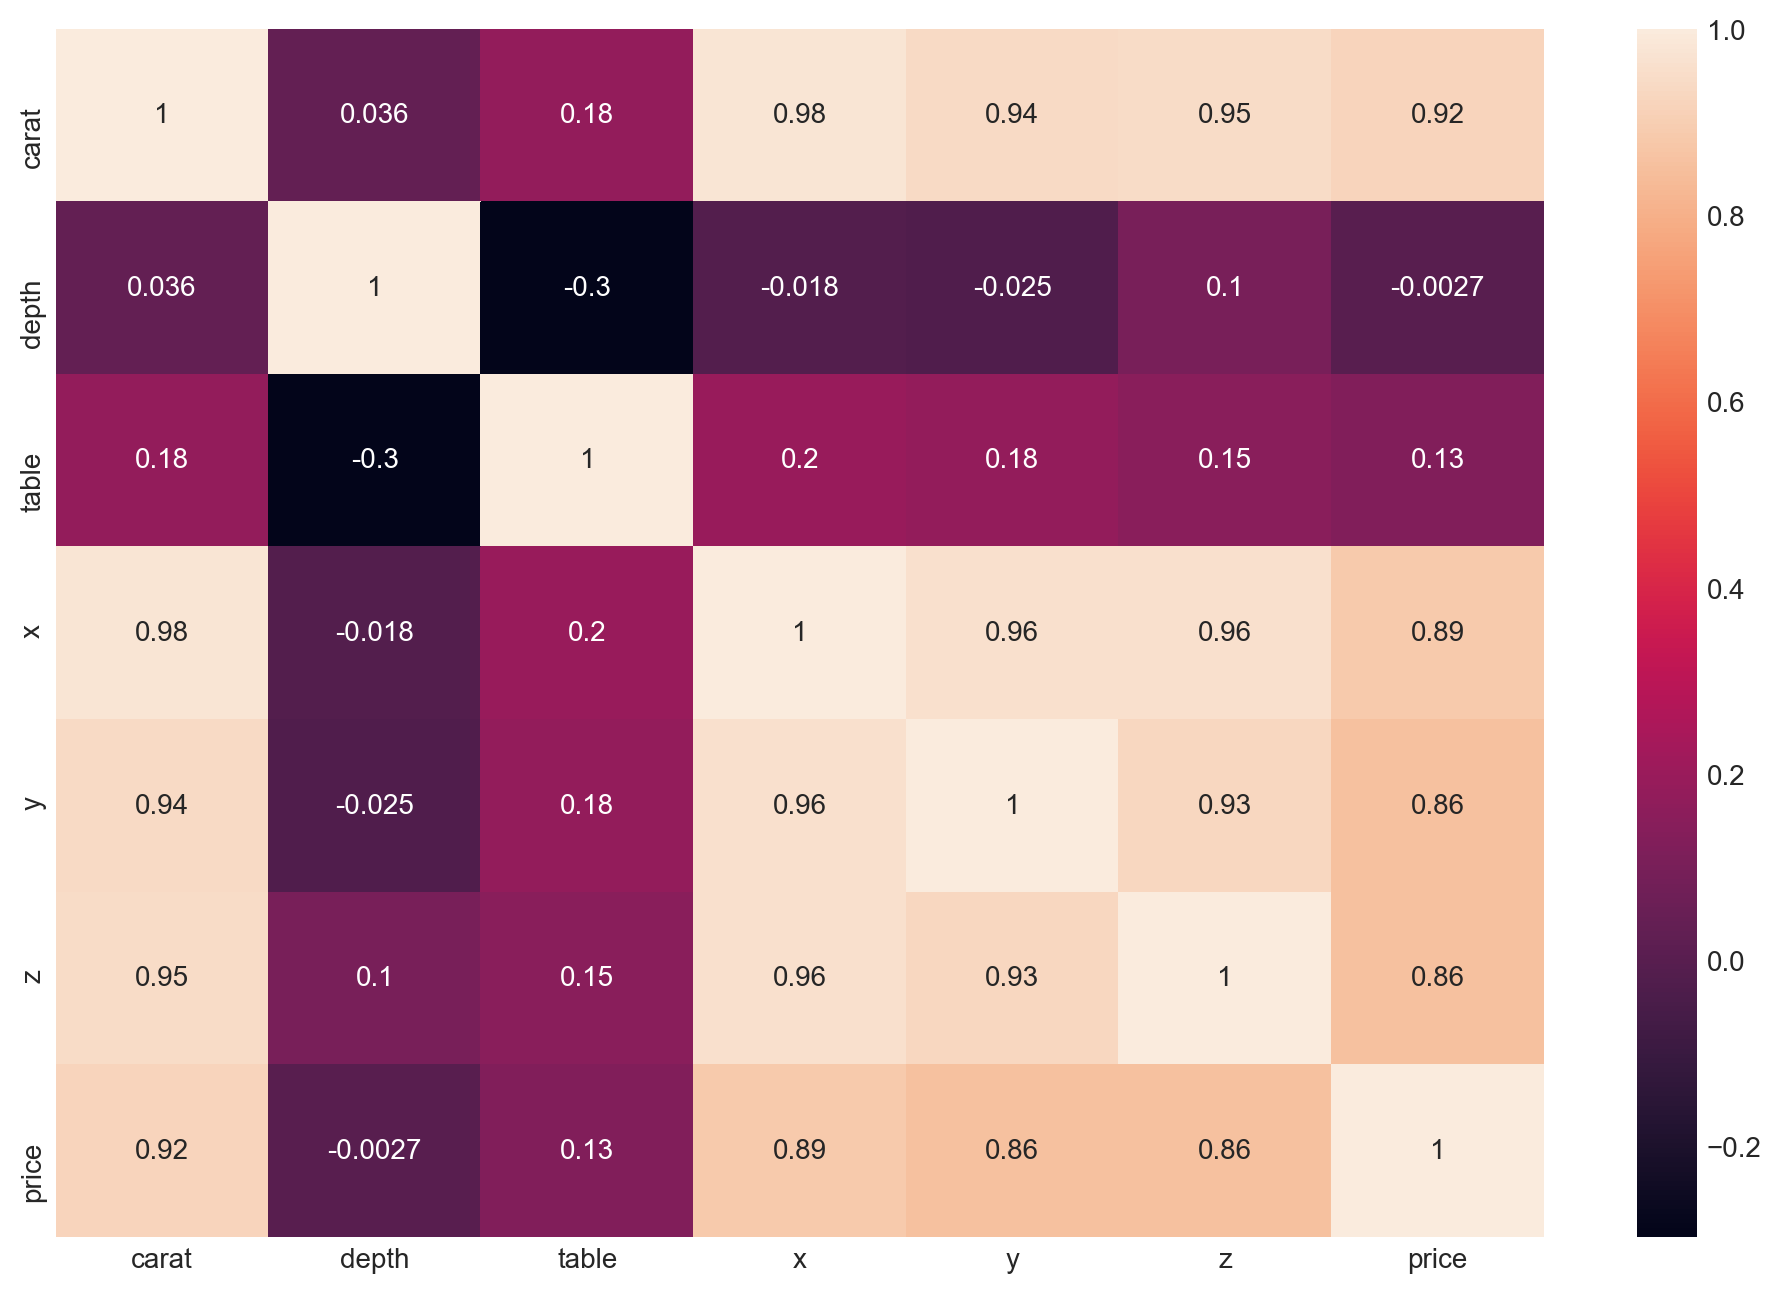

In [237]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.heatmap(corr, annot = True)
plt.savefig('Bi_Heat_map.png', bbox_inches = 'tight')

## Univariate and Bivariate Analysis for Categorical Variables

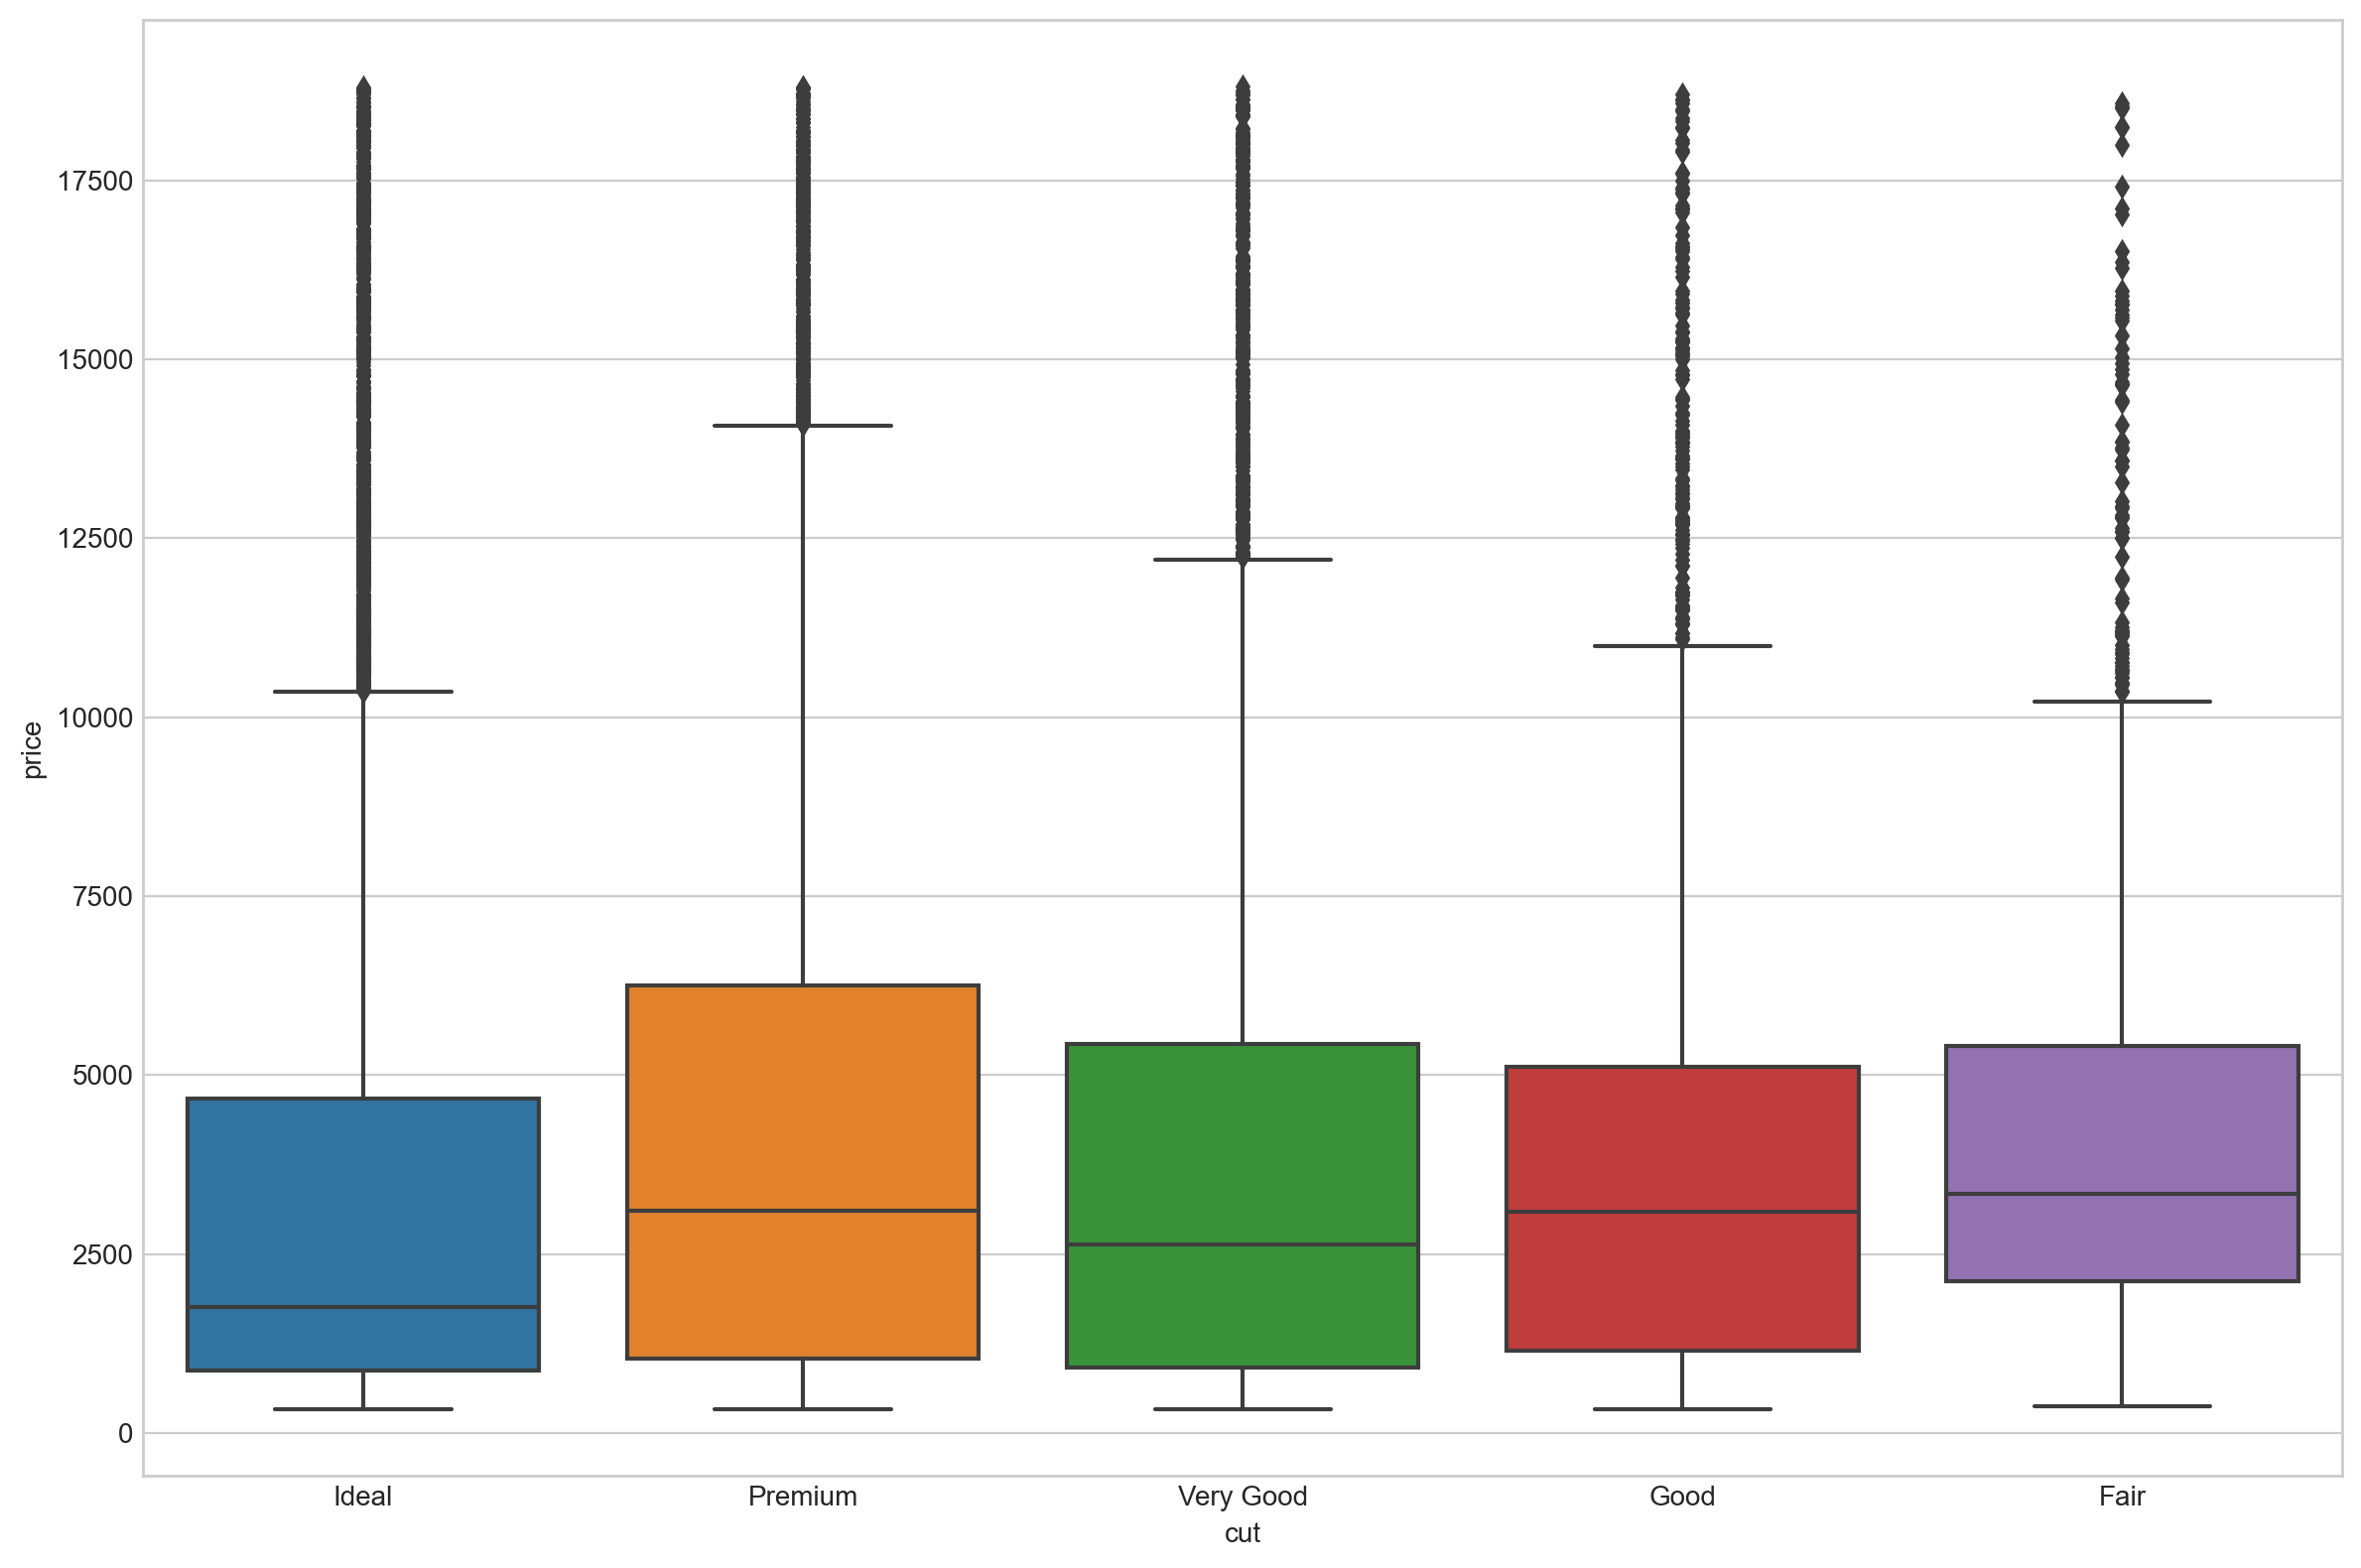

In [238]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.boxplot(data = df, x = 'cut', y = 'price')
plt.tight_layout()
plt.savefig('boxplot_cut_price.png')

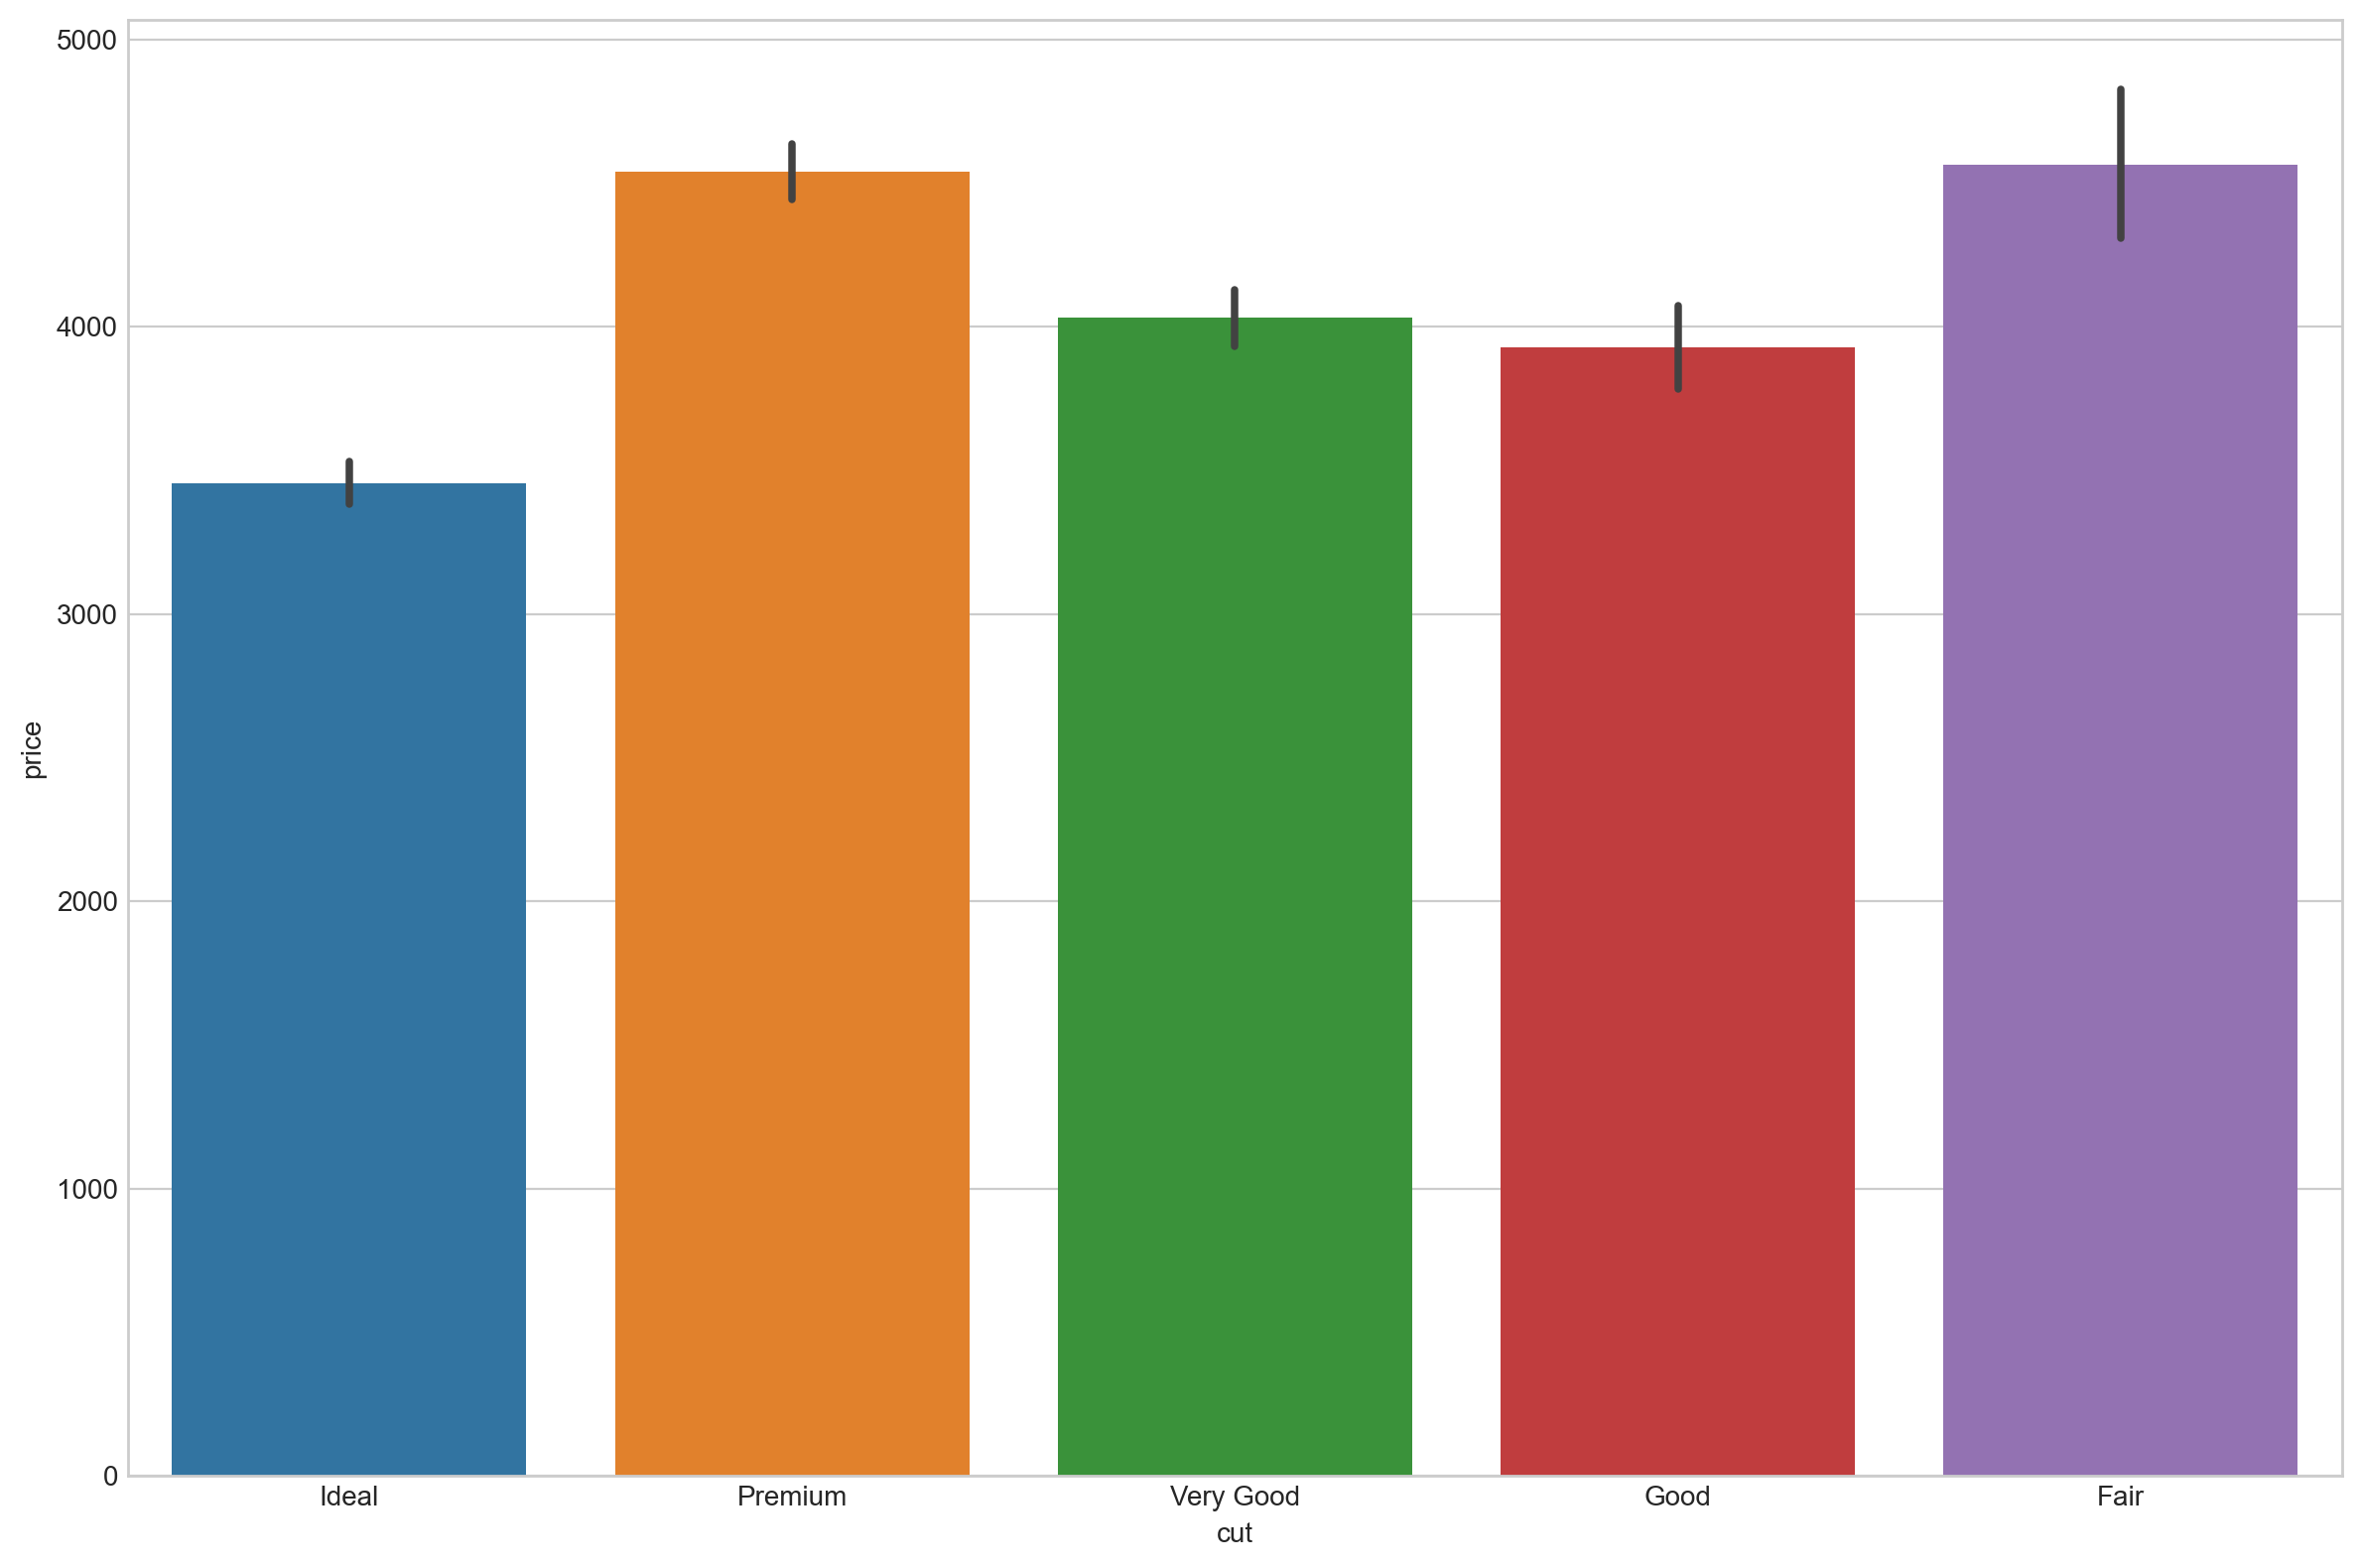

In [239]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.barplot(data = df, x = 'cut', y = 'price')
plt.tight_layout()
plt.savefig('barplot_cut_price.png')

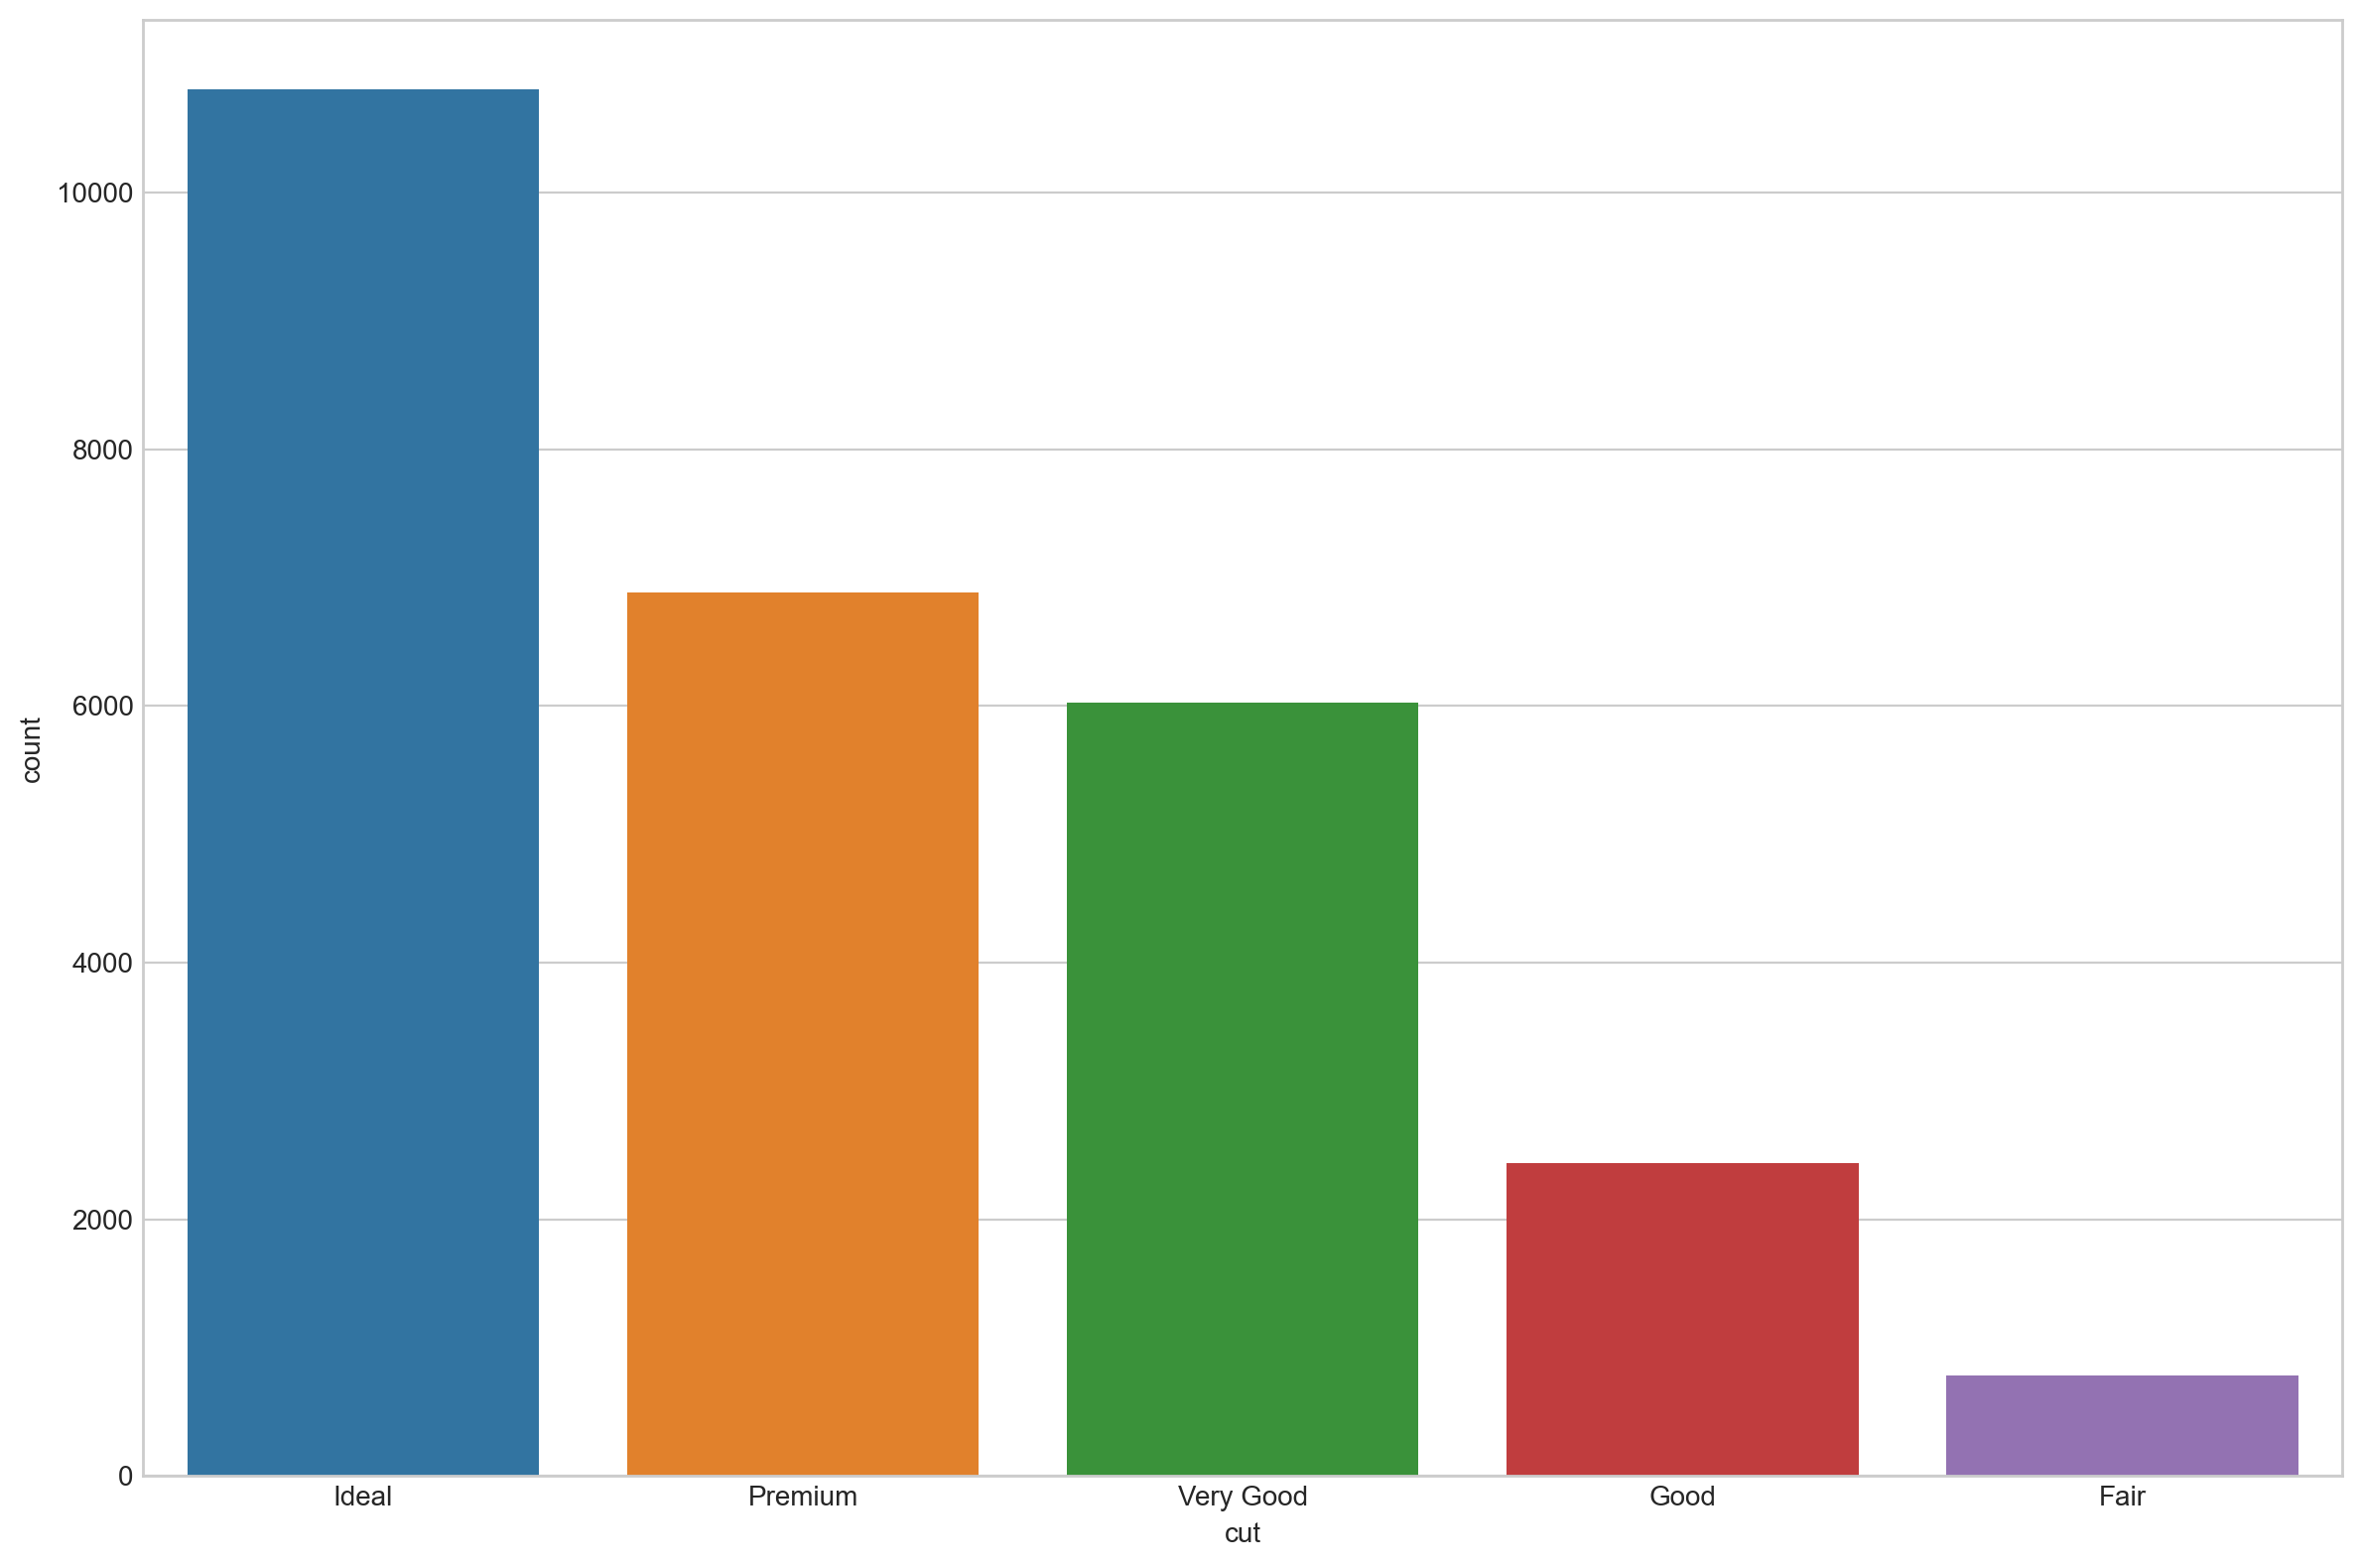

In [240]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.countplot(data = df, x = 'cut')
plt.tight_layout()
plt.savefig('countplot_cut_price.png')

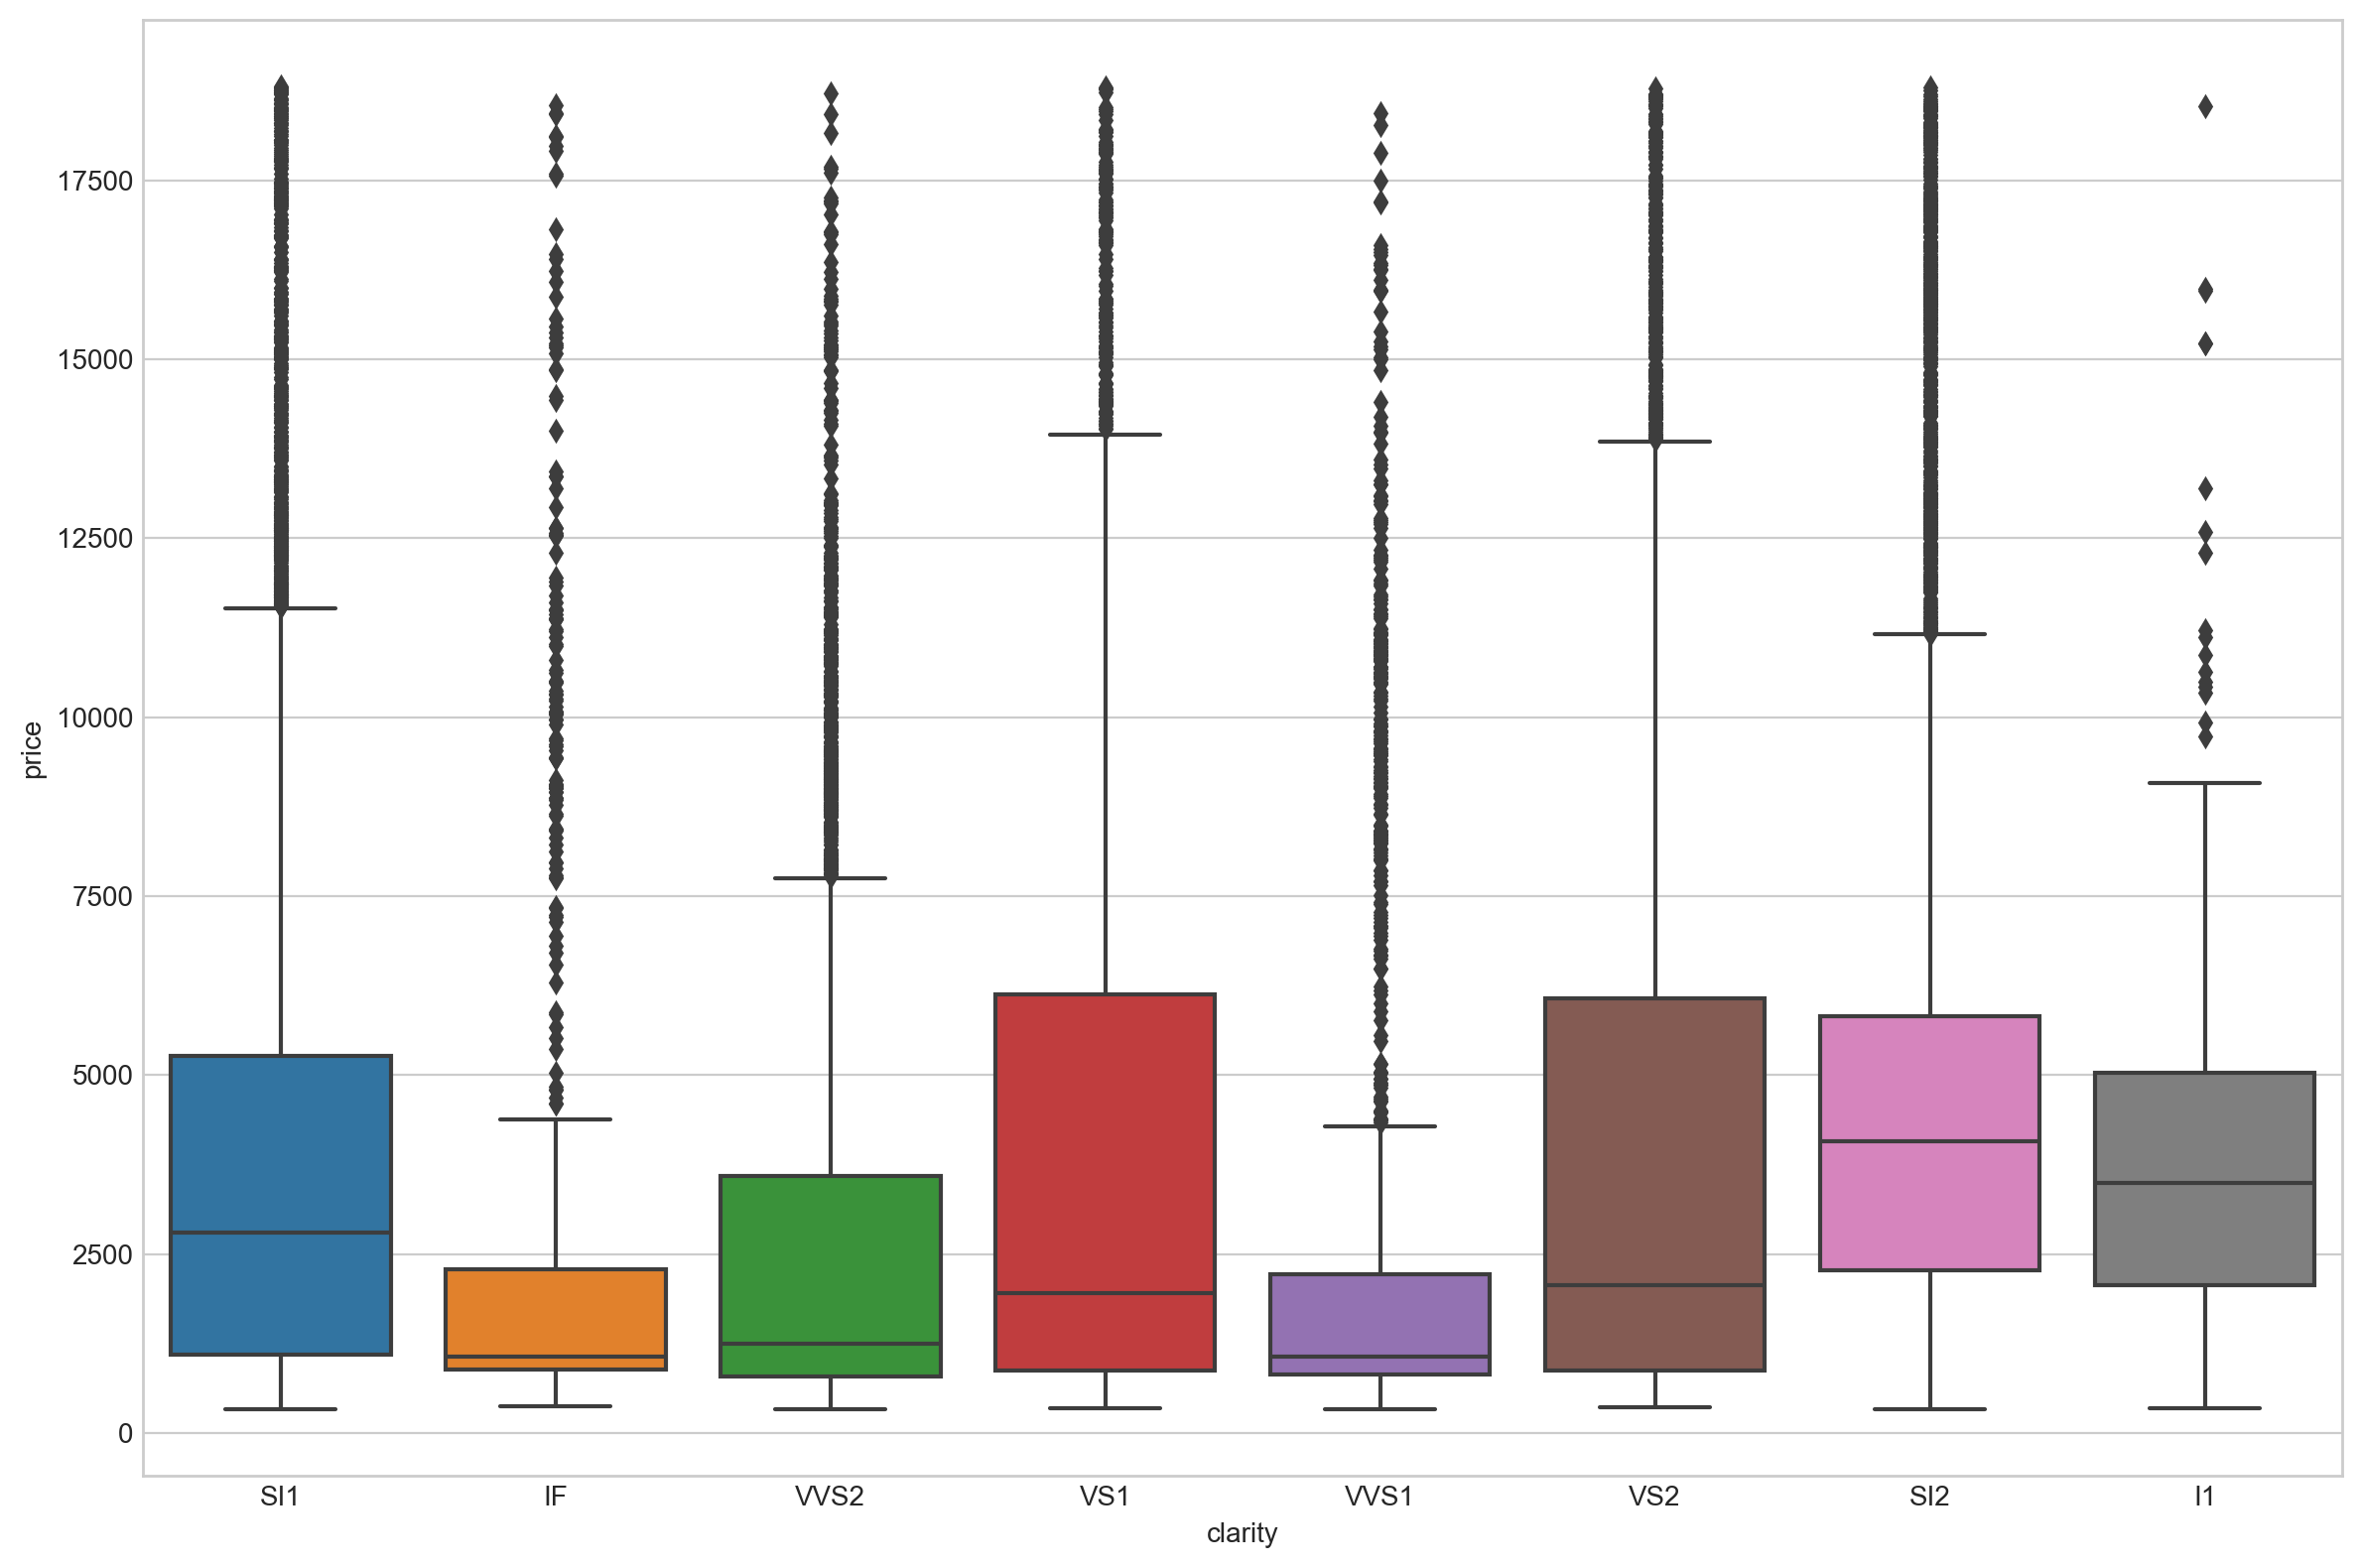

In [241]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.boxplot(data = df, x = 'clarity', y = 'price')
plt.tight_layout()
plt.savefig('boxplot_clarity_price.png')

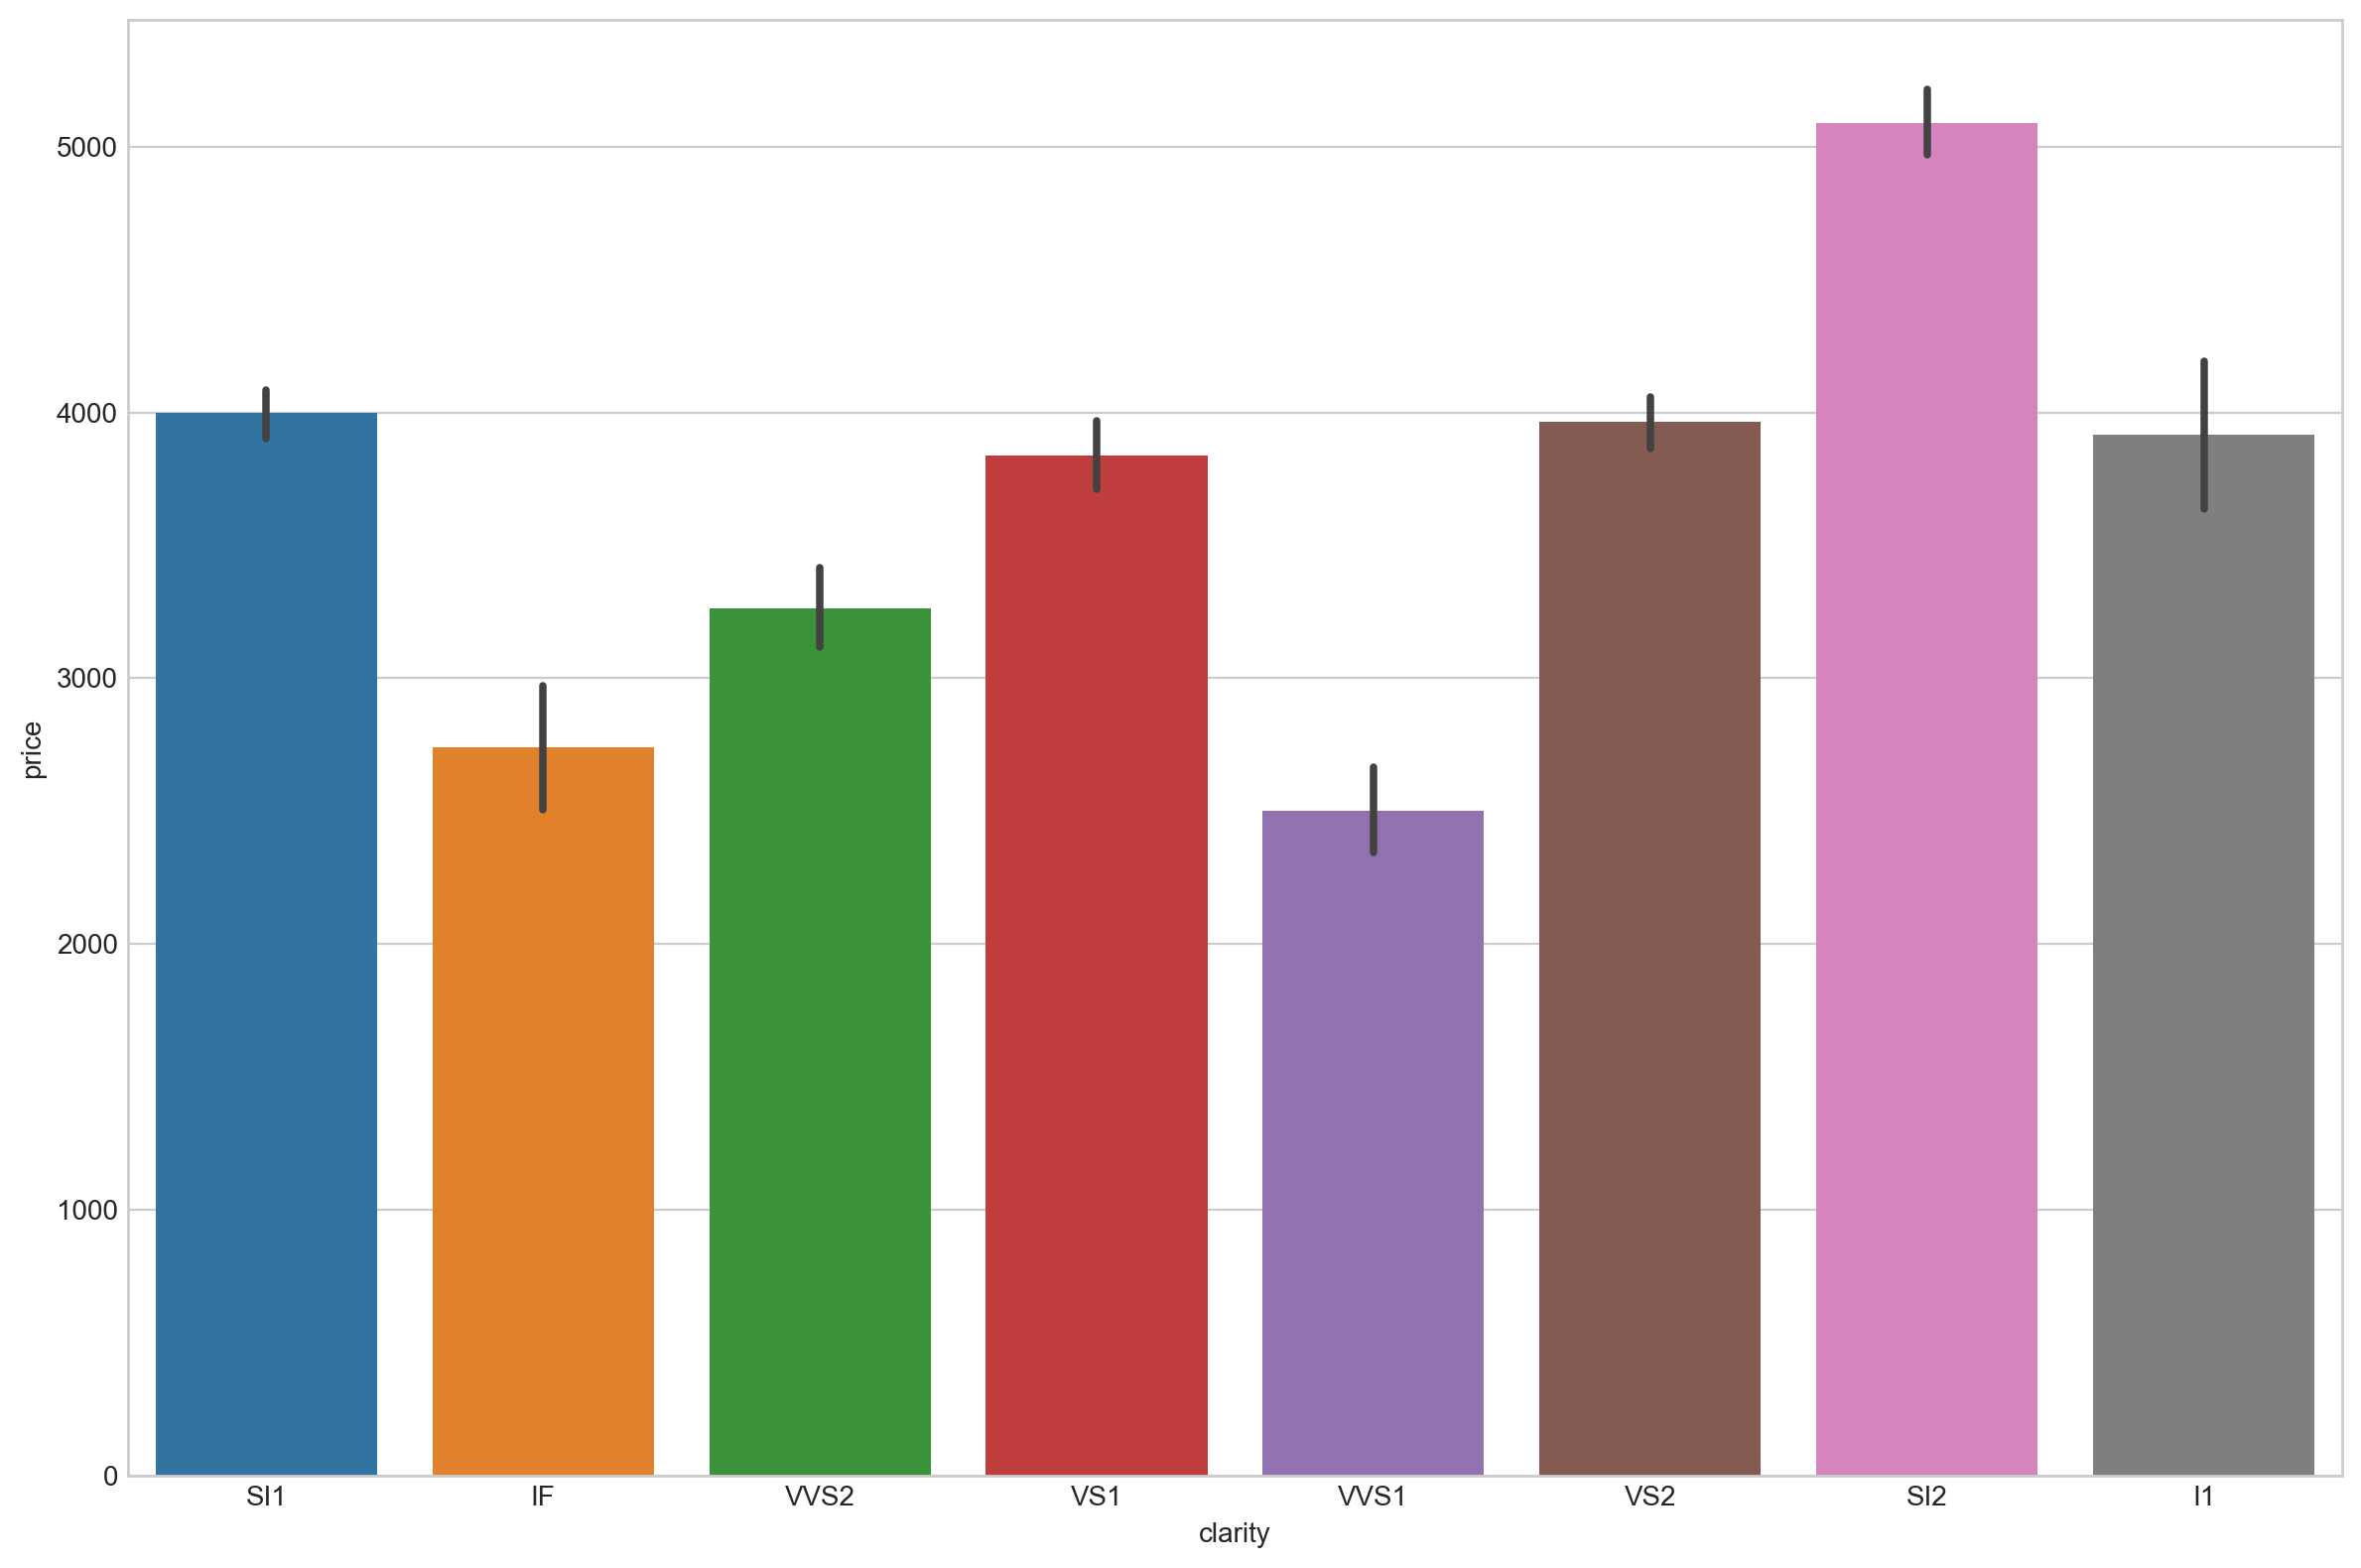

In [242]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.barplot(data = df, x = 'clarity', y = 'price')
plt.tight_layout()
plt.savefig('barplot_clarity_price.png')

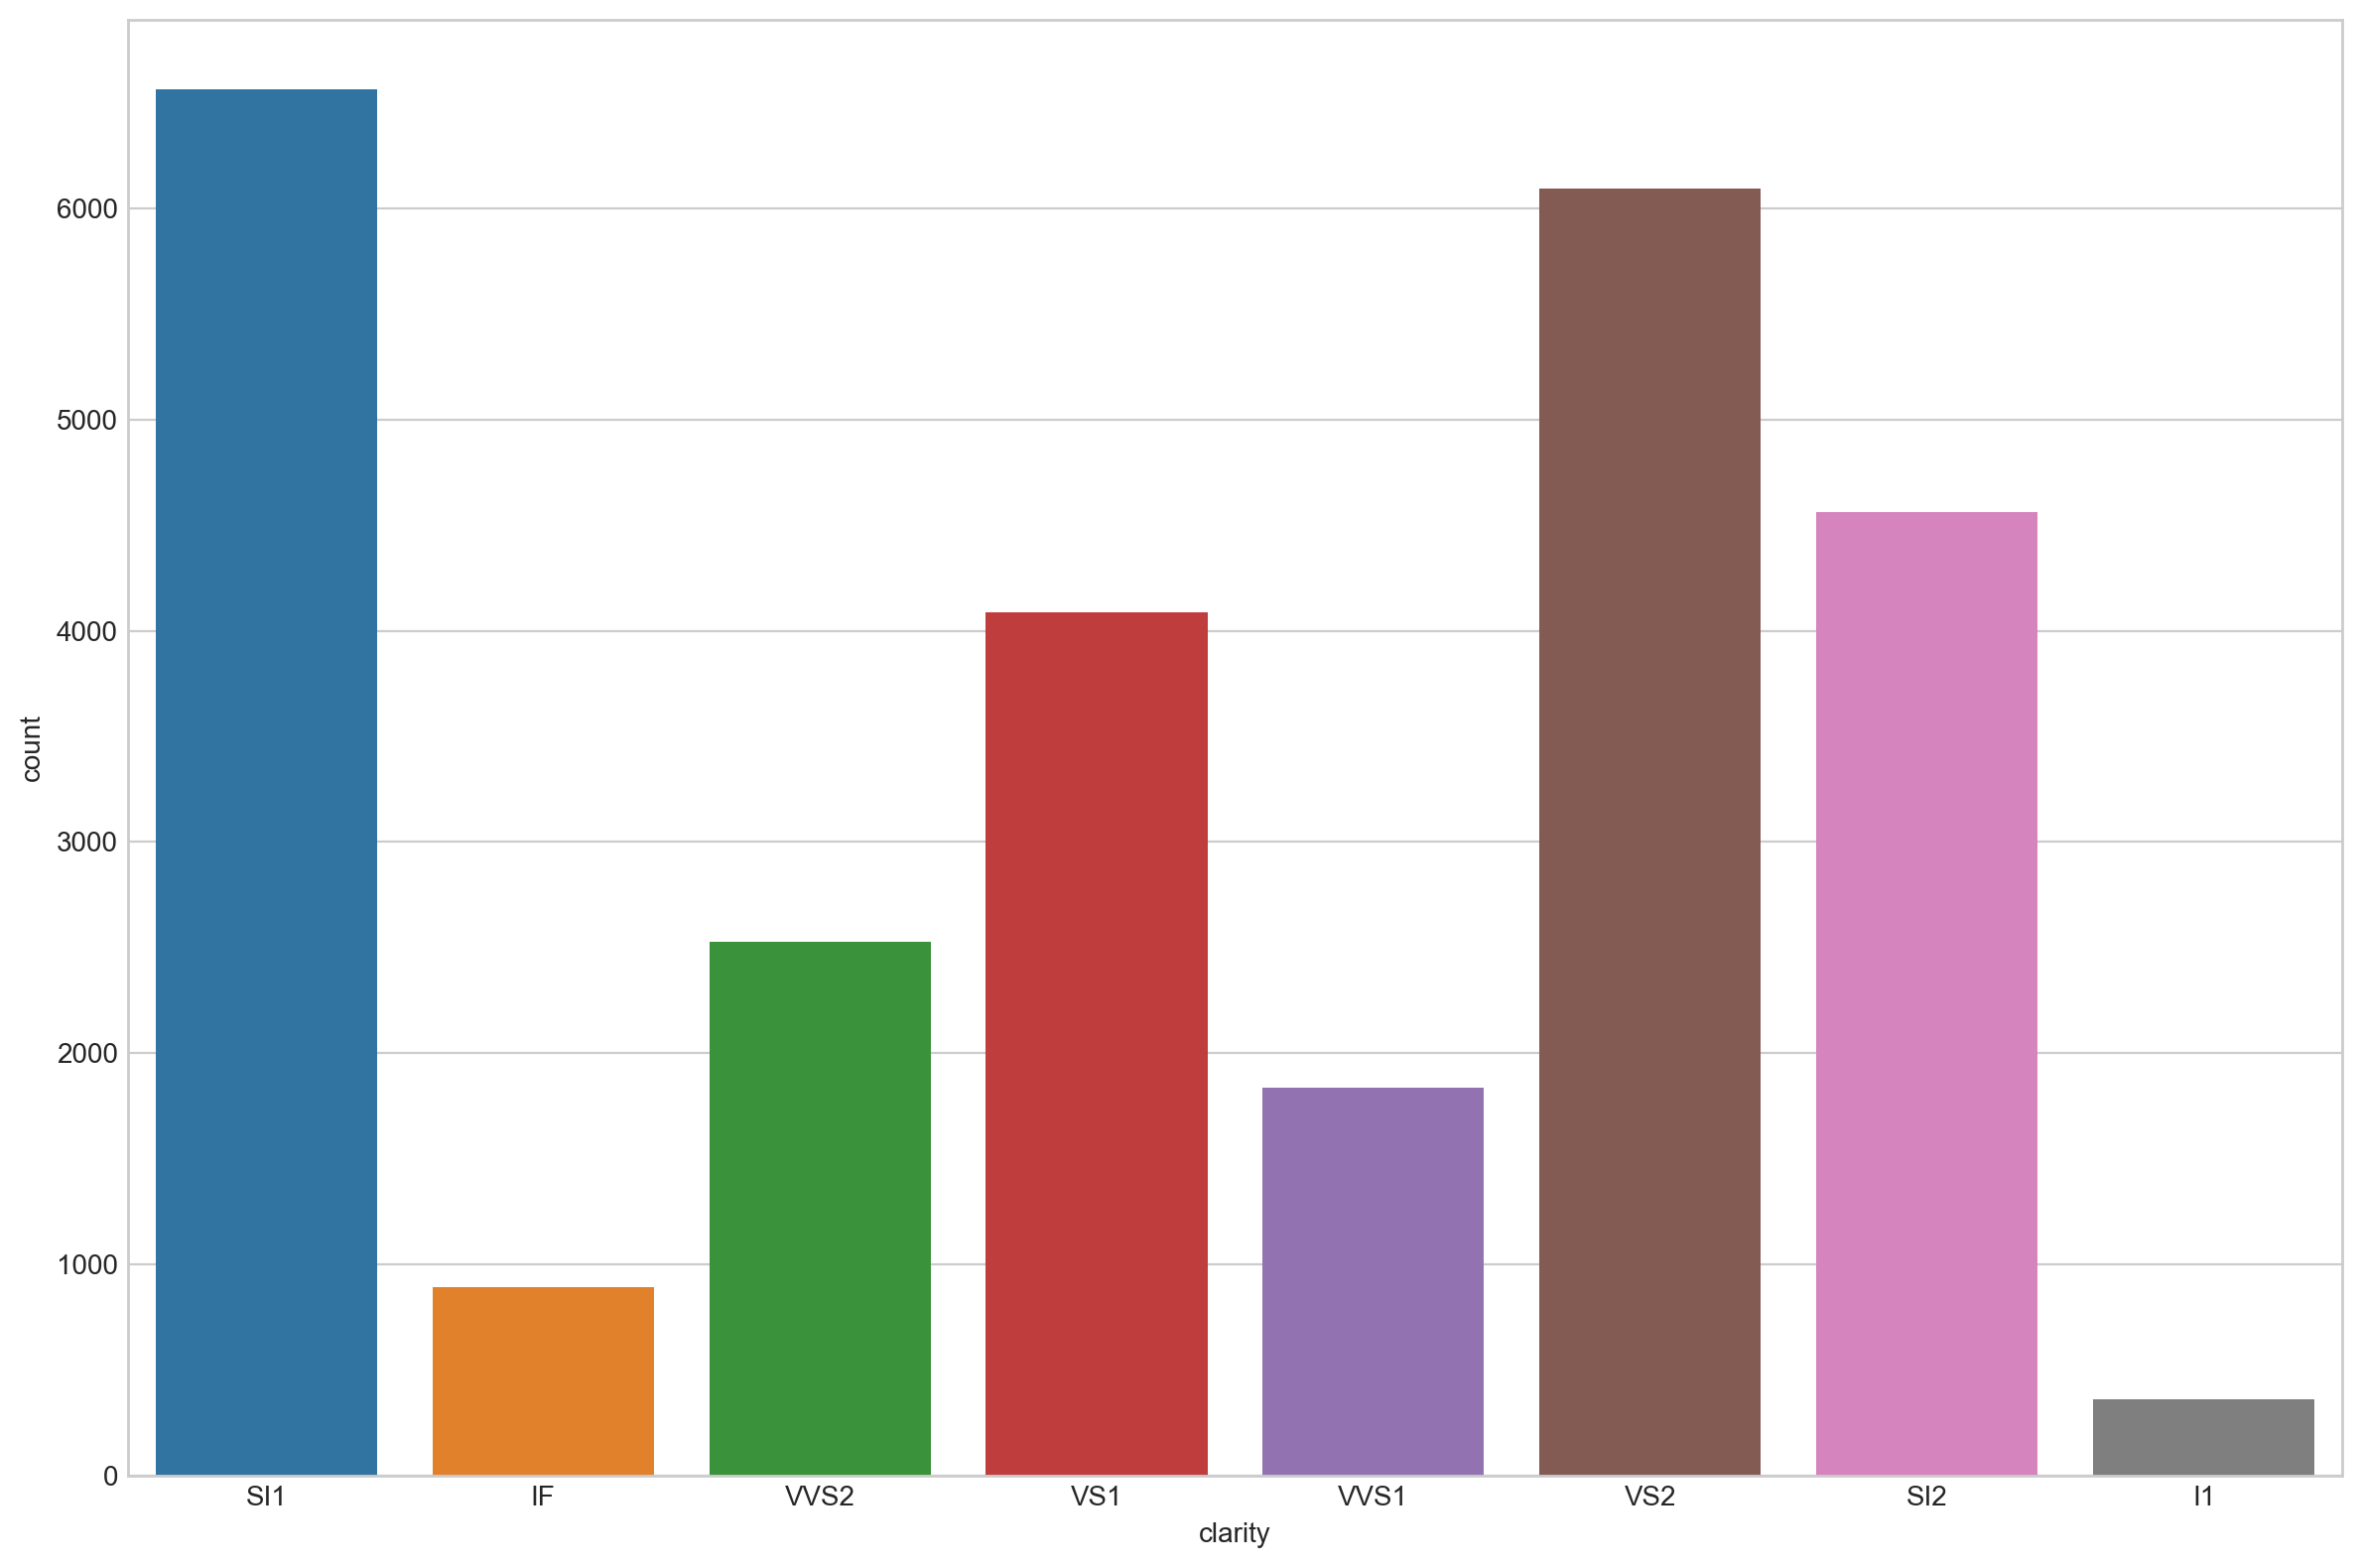

In [243]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.countplot(data = df, x = 'clarity')
plt.tight_layout()
plt.savefig('countplot_clarity_price.png')

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [244]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

- We have 697 null values for the column 'depth'. We will impute these null values with their median as there are outliers present in the dataset.

In [245]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Outlier Treatment

In [246]:
def remove_outlier(col):
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [247]:
for col in columns:
    lr, ur = remove_outlier(df[col])
    df[col] = np.where(df[col] > ur, ur, df[col])
    df[col] = np.where(df[col] < lr, lr, df[col])

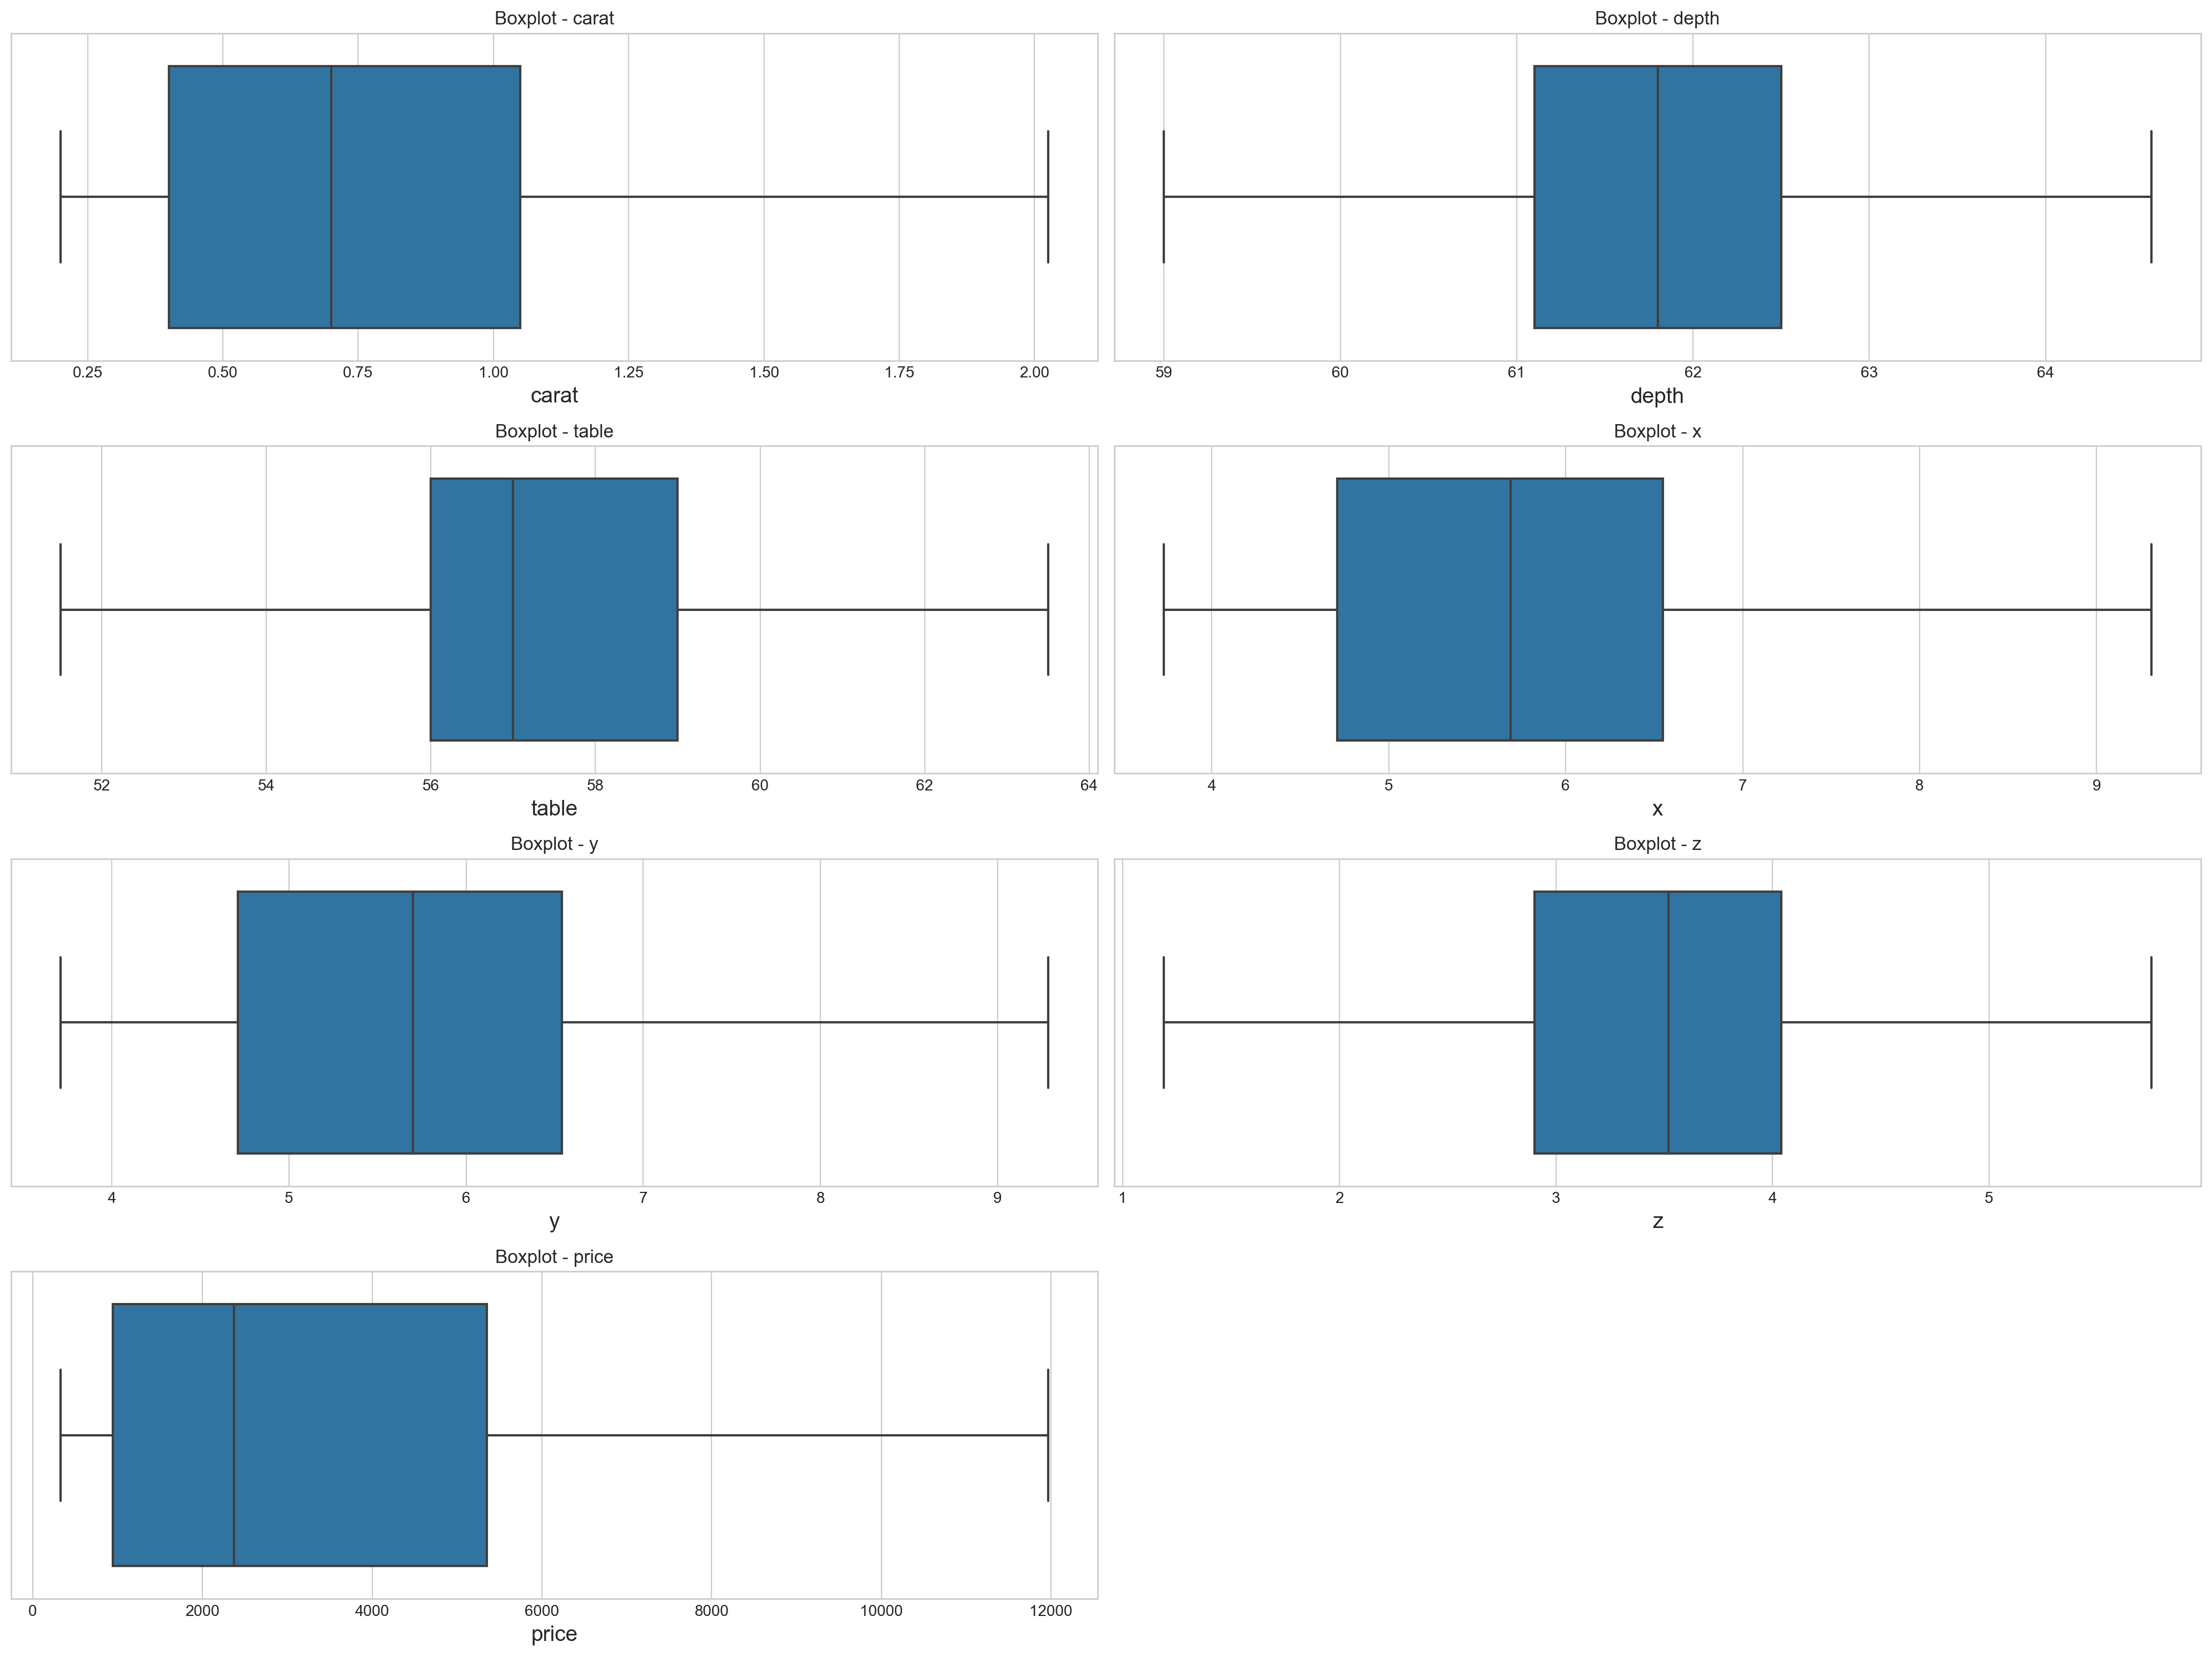

In [248]:
plt.figure(figsize = (20, 15), dpi = 200)
for i in range(len(columns)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data = df, x = df[columns[i]], orient= 'h')
    plt.title(f'Boxplot - {columns[i]}')
    plt.xlabel(columns[i],fontsize = 14)
    plt.tight_layout()
    plt.savefig('Uni_Boxplot_outlier_Treatment.png', bbox_inches = 'tight')

### Checking for values which are equal to zero
- We have already checked for the values which are equal to zero while performing initial diagnosis on the dataset.They have no meaning and we had to change them or drop them.
- The minimum value of the column x, y and z was 0. Since x, y and z are length, width and height of the cubic zirconia respectively we can say that 0 was a faulty value and thus we have removed them from the dataset.

### Combining the sub-levels of ordinal variables
- For the column 'clarity' we will be combining few grades. 
- 'clarity' of type 'SI1' and 'SI2' belong to the same grade without having much difference between them i.e. they belong to the grade 'Slightly Included'. So we will combine the sub-levels of ordinal variable 'SI1' and 'SI2' into one single grade 'Bad'
- 'clarity' of type 'VS1' and 'VS2' belong to the same grade without having much difference between them i.e. they belong to the grade 'Very Slightly Included'. So we will combine the sub-levels of ordinal variable 'VS1' and 'VS2' into one single grade 'Good'.
- 'clarity' of type 'VVS1' and 'VVS2' belong to the same grade without having much difference between them i.e. they belong to the grade 'Very Very Slightly Included'. So we will combine the sub-levels of ordinal variable 'VVS1' and 'VVS2' into one single grade 'VGood'.

In [249]:
df['clarity']=np.where(df['clarity']=='I1','Worst',df['clarity'])

df['clarity']=np.where(df['clarity']=='SI1','Bad',df['clarity'])
df['clarity']=np.where(df['clarity']=='SI2','Bad',df['clarity'])

df['clarity']=np.where(df['clarity']=='VS1','Good',df['clarity'])
df['clarity']=np.where(df['clarity']=='VS2','Good',df['clarity'])


df['clarity']=np.where(df['clarity']=='VVS1','VGood',df['clarity'])
df['clarity']=np.where(df['clarity']=='VVS2','VGood',df['clarity'])

df['clarity']=np.where(df['clarity']=='IF','Best',df['clarity'])

In [250]:
df_clarity_updated = df[['clarity']].head(10)
dfi.export(df_clarity_updated, 'df_clarity_updated.png')

## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

### Converting all objects to categorical codes

In [251]:
from sklearn.preprocessing import OrdinalEncoder

In [252]:
ordinal_encoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                              ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                              ['Worst', 'Bad', 'Good', 'VGood', 'Best']])

In [253]:
df.dtypes[df.dtypes == 'object'].index

Index(['cut', 'color', 'clarity'], dtype='object')

In [254]:
diamond_cat= df.dtypes[df.dtypes == 'object'].index
df[diamond_cat] = ordinal_encoder.fit_transform(df[diamond_cat])
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,1.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,4.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,5.0,3.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,2.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,3.0,60.4,59.0,4.35,4.43,2.65,779.0


In [255]:
dfi.export(df.head(10), 'Ordinal_Encode_df.png')

### Scaling the data
- To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model. Having features on a similar scale will help the gradient descent converge more quickly towards the minima

In [256]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['carat','depth','table','x', 'y', 'z', 'price']])

In [257]:
scaling_df =  pd.DataFrame(data_scaled,columns=['carat','depth','table','x','y','z','price'],index=df.index)
scaling_df

,carat,depth,table,x,y,z,price
0,-1.067382,0.286766,0.261968,-1.296530,-1.289659,-1.261558,-0.933395
1,-1.002446,-0.780365,0.261968,-1.163253,-1.137530,-1.204060,-0.793477
2,0.231349,0.368853,1.189326,0.276134,0.347964,0.348406,0.736960
3,-0.807636,-0.123669,-0.665390,-0.807849,-0.833272,-0.830318,-0.765205
4,-1.045737,-1.108713,0.725647,-1.225449,-1.164377,-1.275933,-0.852618
...,...,...,...,...,...,...,...
26962,0.685905,0.450940,0.261968,0.782585,0.705915,0.794021,0.482801
26963,-1.002446,0.122592,-1.129070,-1.145483,-1.173325,-1.146561,-0.755974
26964,-0.612826,-0.041582,0.261968,-0.541296,-0.520066,-0.528450,-0.599612
26965,-1.132319,0.040505,-0.665390,-1.367611,-1.370198,-1.347806,-0.880601


In [258]:
scaling_df['cut'] = df['cut']
scaling_df

,carat,depth,table,x,y,z,price,cut
0,-1.067382,0.286766,0.261968,-1.296530,-1.289659,-1.261558,-0.933395,4.0
1,-1.002446,-0.780365,0.261968,-1.163253,-1.137530,-1.204060,-0.793477,3.0
2,0.231349,0.368853,1.189326,0.276134,0.347964,0.348406,0.736960,2.0
3,-0.807636,-0.123669,-0.665390,-0.807849,-0.833272,-0.830318,-0.765205,4.0
4,-1.045737,-1.108713,0.725647,-1.225449,-1.164377,-1.275933,-0.852618,4.0
...,...,...,...,...,...,...,...,...
26962,0.685905,0.450940,0.261968,0.782585,0.705915,0.794021,0.482801,3.0
26963,-1.002446,0.122592,-1.129070,-1.145483,-1.173325,-1.146561,-0.755974,4.0
26964,-0.612826,-0.041582,0.261968,-0.541296,-0.520066,-0.528450,-0.599612,3.0
26965,-1.132319,0.040505,-0.665390,-1.367611,-1.370198,-1.347806,-0.880601,2.0


In [259]:
scaling_df['color'] = df['color']
scaling_df

,carat,depth,table,x,y,z,price,cut,color
0,-1.067382,0.286766,0.261968,-1.296530,-1.289659,-1.261558,-0.933395,4.0,5.0
1,-1.002446,-0.780365,0.261968,-1.163253,-1.137530,-1.204060,-0.793477,3.0,3.0
2,0.231349,0.368853,1.189326,0.276134,0.347964,0.348406,0.736960,2.0,5.0
3,-0.807636,-0.123669,-0.665390,-0.807849,-0.833272,-0.830318,-0.765205,4.0,4.0
4,-1.045737,-1.108713,0.725647,-1.225449,-1.164377,-1.275933,-0.852618,4.0,4.0
...,...,...,...,...,...,...,...,...,...
26962,0.685905,0.450940,0.261968,0.782585,0.705915,0.794021,0.482801,3.0,3.0
26963,-1.002446,0.122592,-1.129070,-1.145483,-1.173325,-1.146561,-0.755974,4.0,2.0
26964,-0.612826,-0.041582,0.261968,-0.541296,-0.520066,-0.528450,-0.599612,3.0,5.0
26965,-1.132319,0.040505,-0.665390,-1.367611,-1.370198,-1.347806,-0.880601,2.0,4.0


In [260]:
scaling_df['clarity'] = df['clarity']
scaling_df

,carat,depth,table,x,y,z,price,cut,color,clarity
0,-1.067382,0.286766,0.261968,-1.296530,-1.289659,-1.261558,-0.933395,4.0,5.0,1.0
1,-1.002446,-0.780365,0.261968,-1.163253,-1.137530,-1.204060,-0.793477,3.0,3.0,4.0
2,0.231349,0.368853,1.189326,0.276134,0.347964,0.348406,0.736960,2.0,5.0,3.0
3,-0.807636,-0.123669,-0.665390,-0.807849,-0.833272,-0.830318,-0.765205,4.0,4.0,2.0
4,-1.045737,-1.108713,0.725647,-1.225449,-1.164377,-1.275933,-0.852618,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
26962,0.685905,0.450940,0.261968,0.782585,0.705915,0.794021,0.482801,3.0,3.0,1.0
26963,-1.002446,0.122592,-1.129070,-1.145483,-1.173325,-1.146561,-0.755974,4.0,2.0,4.0
26964,-0.612826,-0.041582,0.261968,-0.541296,-0.520066,-0.528450,-0.599612,3.0,5.0,2.0
26965,-1.132319,0.040505,-0.665390,-1.367611,-1.370198,-1.347806,-0.880601,2.0,4.0,3.0


In [261]:
dfi.export(scaling_df.head(10), 'scaling_df.png')

## Linear Regression Model using scikit learn

### Train | Test Split

In [262]:
X = scaling_df.drop(['price'], axis = 1)
y = scaling_df[['price']]

In [263]:
X.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,-1.067382,0.286766,0.261968,-1.296530,-1.289659,-1.261558,4.0,5.0,1.0
1,-1.002446,-0.780365,0.261968,-1.163253,-1.137530,-1.204060,3.0,3.0,4.0
2,0.231349,0.368853,1.189326,0.276134,0.347964,0.348406,2.0,5.0,3.0
3,-0.807636,-0.123669,-0.665390,-0.807849,-0.833272,-0.830318,4.0,4.0,2.0
4,-1.045737,-1.108713,0.725647,-1.225449,-1.164377,-1.275933,4.0,4.0,3.0


In [264]:
y.head()

,price
0,-0.933395
1,-0.793477
2,0.736960
3,-0.765205
4,-0.852618


In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

- Copy all the predictor variables/features into X data frame and copy target into the y data frame. Using the dependent variable we split the X and Y data frames into training set and test set.
- For this we use the Sklearn package and then split X and Y in 70:30 ratio and then invoke the linear regression function and find the best fit model on training data.

In [266]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

### Checking the coefficients for each of the independent attributes

In [267]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1807803656823492
The coefficient for depth is 0.012117788522441456
The coefficient for table is -0.010155468098205767
The coefficient for x is -0.48377721519228417
The coefficient for y is 0.5411112530031568
The coefficient for z is -0.19361184086120325
The coefficient for cut is 0.03282543465518456
The coefficient for color is 0.07563010675843157
The coefficient for clarity is 0.228993074151028


- coef_ gives you an array of weights estimated by linear regression. This is the slope (m1, m2, m3,..).
- Higher slope will result in higher weightage.
- 'carat' is having highest slope and thus highest weightage.
- 'table' is having the lowest slope and lowest weightage
- This means more the 'carat' more the price and more the 'table' less the price.
- The one unit increase in carat increases price by 1.1807803656823492.
- The one unit increase in cut increases price by 0.03282543465518456. 
- The one unit increase in color increases price by 0.07563010675843157. 
- The one unit increase in clarity increases price by 0.228993074151028. 
- The one unit increase in y increases price by 0.5411112530031568.
- The one unit increase in depth increases price by 0.012117788522441456.
- The one unit increase in table decreases price by -0.010155468098205767. 
- The one unit increase in x decreases price by -0.48377721519228417.
- The one unit increase in z decreases price by -0.19361184086120325.



### Intercept for the model

In [268]:
print('Intercept of the model is: ',regression_model.intercept_[0])

Intercept of the model is:  -0.7620099775282779


- Intercept represents the mean value of the response variable when all of the predictor variables in the model are equal to zero.
- when the other predictor variable are zero i.e like carat, cut, color, clarity all are zero then the C=-0.762009977. (Y = m1X1 + m2X2+ ..... + mnXn + C + e) that means price is -0.762009977

### R square on training data

In [269]:
regression_model.score(X_train, y_train)

0.9275358910663005

### R square on Testing data

In [270]:
regression_model.score(X_test, y_test)

0.928081803037983

- R square of 0.92 means only 92% of the variation in the price is explained by predictors in our model.
- It is always between 0 and 100%, in which 0% indicates that the model explains none of the variability of the response data around its mean and 100% indicates that the model explains all the variability of the response data around its mean.
- In the regression model we can see the R-square value on training and test data respectively as 0.9275358910663005 and 0.928081803037983.

In [271]:
regression_model.score(X_test, y_test)

0.928081803037983

### RMSE on Training data

In [272]:
predicted_train = regression_model.fit(X_train, y_train).predict(X_train)

In [273]:
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

0.26856363030921065

### RMSE on Testing data

In [274]:
predicted_test = regression_model.fit(X_train, y_train).predict(X_test)

In [275]:
np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

0.26962717962644167

- One way to assess how well a regression model fits a dataset is to calculate the root mean square error, which is a metric that tells us the average distance between the predicted values from the model and the actual values in the dataset. The lower the RMSE, the better a given model is able to “fit” a dataset.
- for the training and testing data we have RMSE as 0.26856363030921065 and 0.26962717962644167

## Linear Regression using statsmodels(OLS)

In [276]:
X = sm.add_constant(X)

In [277]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [278]:
#expr = 'price~ carat + depth + table + x + y + z + cut + color + clarity'

In [279]:
lm1 = sm.OLS(y_train, X_train)
olsres = lm1.fit()

In [280]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.679e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:11:32   Log-Likelihood:                -1965.2
No. Observations:               18847   AIC:                             3950.
Df Residuals:                   18837   BIC:                             4029.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7620      0.009    -85.177      0.0

- The difference between statsmodel and linear model is that in statsmodel we get a complete summary of the model. 
- This summary will by default give us values like R-Squared, Adj. R-Squared, F-statistic, p-values and many more.
- to begin with 92.8% is our r squared value i.e. 92.8% of the variation in our y variable which is the price of the cubic zirconia is explained by the predictors in our model.
- Adj. R square is a modified version of R square that also accounts for predictors that are not significant in a regression model. The adj. R square shows whether adding additional parameters improve a regression model or not. 
- Adding more independent variables to a regression model tends to increase the R-squared value, which would result in adding even more variables for our model. This is called overfitting and can return an unwarranted high R-squared value. Adjusted R-squared is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables.
- Compared to a model with additional input variables, a lower adjusted R-squared indicates that the additional input variables are not adding value to the model.
Compared to a model with additional input variables, a higher adjusted R-squared indicates that the additional input variables are adding value to the model.
- The Null and Alternate hypothesis of linear regression is as follows:
    - $H_0$: There is no relation between x and y 
    - $H_1$: There is a relation between x and y
- The p-value, or probability value, tells you how likely it is that your data could have occurred under the null hypothesis.
- for all independent variables in our dataset the p-value is zero which means that we reject the null hypothesis and accept the alternate hypothesis i.e. for all the independent variables in our dataset there is a relation between x and y.
- the coefficients in the summary table indicate array of weights estimated by linear regression. This is the slope (m1, m2, m3,..). Higher slope will result in higher weightage.
- The coefficients tell us how one unit change in X can affect y. The sign of the coefficient indicates if the relationship is positive or negative. 
- In our dataset for example an increase of carat i.e. the weight of the diamond by one unit will increase the price of diamond by 1.1808.
- If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.
However, due to the presence of multicollinearity in our data, the p-values will also change.
- We need to ensure that there is no multicollinearity in order to interpret the p-values.

### How to Check Multicollinearity
- There are different ways to indicate (or test) multicollinearity. One such way is Variation Inflation Factor.
- VIF measures the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression is inflated by the existence of correlation among the predictable variables in the model.

In [281]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       20.902310
carat       33.071323
depth        4.187901
table        1.630870
x          527.095390
y          502.377620
z          212.632709
cut          1.517054
color        1.114921
clarity      1.218038
dtype: float64



- The VIF values indicate that the features carat, x, y and z  are correlated with one or more independent features.
- Multicollinearity affects only the specific independent variables that are correlated. Therefore, in this case, we can trust the p-values of depth, table, cut, color and clarity variables.
- To treat multicollinearity, we will have to drop one or more of the correlated features (carat, x, y and z).
- We will drop the variable that has the least impact on the adjusted R-squared of the model.
-If VIF is 1, then there is no correlation among the 𝑘th predictor and the remaining predictor variables, and hence, the variance of 𝛽𝑘 is not inflated at all.
- If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.


In [282]:
X_train2 = X_train.drop(['x'], axis = 1)
olsmod_1 = sms.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print('R-Squared:', np.round(olsres_1.rsquared,3),'\nAdjusted R-squared:',np.round(olsres_1.rsquared_adj,3))

R-Squared: 0.927 
Adjusted R-squared: 0.927


In [283]:
X_train3 = X_train.drop(['y'], axis = 1)
olsmod_2 = sms.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print('R-Squared:', np.round(olsres_2.rsquared,3),'\nAdjusted R-squared:',np.round(olsres_2.rsquared_adj,3))

R-Squared: 0.927 
Adjusted R-squared: 0.927


In [284]:
X_train4 = X_train.drop(['z'], axis = 1)
olsmod_3 = sms.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print('R-Squared:', np.round(olsres_3.rsquared,3),'\nAdjusted R-squared:',np.round(olsres_3.rsquared_adj,3))

R-Squared: 0.927 
Adjusted R-squared: 0.927


In [285]:
X_train5 = X_train.drop(['carat'], axis = 1)
olsmod_4 = sms.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print('R-Squared:', np.round(olsres_4.rsquared,3),'\nAdjusted R-squared:',np.round(olsres_4.rsquared_adj,3))

R-Squared: 0.886 
Adjusted R-squared: 0.886


- On dropping 'x', 'y' and 'z' adj. R-squared decresed by 0.001. Since adj. R-squared is not affected by dropping 'x', 'y' or 'z' we can remove them from the dataset one at a time.
- On dropping 'carat', adj. R-squared decreased by 0.042.This sharp decline indicates that 'carat' is an important predictor and shouldn't be removed

- Since there is no effect on adj. R-squared after dropping the 'x', 'y' and 'z' column, we can remove it from the training set. We will remove it one at a time because if we drop all variables at once, we will throw away the information that is not captured by any of the three variables i.e. x, y or z

In [286]:
X_train = X_train.drop(["x"], axis=1)

In [287]:
olsmod_5 = sms.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 2.994e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:11:32   Log-Likelihood:                -2022.6
No. Observations:               18847   AIC:                             4063.
Df Residuals:                   18838   BIC:                             4134.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7605      0.009    -84.766      0.0

### Let's check if multicollinearity is still present in the data.

In [288]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const       20.897369
carat       32.406812
depth        3.983270
table        1.587957
y          199.079993
z          190.747789
cut          1.498517
color        1.114878
clarity      1.200482
dtype: float64



- We cant drop 'carat' as it is an important predictor and there was a sharp decline in the adj. R-Squared value after dropping 'carat'. Let's drop 'y' and 'z'.

In [289]:
X_train6 = X_train.drop(['y'], axis = 1)
olsmod_6 = sms.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print('R-Squared:', np.round(olsres_6.rsquared,3),'\nAdjusted R-squared:',np.round(olsres_6.rsquared_adj,3))

R-Squared: 0.927 
Adjusted R-squared: 0.927


In [290]:
X_train7 = X_train.drop(['z'], axis = 1)
olsmod_7 = sms.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print('R-Squared:', np.round(olsres_7.rsquared,3),'\nAdjusted R-squared:',np.round(olsres_7.rsquared_adj,3))

R-Squared: 0.927 
Adjusted R-squared: 0.927


- On dropping 'y' and 'z', adj. R-Squared decreased by 0.001
- Since there is a very small effect (0.001) on adj. R-Squared after dropping 'y' and 'z', we can remove it from the training set.
- We will remove it one at a time because if we drop all variables at once, we will throw away the information that is not captured by any of the two variables i.e. y or z

In [291]:
X_train = X_train.drop(['y'], axis = 1)

In [292]:
olsmod_8 = sms.OLS(y_train, X_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 3.415e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:11:32   Log-Likelihood:                -2042.2
No. Observations:               18847   AIC:                             4100.
Df Residuals:                   18839   BIC:                             4163.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7589      0.009    -84.537      0.0

### Let's check if multicollinearity is still present in the data.

In [293]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const      20.880740
carat      30.185982
depth       1.436019
table       1.585298
z          30.538101
cut         1.496374
color       1.114730
clarity     1.200394
dtype: float64



- Multicollinearity is still present in our data, and hence, we should drop the 'displacement' column as well.

In [294]:
X_train = X_train.drop(['z'], axis = 1)

### Checking the multicollinearity again

In [295]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

const      20.762309
carat       1.272620
depth       1.322259
table       1.581620
cut         1.495511
color       1.112674
clarity     1.172686
dtype: float64



- Now we can observe that VIF for all the features is <2

In [296]:
olsmod_9 = sms.OLS(y_train, X_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 3.949e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:11:33   Log-Likelihood:                -2119.6
No. Observations:               18847   AIC:                             4253.
Df Residuals:                   18840   BIC:                             4308.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7674      0.009    -85.370      0.0

- Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variable.

In [297]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_9.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_9.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,0.095359,0.574129,-0.478770
1,0.412986,0.471557,-0.058571
2,-0.584611,-0.487428,-0.097183
3,-0.371417,-0.370938,-0.000479
4,0.831873,0.500621,0.331252


In [298]:
df_pred.head()

,Actual Values,Fitted Values,Residuals
0,0.095359,0.574129,-0.478770
1,0.412986,0.471557,-0.058571
2,-0.584611,-0.487428,-0.097183
3,-0.371417,-0.370938,-0.000479
4,0.831873,0.500621,0.331252


In [299]:
dfi.export(df_pred.head(), 'df_pred_sample.png')

In [300]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

## RMSE on trained data

In [301]:
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred['Fitted Values']))
rmse1

0.2707724188394232

## RMSE on test data

In [302]:
X_test.drop(['x', 'y', 'z'], axis = 1, inplace= True)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [303]:
rmse2 = np.sqrt(mean_squared_error(y_test, olsres_9.predict(X_test)))

In [304]:
rmse2

0.27184897137847697

## MAE on trained data

In [305]:
mae1 = mean_absolute_error(y_train, df_pred['Fitted Values'])
mae1

0.19883873516995818

## MAE on test data

In [306]:
y_pred = olsres_9.predict(X_test)

In [307]:
mae2 = mean_absolute_error(y_test, y_pred)

In [308]:
mae2

0.19875863986377015

- We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
- MAE indicates that our current model is able to predict price within a mean error of 0.19 units on the test data.
Hence, we can conclude the model "olsres_9" is good for prediction as well as inference purposes.

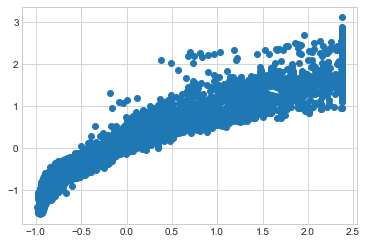

In [309]:
plt.scatter(y_test['price'], y_pred)
plt.savefig('y_test_y_pred.png')
plt.show()

### Linear Regression Final Equation

In [310]:
olsres_9.params

const     -0.767372
carat      1.049782
depth     -0.006270
table     -0.013654
cut        0.030391
color      0.075148
clarity    0.236933
dtype: float64

In [311]:
cols = ['const', 'carat', 'depth', 'table', 'cut', 'color', 'clarity']

In [312]:
Equation = "price ="
print(Equation, end=" ")
for i in range(len(cols)):
    if i == 0:
        print(olsres_9.params[i], "+", end=" ")
    elif i != len(cols) - 1:
        print(olsres_9.params[i],"* (",cols[i],")","+",end="  ",)
    else:
        print(olsres_9.params[i], "* (", cols[i], ")")

price = -0.7673715445099523 + 1.0497822414930829 * ( carat ) +  -0.006269671621101757 * ( depth ) +  -0.013654101923302173 * ( table ) +  0.030390674652724495 * ( cut ) +  0.07514752728304533 * ( color ) +  0.236933010356209 * ( clarity )


## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.


- When carat increases by 1 unit, diamond price increases by 1.04978 units, keeping all other predictors constant.
- When cut increases by 1 unit, diamond price increases by 0.03039 units, keeping all other predictors constant.
- When color increases by 1 unit, diamond price increases by 0.07514 units, keeping all other predictors constant.
- When clarity increases by 1 unit, diamond price increases by 0.236933 units, keeping all other predictors constant.
- when table increases by 1 unit, diamond price decreases by 0.013654 units, keeping all other predictors constant.
- when depth increases by 1 unit, diamond price decreases by 0.006269 units, keeping all other predictors constant.
- As per model these six attributes are the most important attributes for predicting target variable 'price' - 'Carat', 'clarity', 'Cut', 'color', 'table' and 'depth'.

- we can see that the from the scatter plot between y predicted and y actual that it is a very strong corelation between the predicted y and actual y.But there are lots of spread. That indicates some kind noise present on the data set i.e Unexplained variances on the output.

Linear regression Performance Metrics
- intercept for the model: -0.7673715445099523 
- R square on training data: 0.9275358910663005
- R square on testing data: 0.928081803037983
- RMSE on Training data: 0.26856363030921065
- RMSE on Testing data: 0.26962717962644167
- As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

- The Gem Stones company should consider the features 'Carat','Cut','color','clarity','depth' and 'table' as  most important for predicting the price. This will help us to distinguish between higher profitable stones and lower profitable stones so as to have better profit share.

- Stones having higher carat should be considered as the most profit making stones among all others.

- The 'Premium Cut' and 'ideal' Diamonds are the most Expensive, followed by 'Very Good' Cut, these should consider in higher profitable stones.

- The Diamonds clarity with 'VS1' &'VS2' are the most Expensive.So these two category also consider in higher profitable stones. 

- Stones having higher weight and lower depth will earn huge profits.

# Problem 2: Logistic Regression and LDA

## You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

## Data Dictionary
- Holiday_Package - Opted for Holiday Package yes/no?
- Salary - Employee salary
- age - Age in years
- edu - Years of Formal Education
- no_young_children - The number of young children (younger than 7 years)
- no_older_children - Number of older children
- foreign - foreigner Yes/No

In [723]:
df_hol = pd.read_csv('Holiday_Package.csv')

### Shape of the data

In [724]:
df_hol.shape

(872, 8)

### Checking the first five rows

In [725]:
sample_df_hol1 = df_hol.head()
sample_df_hol1

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [726]:
dfi.export(sample_df_hol1,'sample_df_hol1.png')

### Dropping the column 'Unnamed:0'

In [727]:
df_hol.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

### Changing the column name 'Holliday_Package' to 'Holiday_Package'

In [728]:
df_hol.rename(columns={'Holliday_Package':'Holiday_Package'}, inplace=True)

In [729]:
df_hol.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [730]:
sample_df_hol = df_hol.head()
sample_df_hol

,Holiday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [731]:
dfi.export(sample_df_hol,'sample_df_hol.png')

### Checking and gathering more information about the data

In [732]:
df_hol[df_hol['no_young_children']>0]

,Holiday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
3,no,66503,31,11,2,0,no
12,no,75327,33,11,2,0,no
23,no,35682,20,12,1,0,no
26,no,37821,28,9,2,0,no
...,...,...,...,...,...,...,...
860,yes,37380,34,9,1,1,yes
862,no,66900,35,10,1,1,yes
864,no,25527,41,5,1,0,yes
867,no,40030,24,4,2,1,yes


In [843]:
df_hol['Holiday_Package'].value_counts(normalize=True)

0    0.540138
1    0.459862
Name: Holiday_Package, dtype: float64

In [733]:
df_hol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holiday_Package    872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


### Checking for missing values

In [734]:
df_hol.isnull().sum()

Holiday_Package      0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

### Checking for duplicate values

In [735]:
df_hol.duplicated().sum()

0

### Describing the Data

In [736]:
df_hol_desc = df_hol.describe(include = 'all').T
df_hol_desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holiday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [737]:
dfi.export(df_hol_desc,'df_hol_desc.png')

### Univariate Analysis

In [738]:
plt.style.use('seaborn-whitegrid')

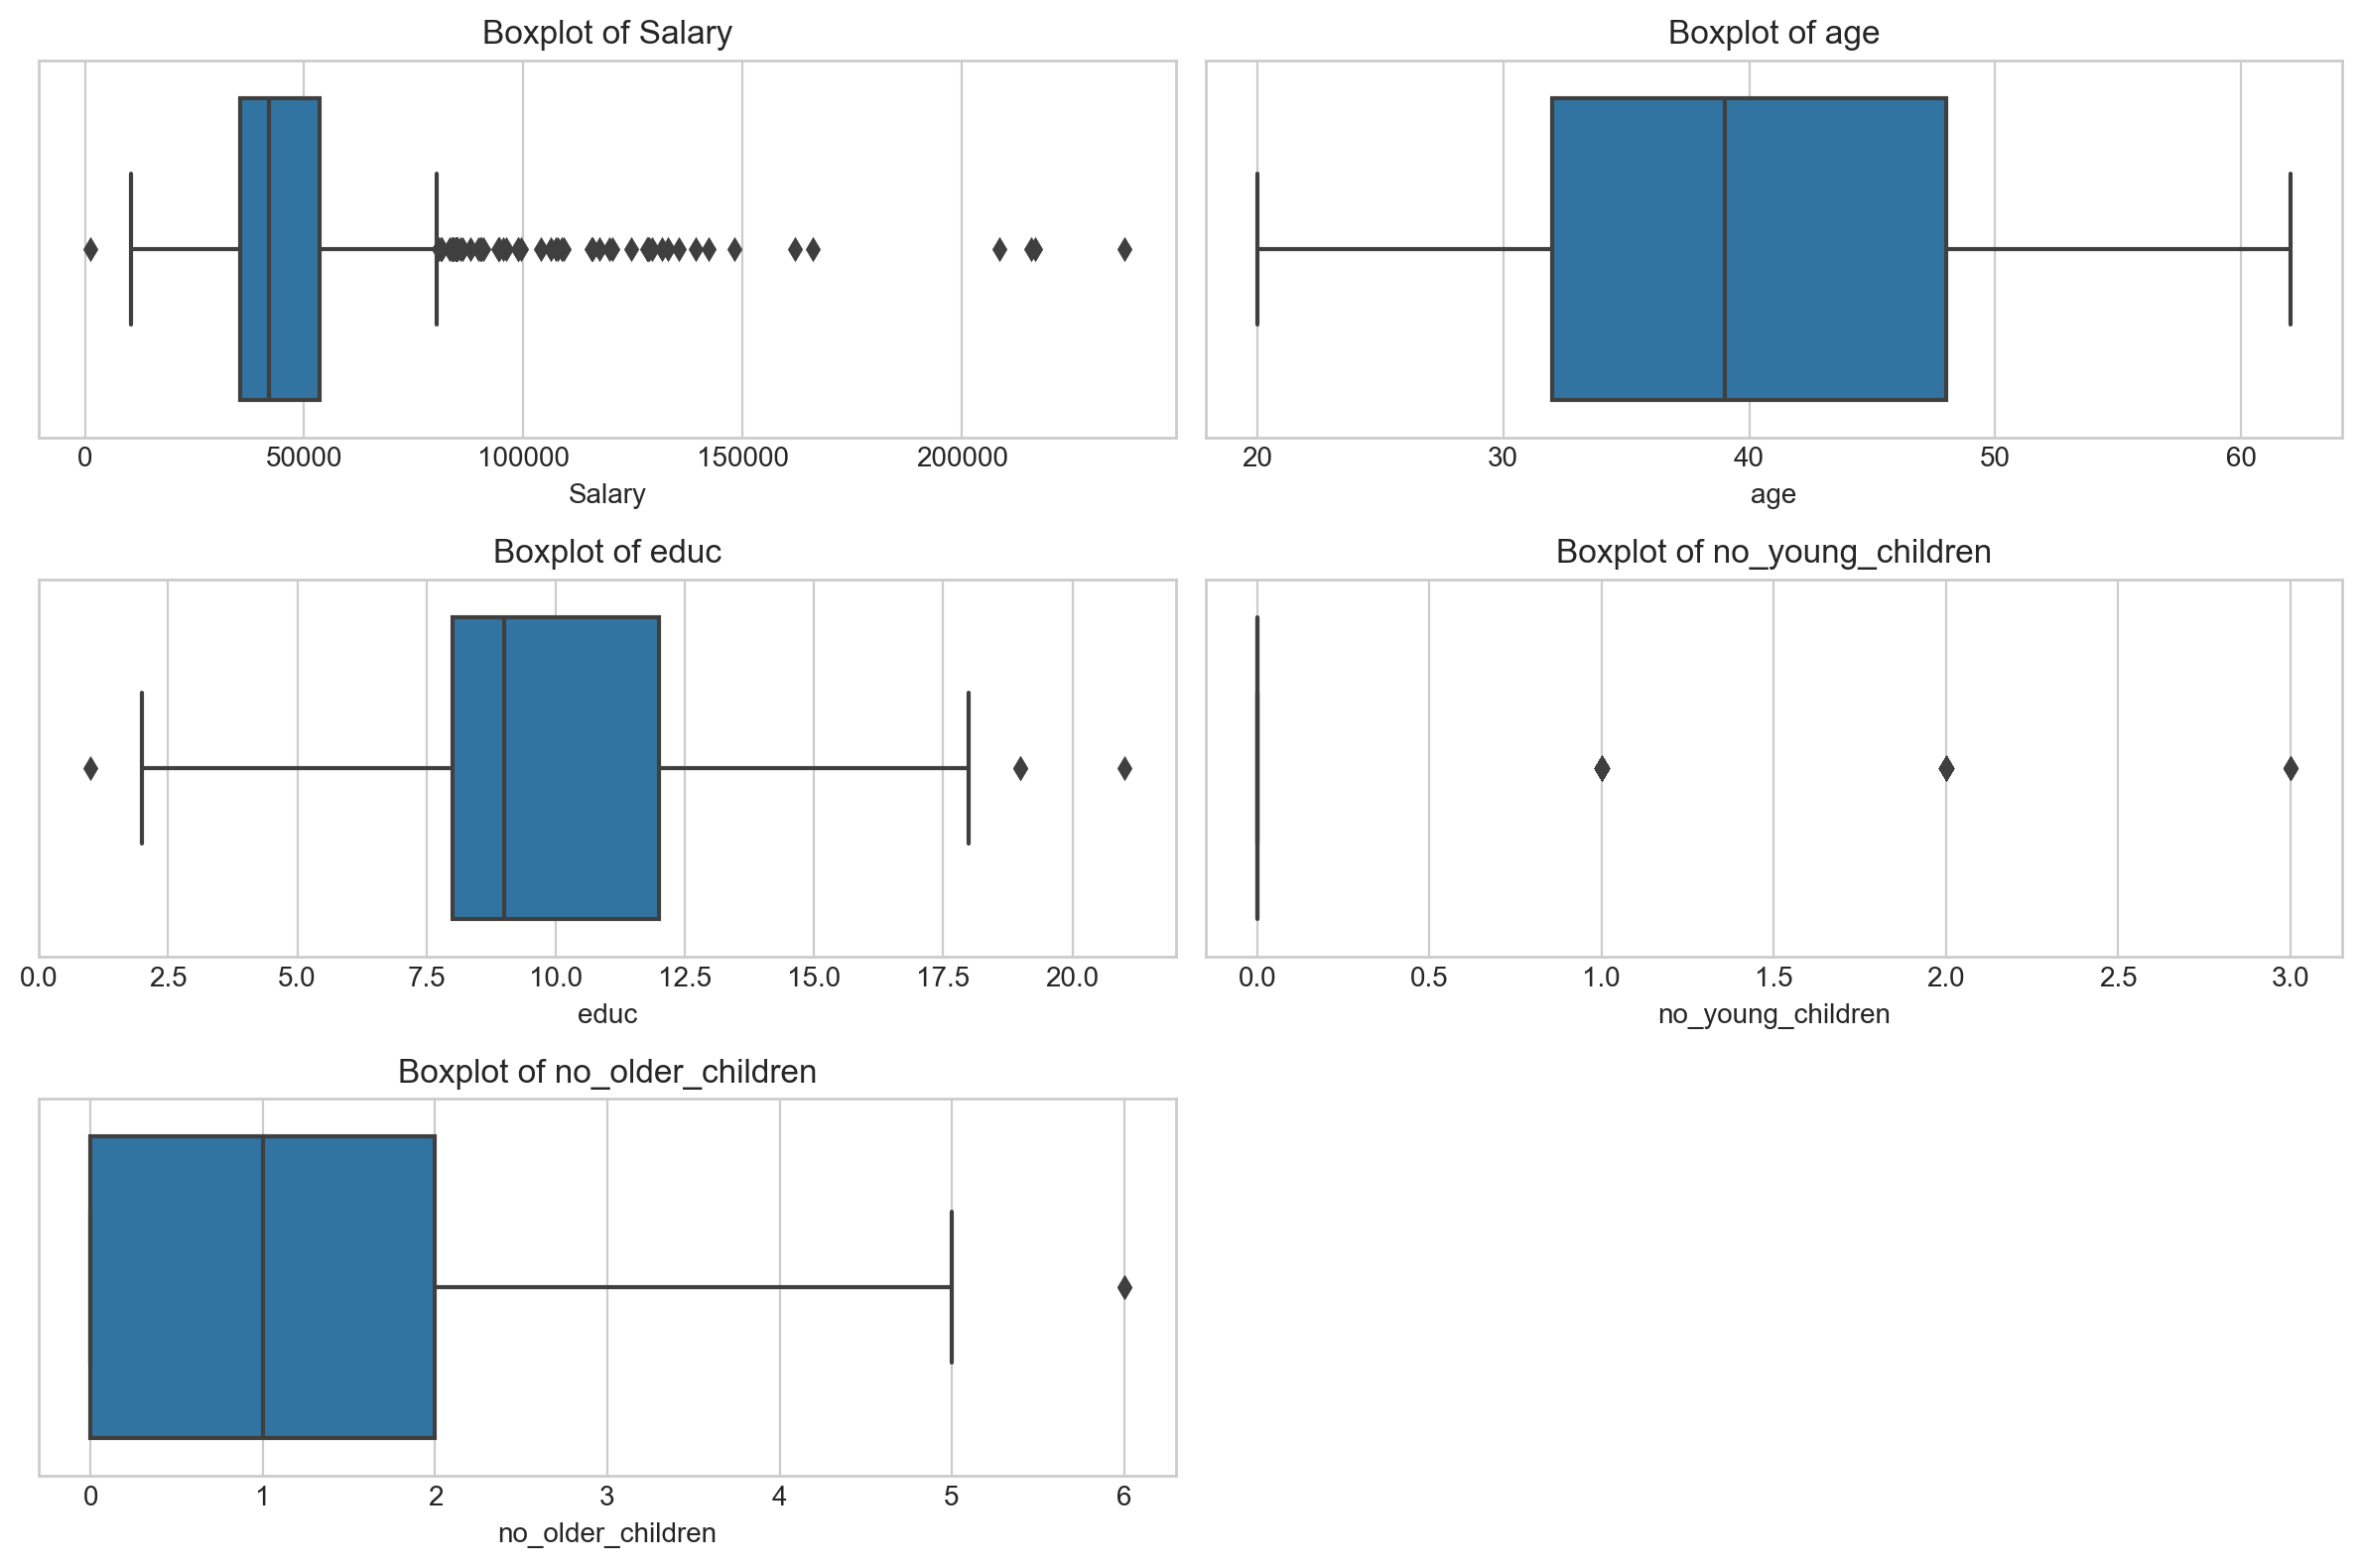

In [739]:
plt.figure(figsize = (12, 8), dpi = 200)
i = 0
for column in df_hol.columns:
    if df_hol[column].dtype in ['int64', 'float64']:
        i = i+1
        plt.subplot(3,2,i)
        plt.title(f'Boxplot of {column}')
        sns.boxplot(data = df_hol, x = column)
        plt.tight_layout()
        plt.savefig('boxplot_df.png')

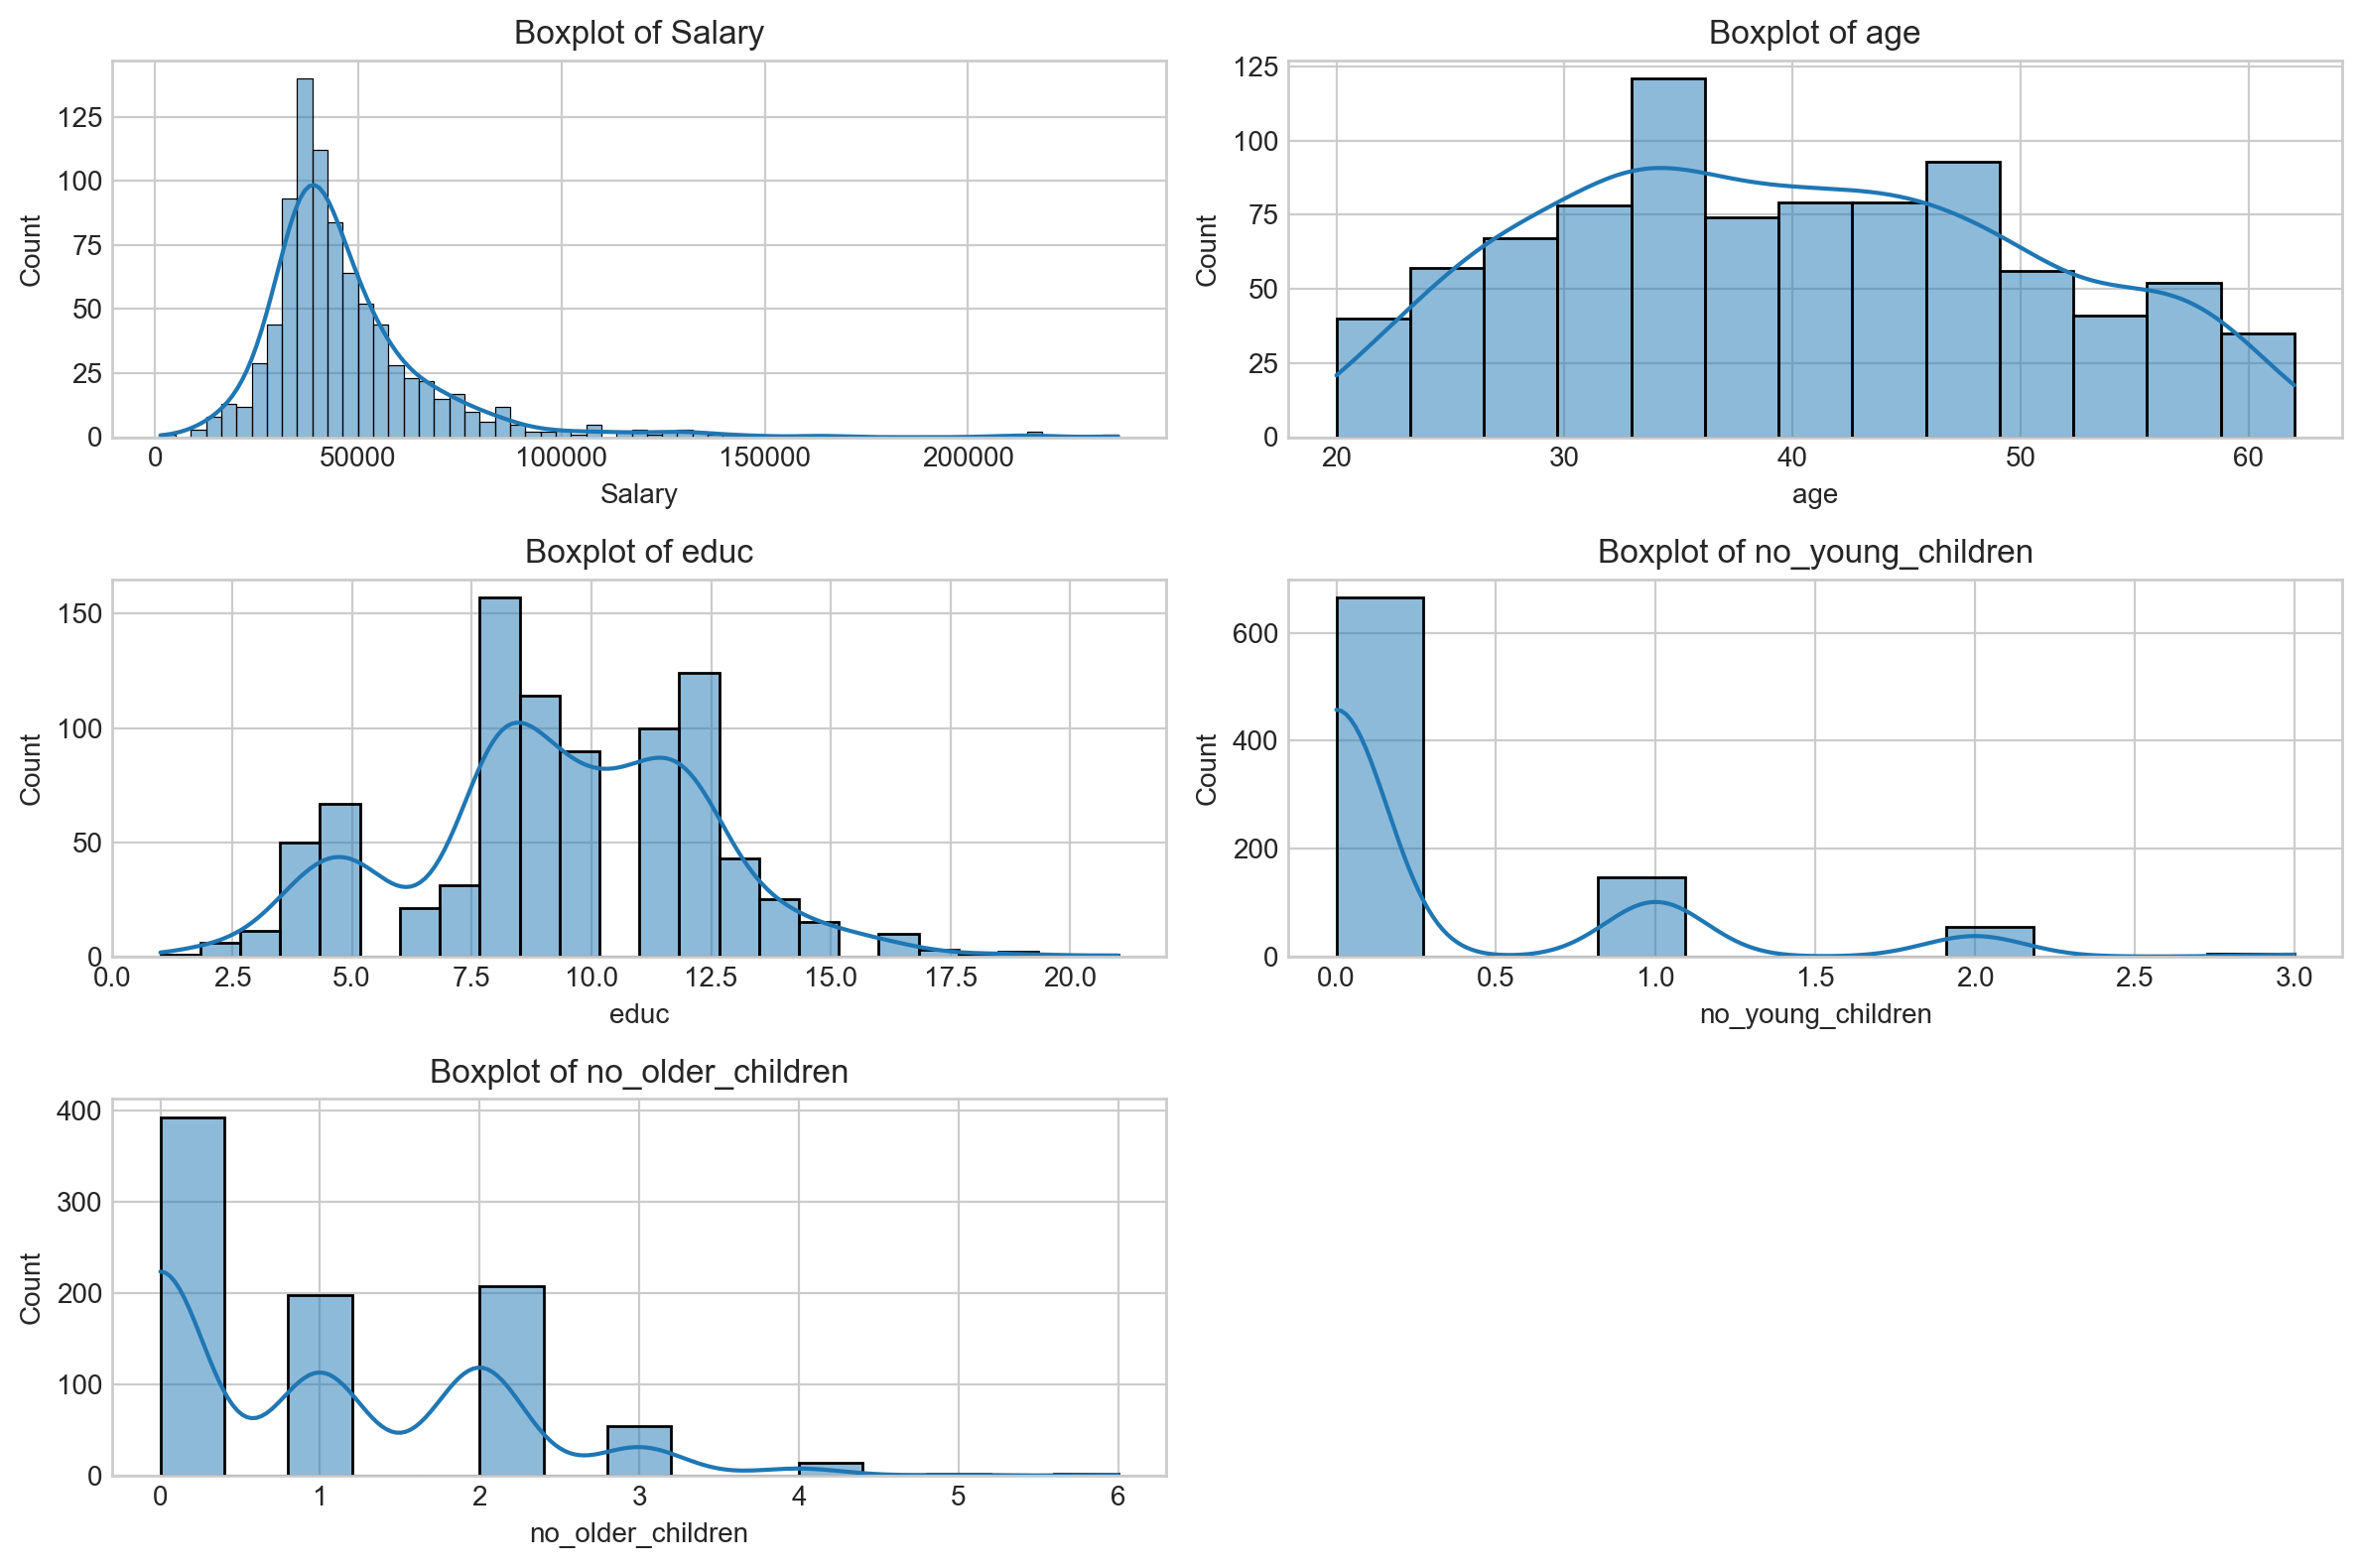

In [740]:
plt.figure(figsize = (12, 8), dpi = 200)
i = 0
for column in df_hol.columns:
    if df_hol[column].dtype in ['int64', 'float64']:
        i = i+1
        plt.subplot(3,2,i)
        plt.title(f'Boxplot of {column}')
        sns.histplot(data = df_hol, x = column, kde = True)
        plt.tight_layout()
        plt.savefig('histplot_df.png')

In [741]:
df_hol.columns

Index(['Holiday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

### Holiday_Package and foreign

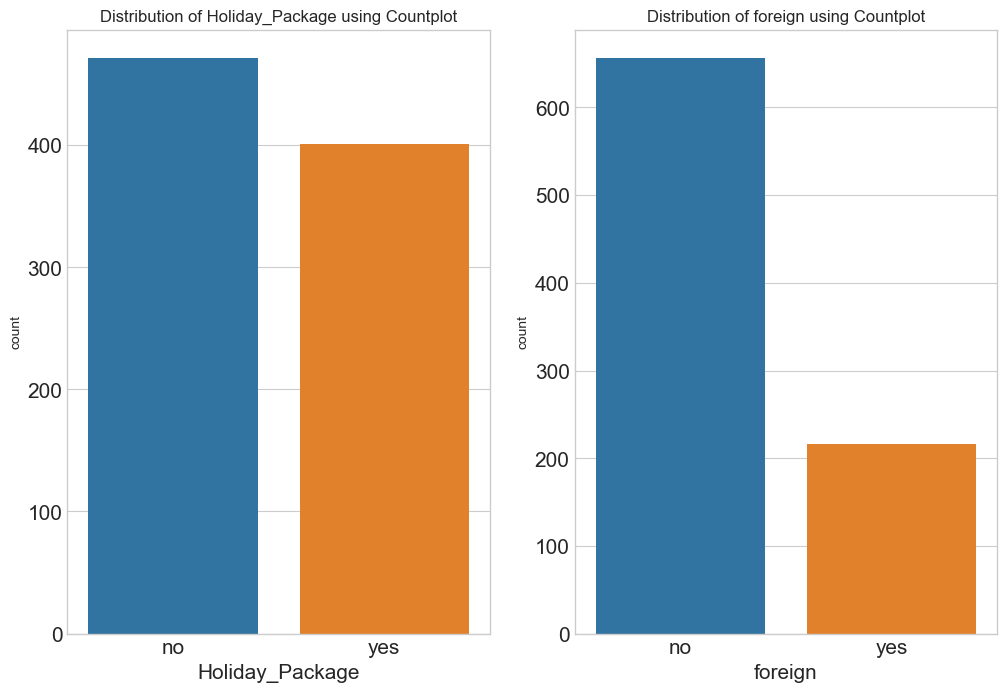

In [742]:
plt.figure(figsize = (12, 8), dpi = 100)
plt.subplot(1,2,1)
sns.countplot(data = df_hol, x = 'Holiday_Package')
plt.xlabel('Holiday_Package', fontsize =15)
plt.tick_params(labelsize =15)
plt.title('Distribution of Holiday_Package using Countplot')

plt.subplot(1,2,2)
sns.countplot(data = df_hol, x = 'foreign')
plt.xlabel('foreign', fontsize =15)
plt.tick_params(labelsize =15)
plt.title('Distribution of foreign using Countplot')
plt.savefig('HolidayPackage_foreigncountplot.png')
plt.show()

### Holiday_Package  vs Salary

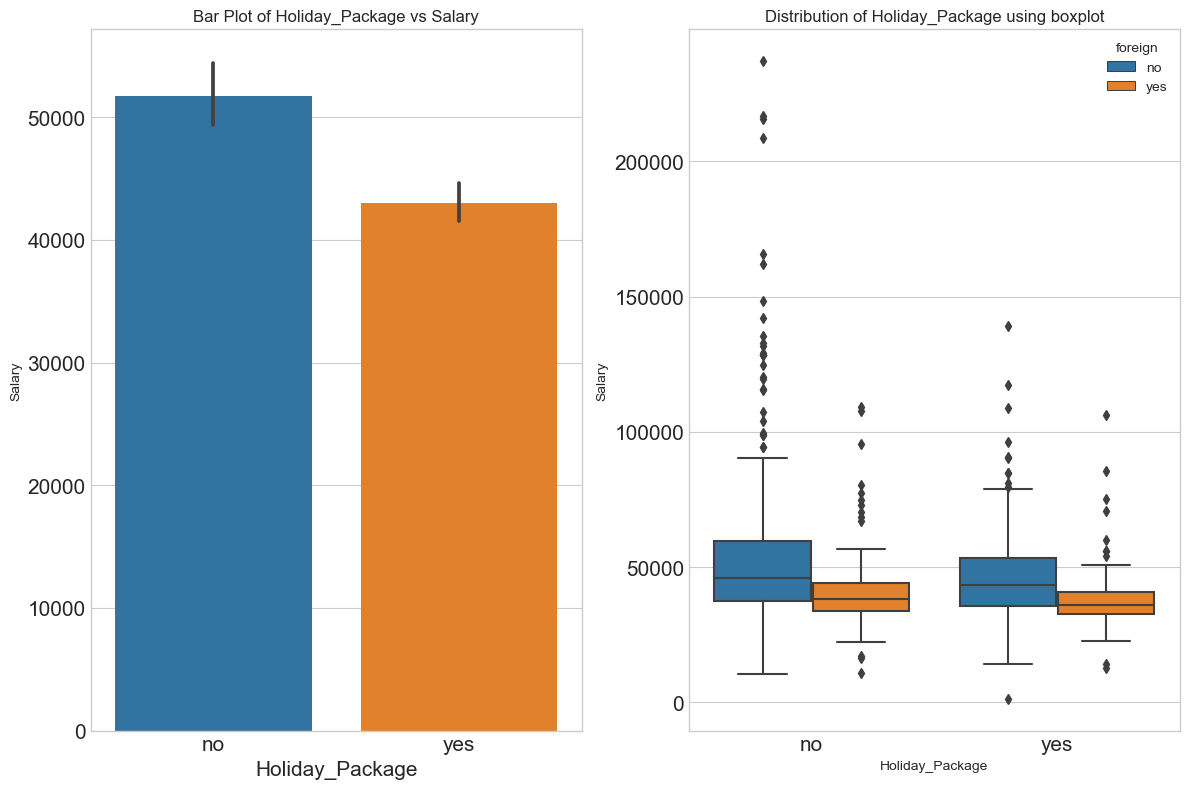

In [743]:
plt.figure(figsize = (12,8), dpi = 100)
plt.subplot(1,2,1)
sns.barplot(data = df_hol, x = 'Holiday_Package', y = 'Salary')
plt.xlabel('Holiday_Package', fontsize =15)
plt.tick_params(labelsize =15)
plt.title('Bar Plot of Holiday_Package vs Salary')

plt.subplot(1,2,2)
sns.boxplot(data = df_hol, x = 'Holiday_Package', y = 'Salary' , hue = 'foreign')
plt.xlabel('Holiday_Package')
plt.ylabel('Salary')
plt.tick_params(labelsize =15)
plt.title('Distribution of Holiday_Package using boxplot')
plt.tight_layout()
plt.savefig('holiday_package_salary_boxplot.png')
plt.show()

### Foreign vs Salary

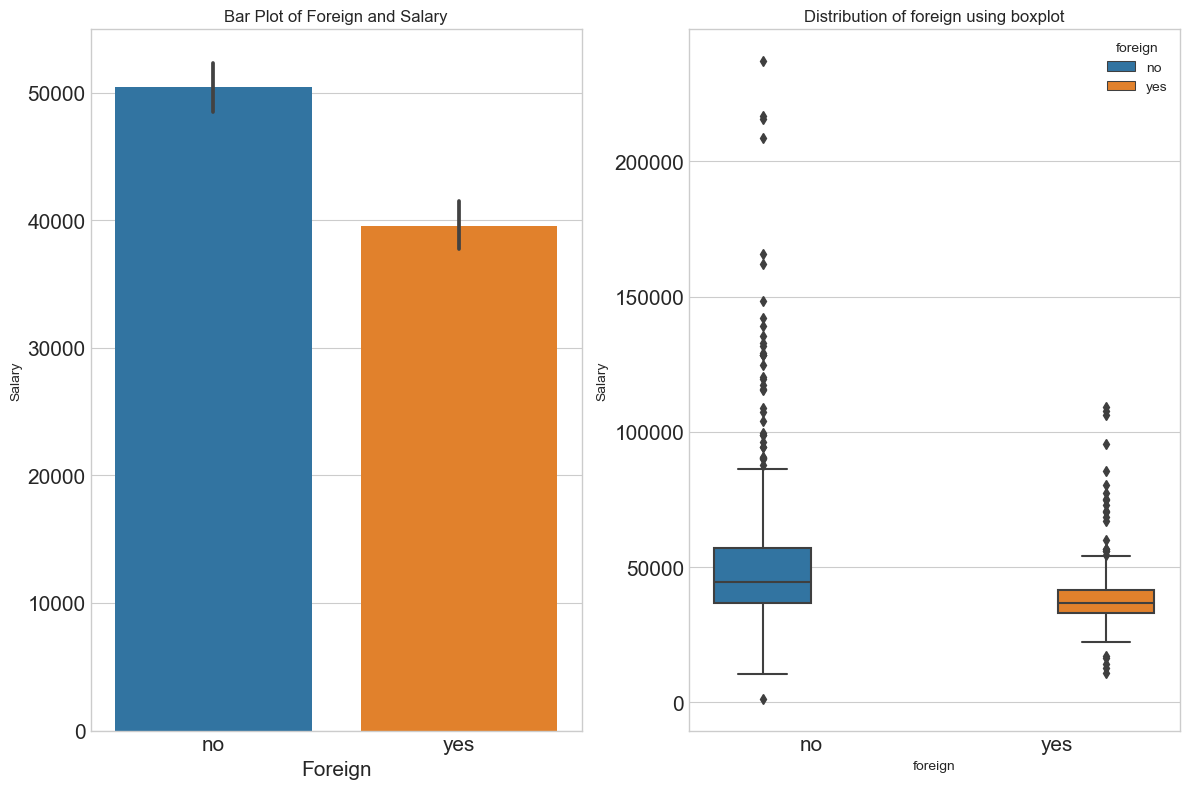

In [744]:
plt.figure(figsize = (12,8), dpi = 100)
plt.subplot(1,2,1)
sns.barplot(data = df_hol, x = 'foreign', y = 'Salary')
plt.xlabel('Foreign', fontsize =15)
plt.tick_params(labelsize =15)
plt.title('Bar Plot of Foreign and Salary')

plt.subplot(1,2,2)
sns.boxplot(data = df_hol, x = 'foreign', y = 'Salary', hue = 'foreign')
plt.xlabel('foreign')
plt.ylabel('Salary')
plt.tick_params(labelsize =15)
plt.title('Distribution of foreign using boxplot')
plt.tight_layout()
plt.savefig('foreign_salary_boxplot.png')
plt.show()

### Holiday_Package vs Age

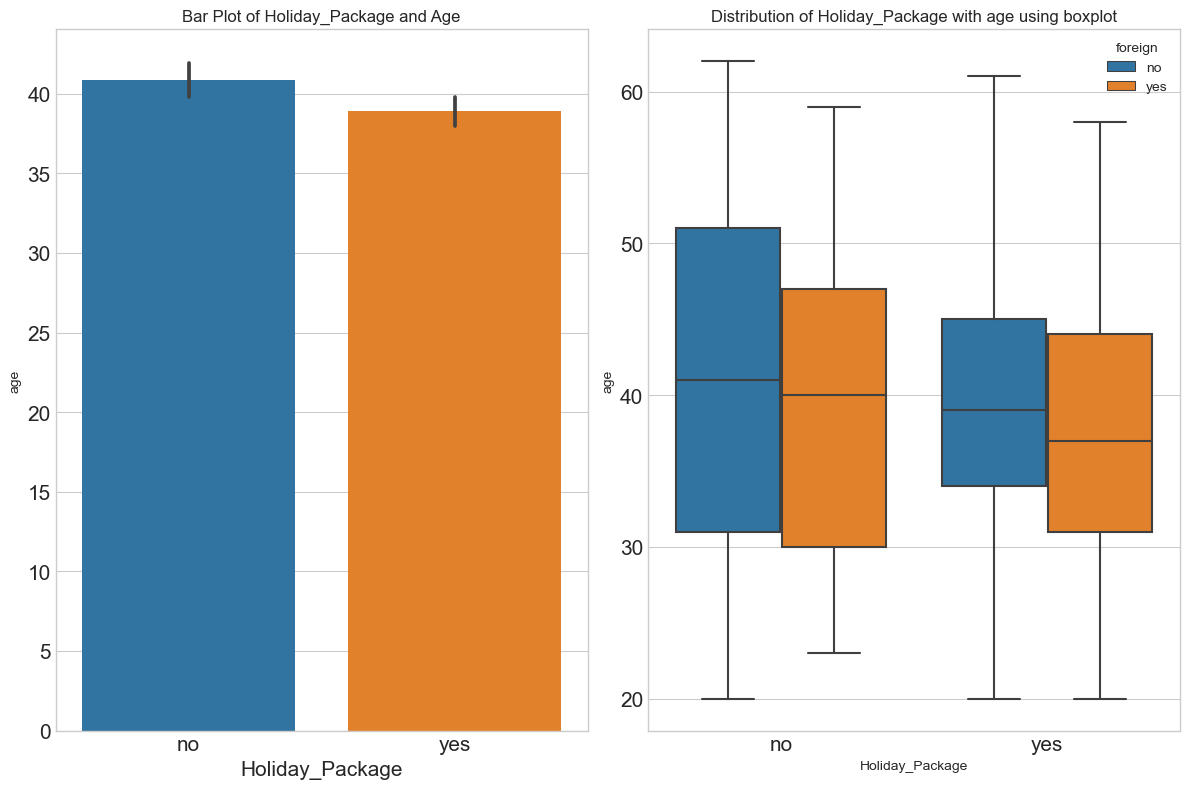

In [745]:
plt.figure(figsize = (12,8), dpi = 100)
plt.subplot(1,2,1)
sns.barplot(data = df_hol, x = 'Holiday_Package', y = 'age')
plt.xlabel('Holiday_Package', fontsize =15)
plt.tick_params(labelsize =15)
plt.title('Bar Plot of Holiday_Package and Age')

plt.subplot(1,2,2)
sns.boxplot(data = df_hol, x = 'Holiday_Package', y = 'age' , hue = 'foreign')
plt.xlabel('Holiday_Package')
plt.ylabel('age')
plt.tick_params(labelsize =15)
plt.title('Distribution of Holiday_Package with age using boxplot')
plt.tight_layout()
plt.savefig('holiday_package_age_boxplot.png')
plt.show()

### Holiday_Package vs Educ

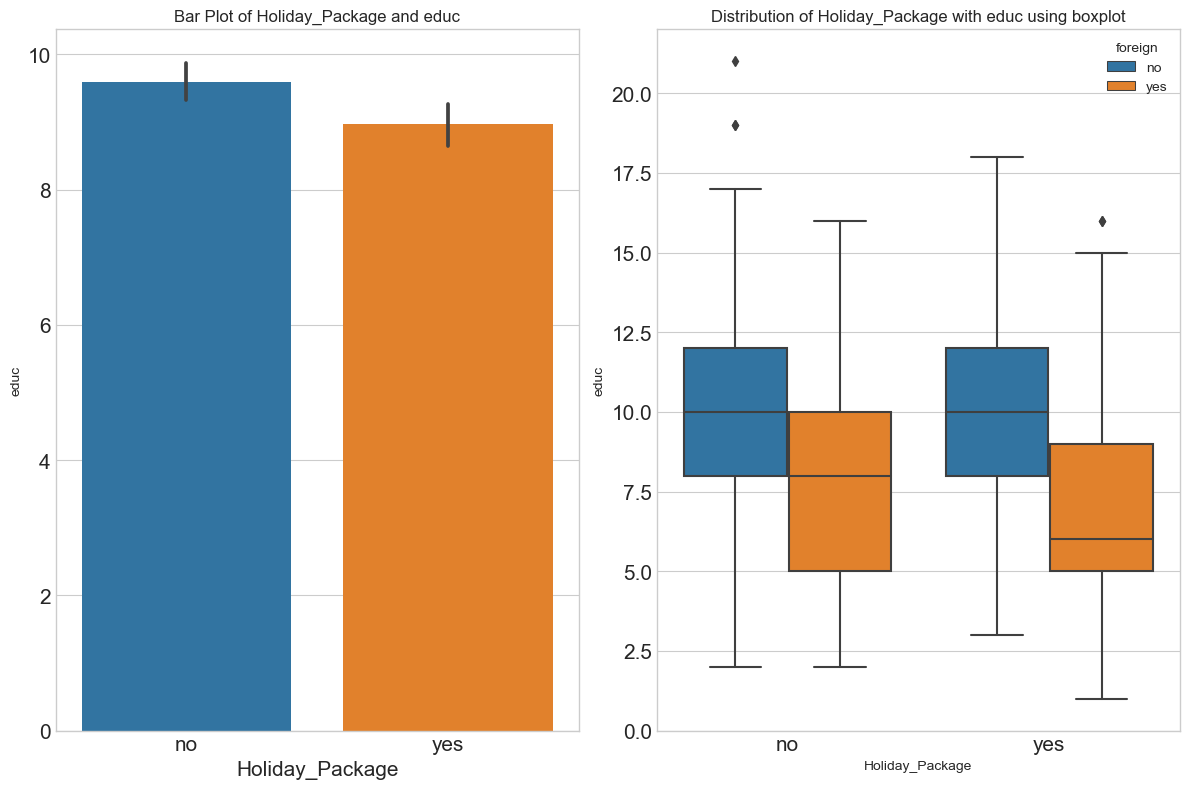

In [746]:
plt.figure(figsize = (12,8), dpi = 100)
plt.subplot(1,2,1)
sns.barplot(data = df_hol, x = 'Holiday_Package', y = 'educ')
plt.xlabel('Holiday_Package', fontsize =15)
plt.tick_params(labelsize =15)
plt.title('Bar Plot of Holiday_Package and educ')

plt.subplot(1,2,2)
sns.boxplot(data = df_hol, x = 'Holiday_Package', y = 'educ', hue = 'foreign')
plt.xlabel('Holiday_Package')
plt.ylabel('educ')
plt.tick_params(labelsize =15)
plt.title('Distribution of Holiday_Package with educ using boxplot')
plt.tight_layout()
plt.savefig('holiday_package_educ_boxplot.png')
plt.show()

### Holiday_Package vs no_young_children

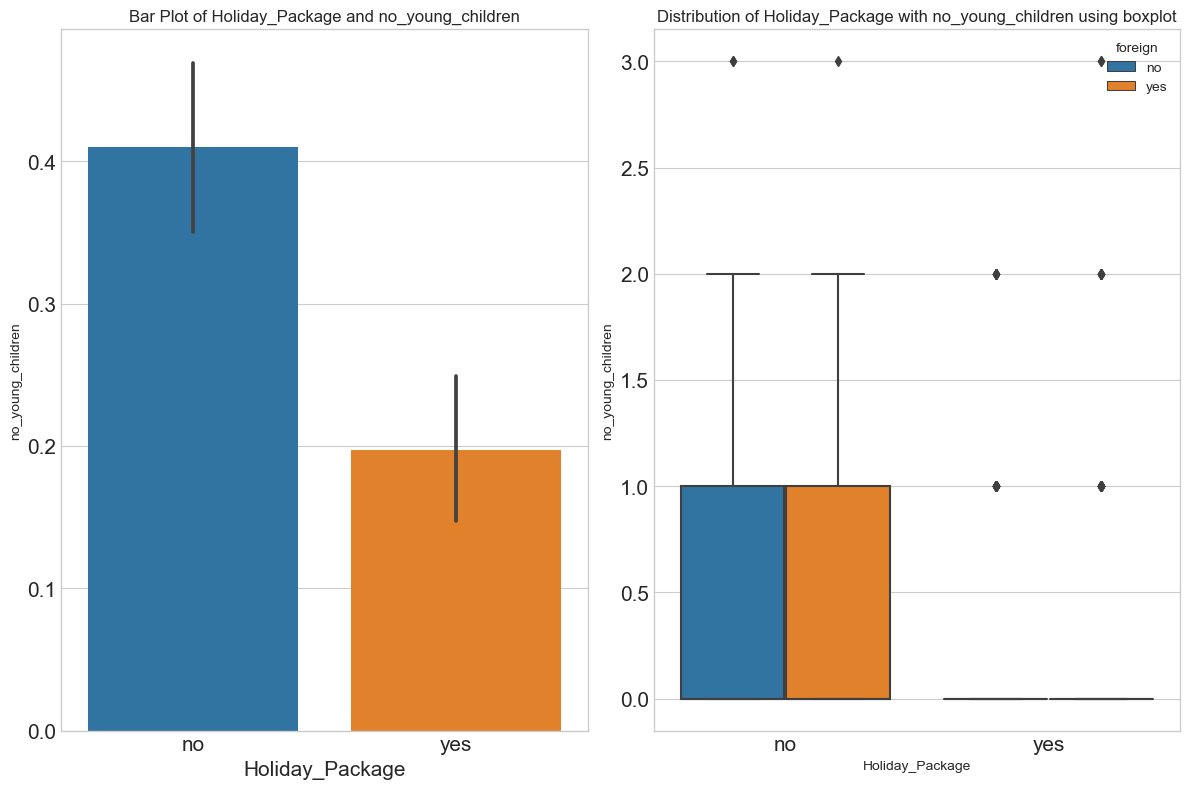

In [747]:
plt.figure(figsize = (12,8), dpi = 100)
plt.subplot(1,2,1)
sns.barplot(data = df_hol, x = 'Holiday_Package', y = 'no_young_children')
plt.xlabel('Holiday_Package', fontsize =15)
plt.tick_params(labelsize =15)
plt.title('Bar Plot of Holiday_Package and no_young_children')

plt.subplot(1,2,2)
sns.boxplot(data = df_hol, x = 'Holiday_Package', y = 'no_young_children', hue = 'foreign')
plt.xlabel('Holiday_Package')
plt.ylabel('no_young_children')
plt.tick_params(labelsize =15)
plt.title('Distribution of Holiday_Package with no_young_children using boxplot')
plt.tight_layout()
plt.savefig('holiday_package_young_children_boxplot.png')
plt.show()

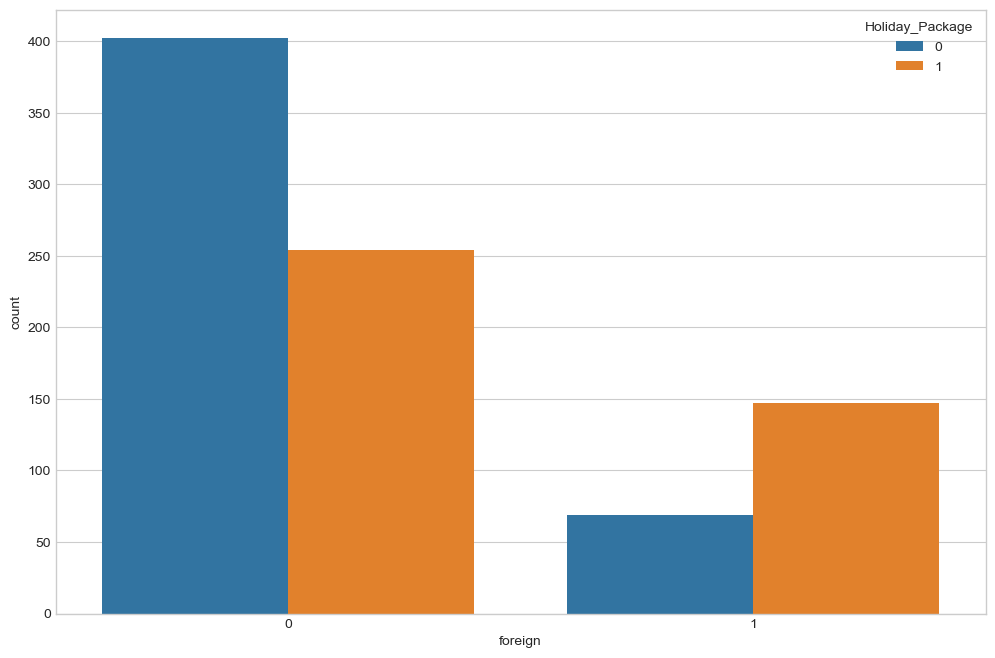

In [841]:
plt.figure(figsize = (12,8), dpi = 100)
sns.countplot(data = df_hol, x = 'foreign', hue = 'Holiday_Package');

### Holiday_Package vs no_older_children

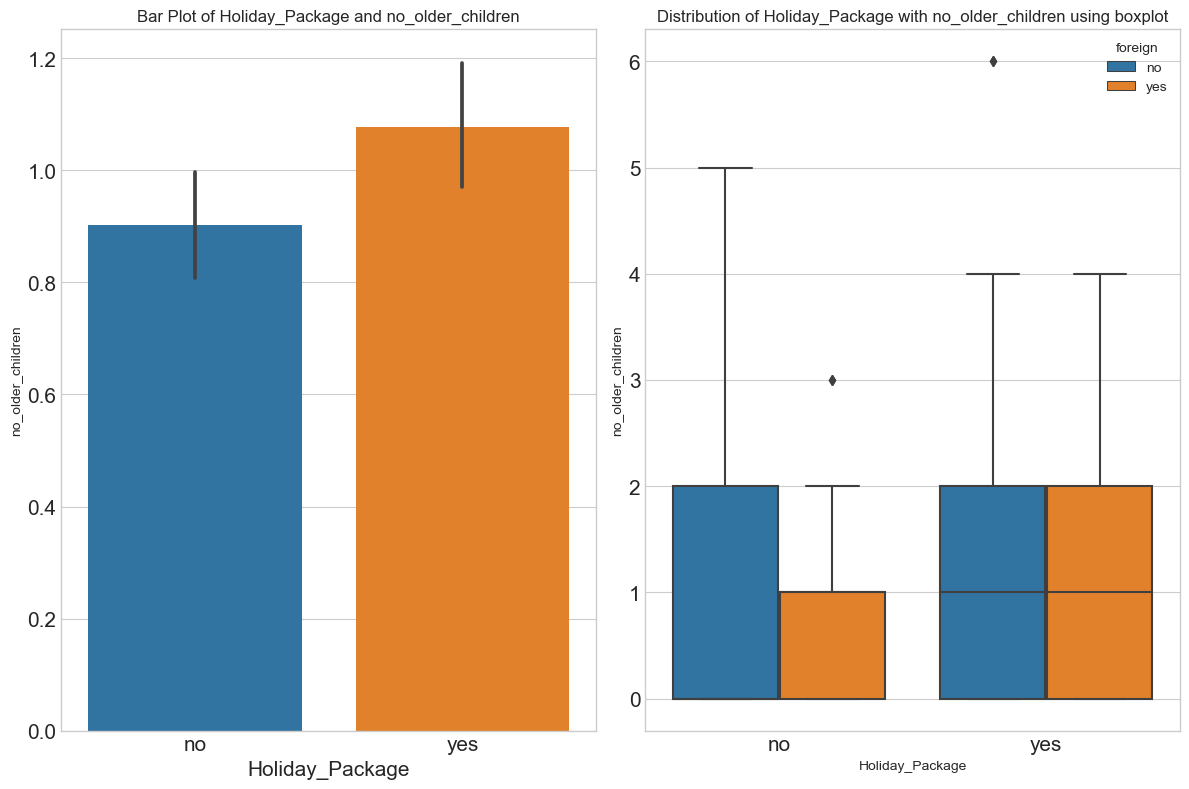

In [748]:
plt.figure(figsize = (12,8), dpi = 100)
plt.subplot(1,2,1)
sns.barplot(data = df_hol, x = 'Holiday_Package', y = 'no_older_children')
plt.xlabel('Holiday_Package', fontsize =15)
plt.tick_params(labelsize =15)
plt.title('Bar Plot of Holiday_Package and no_older_children')

plt.subplot(1,2,2)
sns.boxplot(data = df_hol, x = 'Holiday_Package', y = 'no_older_children', hue = 'foreign')
plt.xlabel('Holiday_Package')
plt.ylabel('no_older_children')
plt.tick_params(labelsize =15)
plt.title('Distribution of Holiday_Package with no_older_children using boxplot')
plt.tight_layout()
plt.savefig('holiday_package_older_children_boxplot.png')
plt.show()

### Bivariate Analysis

<Figure size 2400x1600 with 0 Axes>

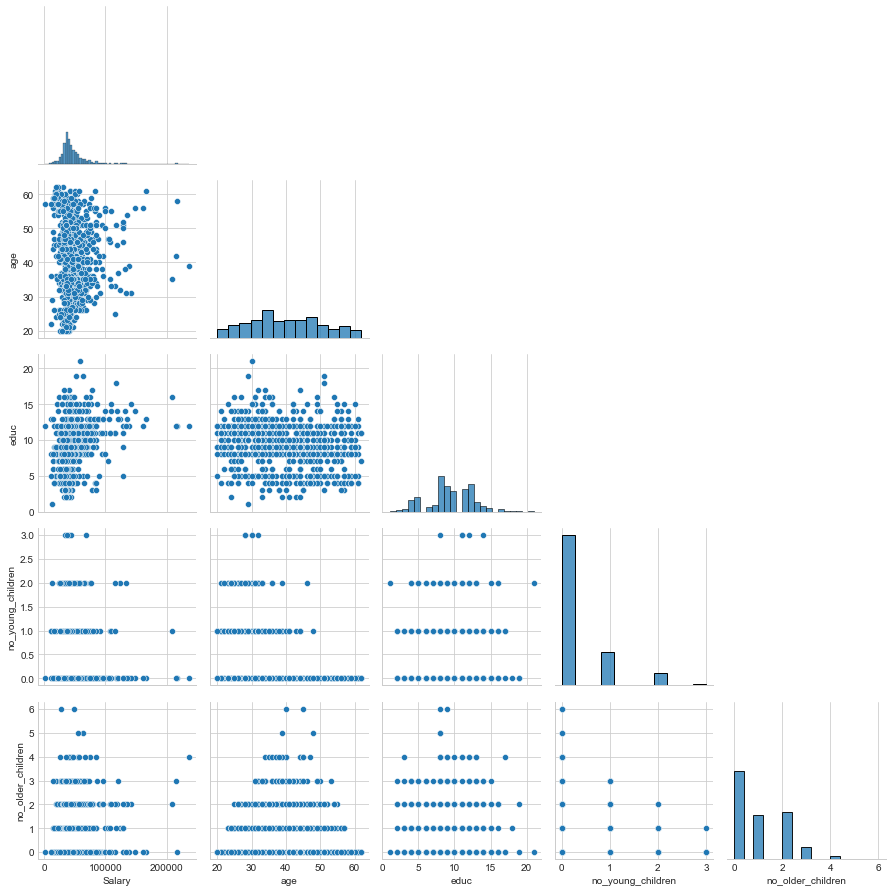

In [749]:
plt.figure(figsize = (12,8), dpi = 200)
sns.pairplot(data = df_hol, corner=True)
plt.tight_layout()
plt.savefig('df_hol_pairplot.png')

In [750]:
corr = df_hol.corr()

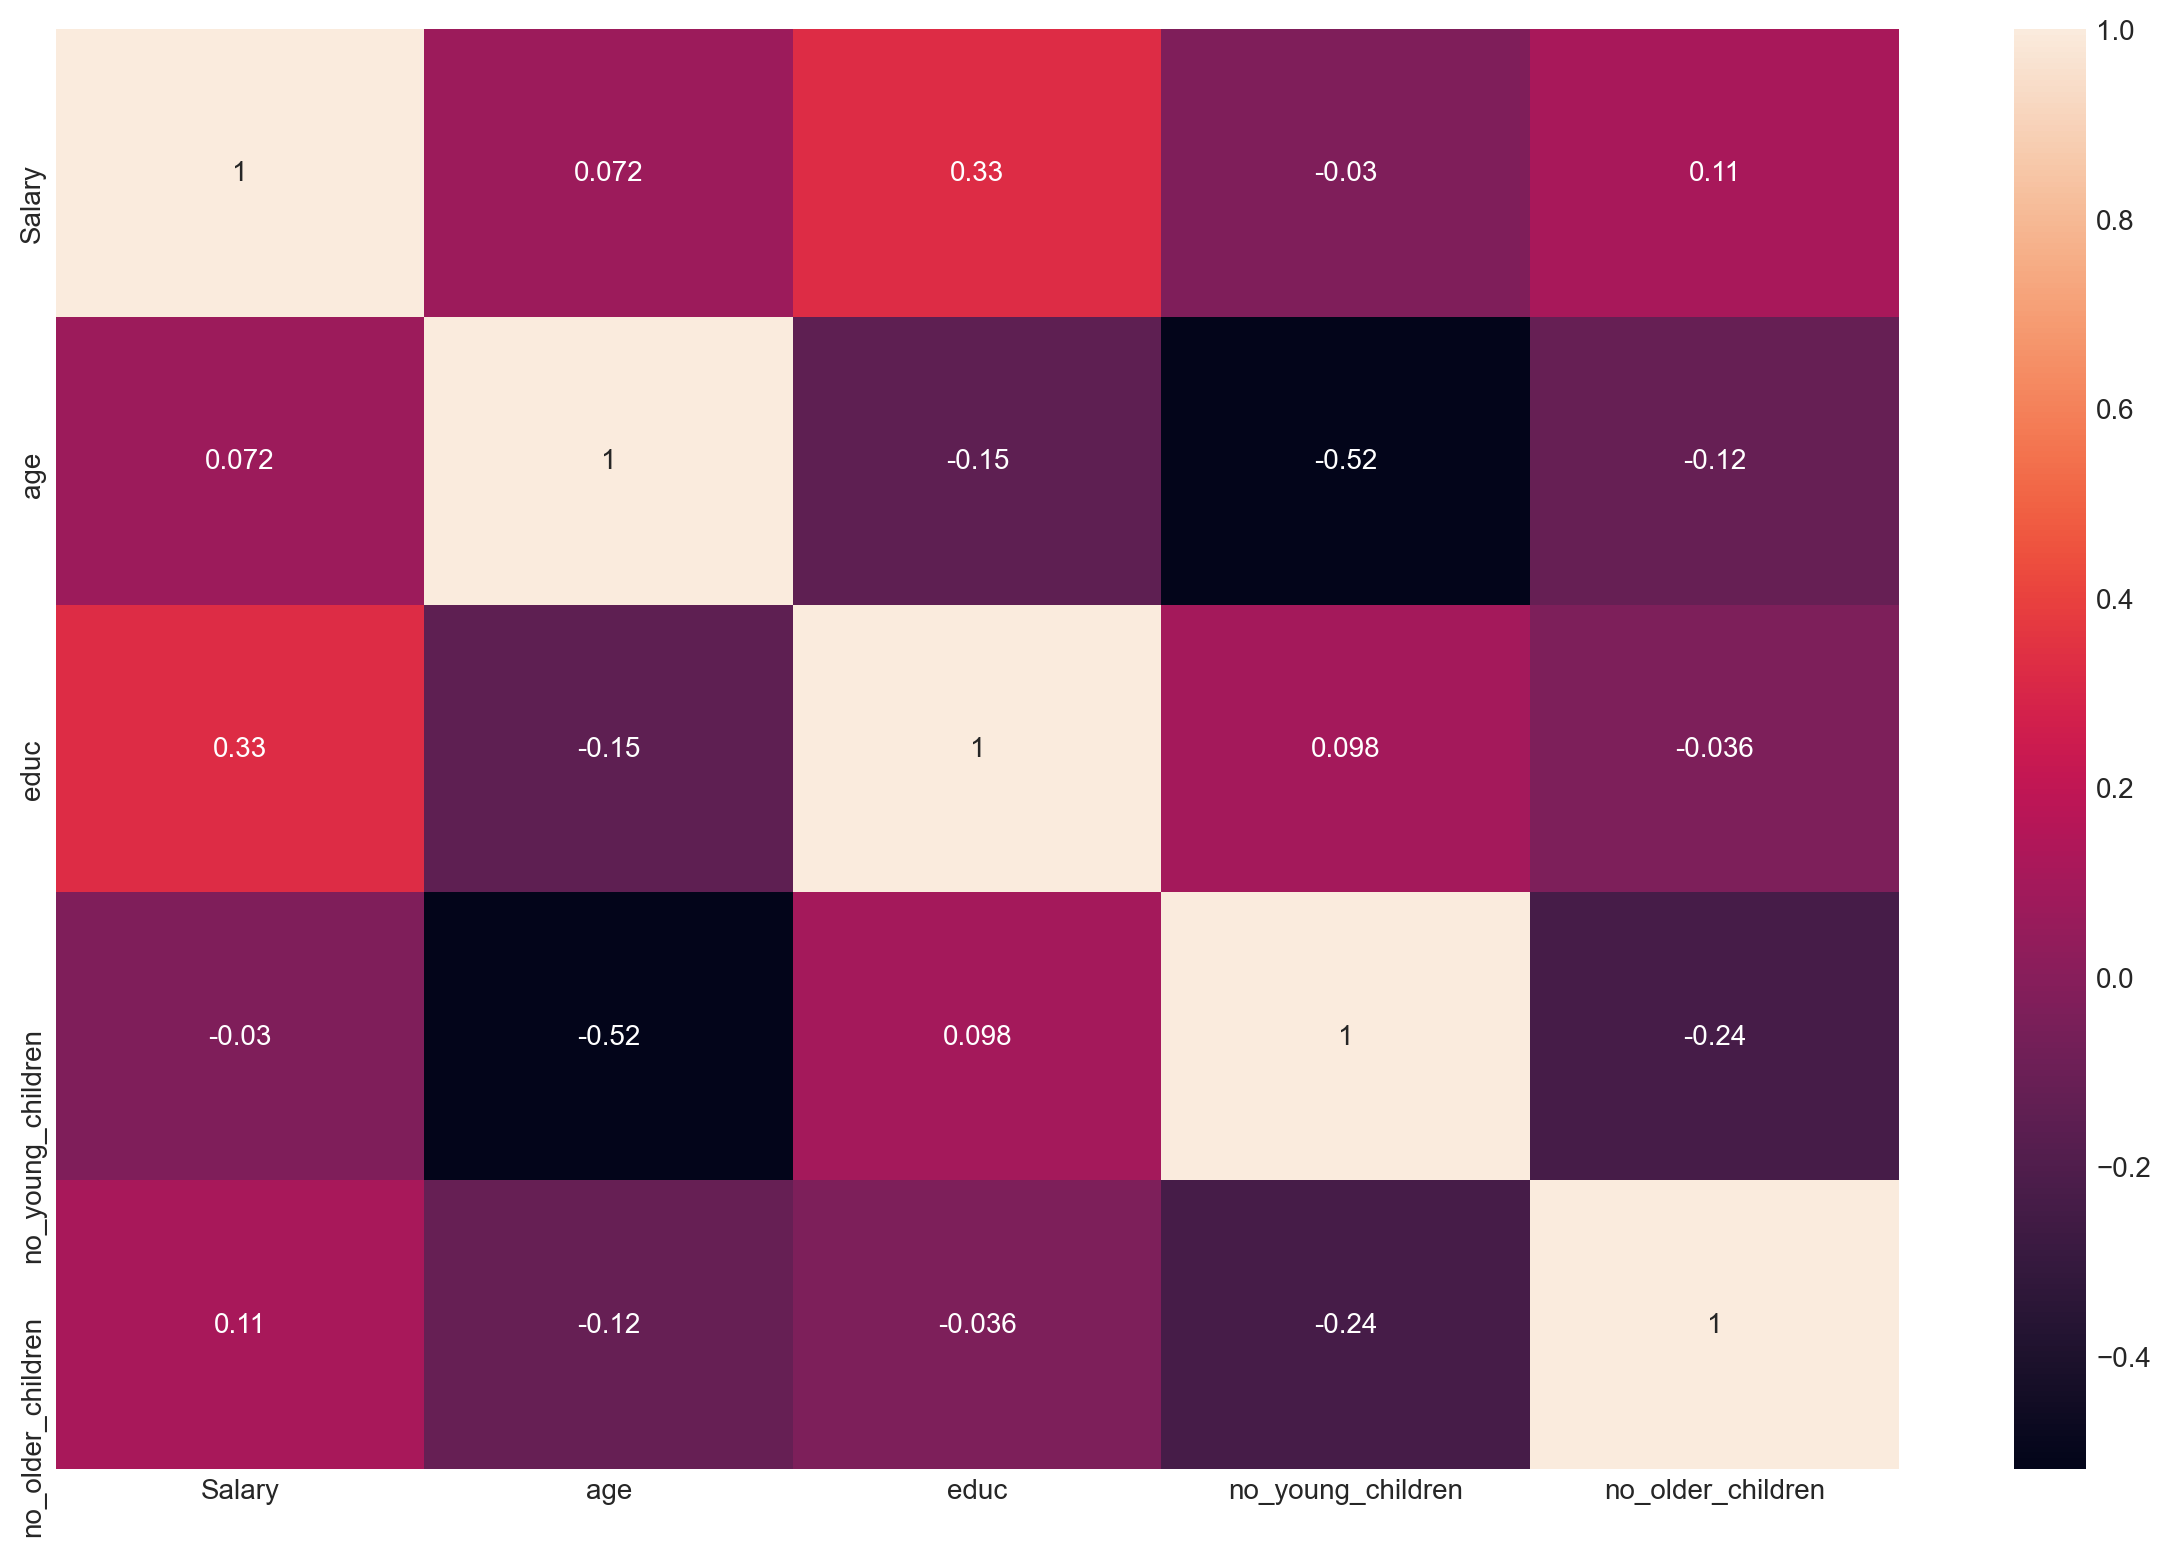

In [751]:
plt.figure(figsize = (12,8), dpi = 200)
sns.heatmap(corr, annot = True);
plt.tight_layout()
plt.savefig('heatmap.png')

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### Treating Outliers

In [752]:
def remove_outlier(col):
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [753]:
col = 'Salary'

- We have outliers in Salary, age, educ, no_young_children and no_older_children.
- An observation is considered to be an outlier if that particular observation has been mistakenly captured in the data set. Treating outliers sometimes results in the models having better performance but the models lose out on generalization.
- From the Initial diagnosis, we can say that the column age, no_young_children, educ and no_older_children are having valid outliers.
- But since there are too many outliers in the column Salary we can choose to remove it.

In [754]:
if df_hol[col].dtype in ['int64', 'float64']:
    lr, ur = remove_outlier(df_hol[col])
    df_hol[col] = np.where(df_hol[col] > ur, ur, df_hol[col])
    df_hol[col] = np.where(df_hol[col] < lr, lr, df_hol[col])

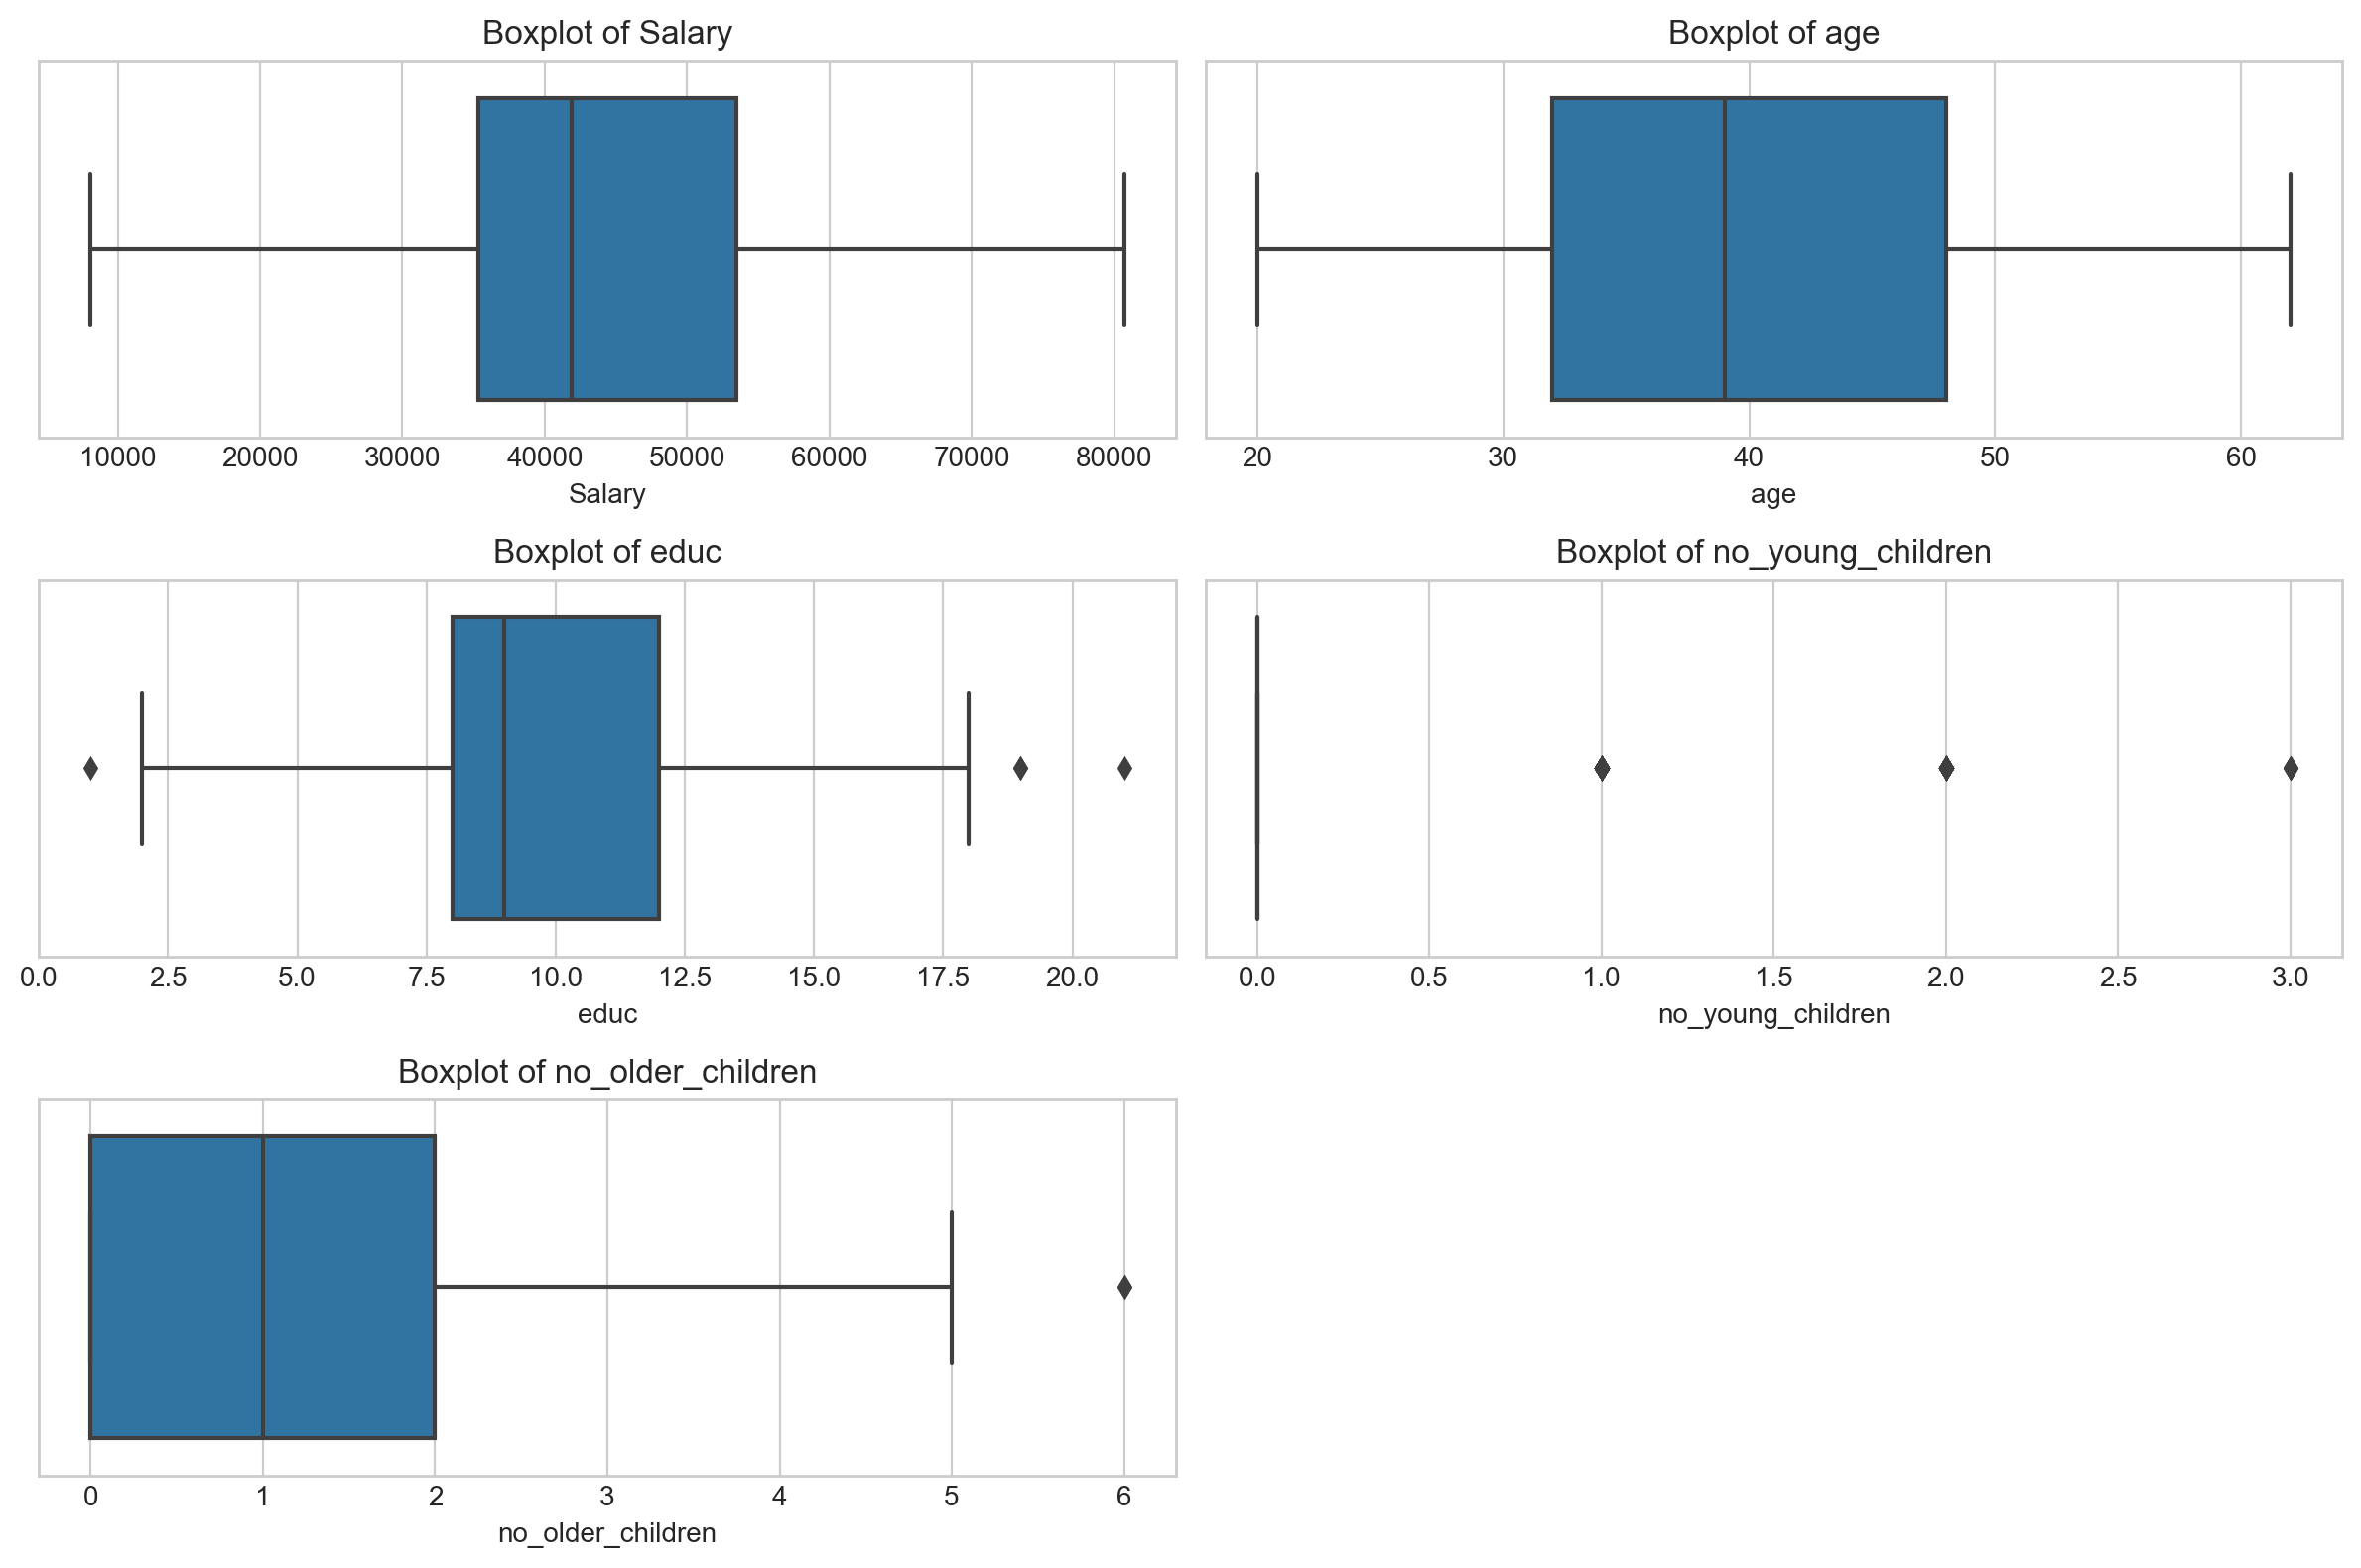

In [755]:
plt.figure(figsize = (12, 8), dpi = 200)
i = 0
for column in df_hol.columns:
    if df_hol[column].dtype in ['int64', 'float64']:
        i = i+1
        plt.subplot(3,2,i)
        plt.title(f'Boxplot of {column}')
        sns.boxplot(data = df_hol, x = column)
        plt.tight_layout()
        plt.savefig('boxplot_Outlier_treatment_df.png')

### Encode the data

In [756]:
for feature in df_hol.columns: 
    if df_hol[feature].dtype == 'object': 
        df_hol[feature] = pd.Categorical(df_hol[feature]).codes

In [757]:
df2 = df_hol.head()
df2

,Holiday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [758]:
dfi.export(df2, 'df2.png')

### Train | Test Split

In [759]:
X = df_hol.drop(['Holiday_Package'], axis = 1)
y = df_hol[['Holiday_Package']]

In [760]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30,8,1,1,0
1,37207.0,45,8,0,1,0
2,58022.0,46,9,0,0,0
3,66503.0,31,11,2,0,0
4,66734.0,44,12,0,2,0


In [761]:
y.head()

,Holiday_Package
0,0
1,1
2,0
3,0
4,0


In [762]:
y_train.value_counts(normalize=True)

Holiday_Package
0                  0.534426
1                  0.465574
dtype: float64

In [763]:
y_test.value_counts(normalize = True)

Holiday_Package
0                  0.553435
1                  0.446565
dtype: float64

- From the above result we can conclude that classification is Balanced since it is in the ratio of 55-45%.

In [764]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [765]:
from sklearn.linear_model import LogisticRegression

### Logistic Regression Model

In [766]:
model = LogisticRegression(solver = 'newton-cg', max_iter = 10000, penalty = 'none', verbose = True,
                          n_jobs = 2)
model.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test Dataset

In [767]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [768]:
y_train_predict_prob = model.predict_proba(X_train)

In [769]:
y_test_predict_prob = model.predict_proba(X_test)

In [770]:
y_test_predict_prob_samp = pd.DataFrame(y_test_predict_prob).head()
y_test_predict_prob_samp

,0,1
0,0.773610,0.226390
1,0.272672,0.727328
2,0.902697,0.097303
3,0.958478,0.041522
4,0.512982,0.487018


In [771]:
dfi.export(y_test_predict_prob_samp,'y_test_predict_prob_samp.png')

In [772]:
y_train_predict_prob_samp = pd.DataFrame(y_train_predict_prob).head()
y_train_predict_prob_samp

,0,1
0,0.740819,0.259181
1,0.260792,0.739208
2,0.956710,0.043290
3,0.688268,0.311732
4,0.440784,0.559216


In [773]:
dfi.export(y_train_predict_prob_samp,'y_train_predict_prob_samp.png')

## Logistic Regression using Grid Search

In [774]:
from sklearn.model_selection import GridSearchCV

In [775]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}

In [776]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [777]:
grid_search.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          penalty='none', solver='newton-cg',
                                          verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [778]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg', verbose=True)


In [779]:
best_model = grid_search.best_estimator_

### Prediction on Training Set

In [780]:
ytrain_predict_grid = best_model.predict(X_train)
ytest_predict_grid = best_model.predict(X_test)

### Getting Probabilities on the test set

In [781]:
ytrain_predict_grid = best_model.predict(X_train)
ytest_predict_grid = best_model.predict(X_test)

In [782]:
ytrain_predict_prob_grid = best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_grid).head()

,0,1
0,0.731299,0.268701
1,0.269331,0.730669
2,0.950614,0.049386
3,0.690274,0.309726
4,0.448412,0.551588


In [783]:
ytest_predict_prob_grid = best_model.predict_proba(X_test)
ytest_predict_prob_grid_samp = pd.DataFrame(ytest_predict_prob_grid).head()
ytest_predict_prob_grid_samp

,0,1
0,0.767056,0.232944
1,0.286662,0.713338
2,0.888828,0.111172
3,0.952326,0.047674
4,0.498776,0.501224


In [784]:
dfi.export(ytest_predict_prob_grid_samp,'ytest_pred_prob_grid_samp.png')

## Linear Discriminant Analysis

In [785]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610, 1)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262, 1)


### Linear Discriminant Analysis model

In [786]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [787]:
clf = LinearDiscriminantAnalysis()


In [788]:
model_lda = clf.fit(X_train,y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [789]:
model_lda

LinearDiscriminantAnalysis()

### Prediction with Train and Test data

In [790]:
pred_class_train = model_lda.predict(X_train)
pred_class_test = model_lda.predict(X_test)

### Probability prediction for the training and test data

In [791]:
# Training Data Probability Prediction
pred_prob_train_lda = model_lda.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_lda = model_lda.predict_proba(X_test)

In [792]:
pred_prob_test_lda_samp = pd.DataFrame(pred_prob_test_lda).head()
pred_prob_test_lda_samp

,0,1
0,0.764441,0.235559
1,0.277406,0.722594
2,0.887380,0.112620
3,0.950494,0.049506
4,0.508190,0.491810


In [793]:
dfi.export(pred_prob_test_lda_samp,'pred_prob_test_lda_samp.png')

In [794]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

## Model Evaluation for Logistic Regression Model

### Accuracy on Training Data

In [795]:
model.score(X_train, y_train)

0.6754098360655738

### AUC_ROC for the Training Data

AUC: 0.742


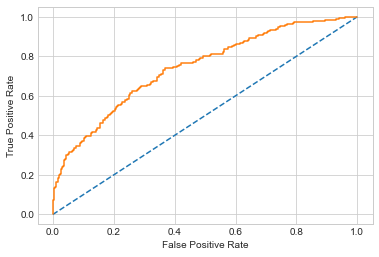

In [796]:
probs = y_train_predict_prob
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' %auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('auc_roc_LR_train.png')
plt.show()

### Confusion Matrix for Training Data

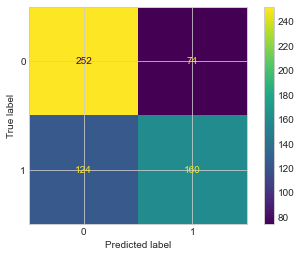

In [797]:
plot_confusion_matrix(model, X_train, y_train)
plt.savefig('conf_mat_train_LR.png')
plt.show()


In [798]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [799]:
df_report_train = pd.DataFrame(classification_report(y_train, y_train_predict,output_dict=True))

In [800]:
dfi.export(df_report_train, 'df_report_train.png')

### Accuracy on Testing Data

In [801]:
model.score(X_test, y_test)

0.6374045801526718

### AUC_ROC on Testing Data

AUC: 0.705


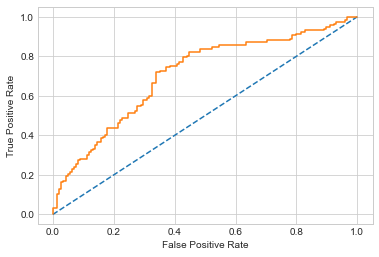

In [802]:
probs = y_test_predict_prob
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' %auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('auc_roc_LR_test.png')
plt.show()

### Confusion Matrix for Testing Data

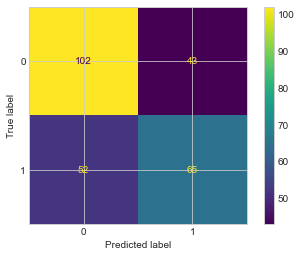

In [803]:
plot_confusion_matrix(model, X_test, y_test)
plt.savefig('conf_mat_test_LR.png')
plt.show()

In [804]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [805]:
df_report_test= pd.DataFrame(classification_report(y_test, y_test_predict,output_dict=True))

In [806]:
dfi.export(df_report_test, 'df_report_test.png')

## Model Evaluation for Logistic Regression Model using Grid Search

### Accuracy on Training Data

In [807]:
best_model.score(X_train, y_train)

0.6737704918032786

### AUC_ROC for the Training Data

Area Under the Curve of Training data: 0.741


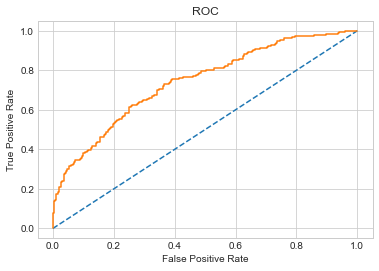

In [808]:
probs = ytrain_predict_prob_grid
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
print('Area Under the Curve of Training data: %.3f' % lr_train_auc)
plt.savefig('auc_roc_LR_GS_train.png')
plt.show()

### Confusion Matrix for Training Data

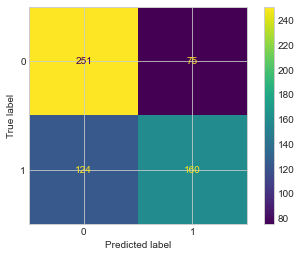

In [809]:
plot_confusion_matrix(best_model, X_train, y_train)
plt.savefig('conf_mat_train_LR_GS.png')
plt.show()

In [810]:
print(classification_report(y_train, ytrain_predict_grid))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.62       284

    accuracy                           0.67       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.67      0.67      0.67       610



In [811]:
df_GS_report_train = pd.DataFrame(classification_report(y_train, y_train_predict,output_dict=True))

In [812]:
dfi.export(df_GS_report_train,'df_GS_report_train.png')

### Accuracy on Testing Data

In [813]:
best_model.score(X_test, y_test)

0.6450381679389313

### AUC_ROC for the Testing Data

Area Under the Curve of Training data: 0.705


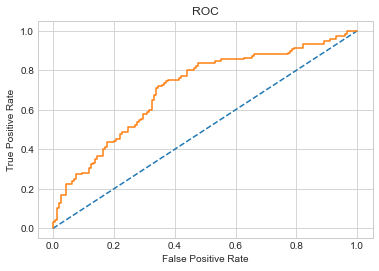

In [814]:
probs = ytest_predict_prob_grid
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
print('Area Under the Curve of Training data: %.3f' % lr_test_auc)
plt.savefig('auc_roc_LR_GS_test.png')
plt.show()

### Confusion Matrix for Testing Data

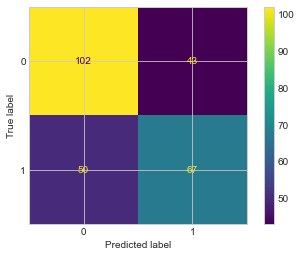

In [815]:
plot_confusion_matrix(best_model, X_test, y_test)
plt.savefig('conf_mat_test_LR_GS.png')
plt.show()

In [816]:
print(classification_report(y_test, ytest_predict_grid))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       145
           1       0.61      0.57      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



In [817]:
df_GS_report_test = pd.DataFrame(classification_report(y_test, y_test_predict,output_dict=True))

In [818]:
dfi.export(df_GS_report_test,'df_GS_report_test.png')

## Model Evaluation for LDA

### Accuracy on Training Data

In [820]:
model_lda.score(X_train, y_train)

0.6754098360655738

### AUC_ROC for the Training Data

Area Under the Curve of Training data: 0.739


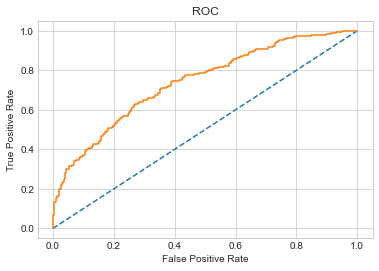

In [821]:
probs = pred_prob_train_lda
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
print('Area Under the Curve of Training data: %.3f' % lr_train_auc)
plt.savefig('auc_roc_LDA_train.png')
plt.show()

### Confusion Matrix for Training Data

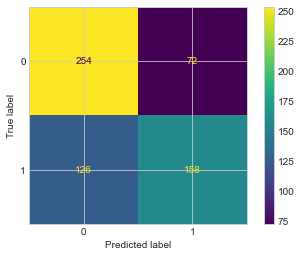

In [822]:
plot_confusion_matrix(model_lda, X_train, y_train)
plt.savefig('conf_mat_train_LDA.png')
plt.show()

In [825]:
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [826]:
df_report_LDA_train = pd.DataFrame(classification_report(y_train, pred_class_train,output_dict=True))

In [833]:
dfi.export(df_report_LDA_train,'df_report_LDA_train.png')

### Accuracy on Testing Data

In [827]:
model_lda.score(X_test, y_test)

0.6412213740458015

### AUC_ROC on Testing Data

Area Under the Curve of Training data: 0.703


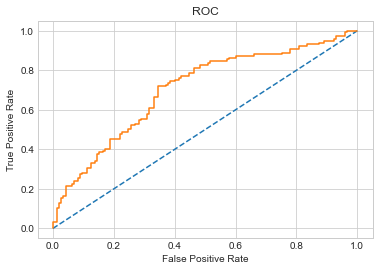

In [829]:
probs = pred_prob_test_lda
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
print('Area Under the Curve of Training data: %.3f' % lr_test_auc)
plt.savefig('auc_roc_LDA_test.png')
plt.show()

### Cnofusion Matrix for Testing Data

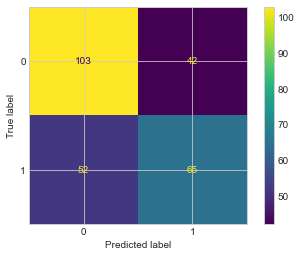

In [830]:
plot_confusion_matrix(model_lda, X_test, y_test)
plt.savefig('conf_mat_test_LDA.png')
plt.show()

In [831]:
print(classification_report(y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [832]:
df_LDA_report_test = pd.DataFrame(classification_report(y_test, pred_class_test,output_dict=True))

In [835]:
dfi.export(df_LDA_report_test,'df_LDA_report_test.png')

## 2.4 Inference: Basis on these predictions, what are the insights and recommendations.


•	From our Analysis we found out that foreigner and native employees aged above 45 are not interested in holiday packages. Also foreigner and native employees aged below 30 has also not shown much interest in opting for holiday packages. So this shows that age is one of the factors in determining whether an employee will opt for a holiday package or not. Employees age between 30 and 50 do buy holiday packages whether they are foreigners or natives. To get the attention of employees above 45 we can them their field of interest and try to include that in the holiday package or should organise their holiday around their interest. Same should be done for employees having age less than 30 years.

•	Salary is also one of the important factors in determining whether an employee will opt for holiday package or not. Foreigner or native employees having salary in the range of 30000 – 50000 have opted for holiday packages. To attract employees having salary higher than 150000 we should include beautiful couple destinations as employees with mostly higher age will be having salary around the same. Higher age indicates that mostly employees will be married and therefore we can include couple destinations like Europe etc. We can also include luxurious stays for the same. We can have longer stays for the holiday package. Also, Employees having lower salary should be given discount so that they can also opt for holiday packages. 

•	For the employees which have children older or younger we should have family holiday packages for them. 

•	There is a significant difference in the number of foreigners who has opted for holiday packages as compared to those who did not opt for the same. Perhaps we should include holiday packages which is packed with cultural events and historical information about the place so that foreigners can learn as well as enjoy after opting for the same. 

•	If employee is foreigner or native and employee is not having young children, chances of opting for Holiday Package is good. Special offer can be designed to domestic employees to opt for Holiday Package. For employees having young children packages can be modified to make infant and young children friendly.